# Case Study on Term Deposit Sale

![Bank](https://i1.wp.com/blog.bankbazaar.com/wp-content/uploads/2018/06/SBI-and-Axis-Bank-Hike-Fixed-Deposit-Interest-Rates_Thumbnail.gif?fit=435%2C267&ssl=1 "Bank")

### Goal
<font color=blue> <font size="3">Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. </font>


<font color=blue>  Import the datasets and libraries </font>

In [489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn import linear_model
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport, ROCAUC
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import os
pd.options.mode.chained_assignment = None
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
sns.set_style("white")
from chart_studio.plotly import iplot
import chart_studio.plotly
import chart_studio
from IPython.display import Image
from scipy.stats import zscore
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier

<font color=blue> <font size="3"> Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values
(mean and median), standard deviation and quartiles, analysis of the body of
distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s
treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots.
2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any.
Visualize the analysis using boxplots and pair plots, histograms or density curves.
Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots  </font>

In [250]:
dataframe = pd.read_csv("/users/subrotosingh/AIML/bank-full.csv")
df2 = df1
df3 = df1
#copying to multiple dataframes just incase

In [251]:
dataframe

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no  

[45211 rows x 17 columns]

In [252]:
import pandas_profiling
dataframe.profile_report()

In [253]:
##Let's Get The Detail Data Info To Understand Each Independent Attribute, it's data type and its meaning
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Key Observation from the above dataframe.info() result

### Integer : int64 type values

#### There are 7 integer(Numeric) type attributes 

- age : Age Of customer 

- balance : The Customer Holds 

- day : Here means the last contact day of the week (which is a categorical value :'mon','tue','wed','thu','fri') 

- duration: last contact duration, in seconds (numeric).

Important note: duration attribute highly affects the output target (e.g., if duration=0 then y(Target value)='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.So we will drop it going forward

- Campaign: Here means the number of contacts performed during this campaign and for this client (numeric, includes last contact)

- pdays: Here means,the number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- previous: Here means number of contacts performed before this campaign and for this client (numeric)

### String : object type attribute

#### There are 10 attribute which are of string type(Categorical)

 - Job: Here means, a type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 
 - marital: Here means, marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed  
 
 - education: Here the level of eduaction of the customer, (categorical: primary, secondary, tertiary and unknown)                                     
 - default: means, customer has credit in default or not ? (categorical: 'no','yes','unknown')  
 
 - housing: mean, whether customer has a housing loan or not ? (categorical: 'no','yes','unknown')
 
 - loan: Means if customer has personal loan or not ? (categorical: 'no','yes','unknown')  
 
 - contact: means the type of contact communication which happened with the customer (categorical: 'cellular','telephone')                                       
 - month: last contact month of year when bank contacted with the customer (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 
 - poutcome: here means what was the outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')   

 ### Target Variable :  
 
- Target: Means , has the client subscribed a term deposit? (binary: 'yes','no')  

## Descriptive statistics

In [254]:
dataframe.describe().T

count     mean      std       min    25%    50%      75%  \
age      45,211.00    40.94    10.62     18.00  33.00  39.00    48.00   
balance  45,211.00 1,362.27 3,044.77 -8,019.00  72.00 448.00 1,428.00   
day      45,211.00    15.81     8.32      1.00   8.00  16.00    21.00   
duration 45,211.00   258.16   257.53      0.00 103.00 180.00   319.00   
campaign 45,211.00     2.76     3.10      1.00   1.00   2.00     3.00   
pdays    45,211.00    40.20   100.13     -1.00  -1.00  -1.00    -1.00   
previous 45,211.00     0.58     2.30      0.00   0.00   0.00     0.00   

                max  
age           95.00  
balance  102,127.00  
day           31.00  
duration   4,918.00  
campaign      63.00  
pdays        871.00  
previous     275.00

### Analysis from above:

Our describe() statistics method here only serve numerical attribute and major attibutes which are categorical in nature here is ignored.
Let's make some change in the method to including all atributes, to see if it makes any sense

Quick Insights From Descriptive Summary:

- Age Mean 
Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
Age has mean and median almost equal to 40, it shows that the aga data is normally distributed

- Balance:
Averege bank balance is 1,362

Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.

Mean & Median value of the balance attribute has lot of difference which means you will find high level of data skewness and outlier in its distribution

There are not much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##  Removing Missing Data

As we can see from the above descriptive stats there seems to be no missing values But there are values like “unknown”, “others”, which are not adding any significance. It's just like missing values. Thus, these ambiguous values are removed from the dataset.

In [257]:
# Step 1: Delete the rows in the 'poutcome' columns where values  is 'others' as it is not helping in any inferences

del_condition = dataframe.poutcome == 'other'
dataframe1 = dataframe.drop(dataframe[del_condition].index, axis = 0, inplace = False)
print("New dataframe 1 is :", dataframe['poutcome'].value_counts())
df1

New dataframe 1 is : unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45205   cellular   17   nov       386         2     -1         0  unknown   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   

      Target  balance_outliers  
0         no              0.26  
1         no             -0.44  
2         no             -0.45  
3         no              0.05  
4         no             -0.45  
...      ...               ...  
45205    yes             -0.28  
45206    yes             -0.18  
45207    yes              0.12  
45208    yes              1.44  
45209     no             -0.23  

[43371 rows x 18 columns]

## Data Distribution

We will perform univariate, bivariate & multivariate data distribution to understand how each attributes are behaving, how each attribute impacts each other

How our independent attributes impacts out target (Fixed Deposit) attributes

Visualize outliers, skewness and tails.

# UNIVARIATE ANALYSIS:

Quick Observation:

AGE:

Age looks uniformally distributed with small standard deviation.
Majority of the people falls in the age group of 30 to 40, that goes to show that most of them are young professional -33 to 48 years old fall within the 25th to 75th percentiles
It seems that bank executve has also called up in the age group of 70-90 which are low in numbers but it is a clear error and kind of possible outlier, as they can't be our target age group who will be ineterested in FD.
It also seems that around 1500-1600 student has also been targeted for fd which is most likely to ignore the fd option we will verify that in our bivariate analysis.
Balance:

Balance data is not normally distributed and looks highly skewed and seems to have lot of outliers. We will treat outliers going forward.
There are around 7K, that is almost 10 % people with negative bank balance which may not be interested in fd at all as they are struggling with finance. So this needs to be taken care from bank side that the call to such people needs to be minimized .
The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.
Duration :

    - As observed from the historgram plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further studying.

Campaign:

The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

Let's Convert duration attributes from seconds to minute to have better measure and analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafdfb7e990>,
      dtype=object)

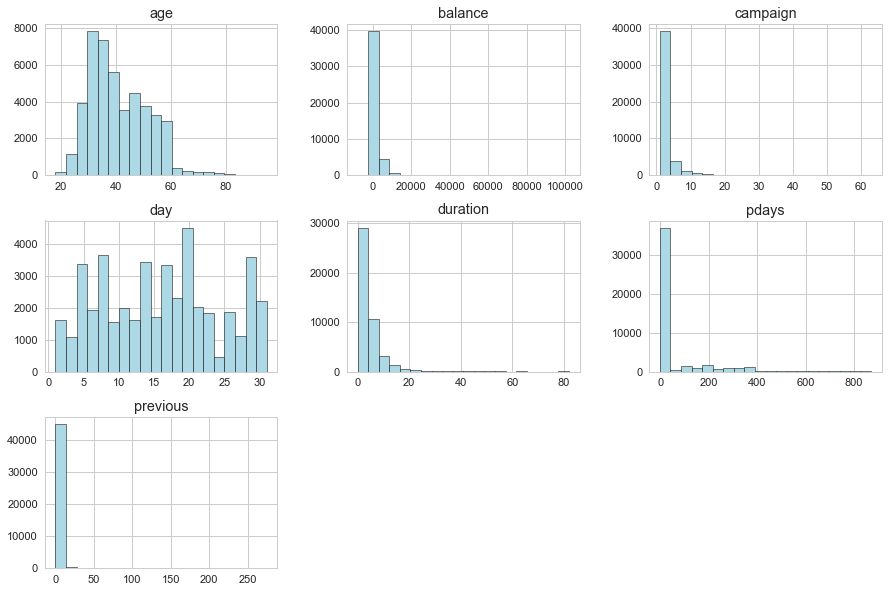

Descriptive stats of duration count   45,211.00
mean         4.30
std          4.29
min          0.00
25%          1.72
50%          3.00
75%          5.32
max         81.97
Name: duration, dtype: float64
Descriptive stats of campaign count   45,211.00
mean         2.76
std          3.10
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         63.00
Name: campaign, dtype: float64
Descriptive stats of day count   45,211.00
mean        15.81
std          8.32
min          1.00
25%          8.00
50%         16.00
75%         21.00
max         31.00
Name: day, dtype: float64
Descriptive stats of no of day past the capaign was last done:  count   45,211.00
mean        40.20
std        100.13
min         -1.00
25%         -1.00
50%         -1.00
75%         -1.00
max        871.00
Name: pdays, dtype: float64


In [260]:
#Change the unit of 'duration' from seconds to minutes

newdf = dataframe.copy()

newdf['duration'] = newdf['duration'].apply(lambda n:n/60).round(2)

plt.style.use('seaborn-whitegrid')

newdf.hist(bins=20, figsize=(15,10), color='lightblue', edgecolor = 'black')
plt.show()


#print("Descriptive stats of age",dataframe1['age'].describe())
print("Descriptive stats of duration",newdf['duration'].describe())
print("Descriptive stats of campaign",newdf['campaign'].describe())
print("Descriptive stats of day", newdf['day'].describe())
print("Descriptive stats of no of day past the capaign was last done: ", newdf['pdays'].describe())

## Quick Observations:

#### AGE:
Age looks uniformally distributed with small standard deviation.

Majority of the people falls in the age group of 30 to 40, that goes to show that most of them are young professional -33 to 48 years old fall within the 25th to 75th percentiles

There seems that bank executve has also called up in the age group of 70-90 which are low in numbers but it i a clear error as they can't be our target age group who will be ineterested in FD.

It also seems that around 1500-1600 student has also been targeted for fd which is most likely to ignore the fd option we will verify that in our bivariate analysis.

### Balance:

Balance data is not normally distributed and looks highly skewed and seems to have lot of outliers. We will treat outliers going forward.

There are around 7K, that is almost 10 % people with negative bank balance which may not be interested in fd at all as they are struggling with finance. So this needs to be taken care from bank side that the call to such people needs to be minimized .
The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

### Duration :

As observed from the historgram plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

### Campaign:

Median value for no of times bank contacted  to the given customer is 2 times amd max value is 63 times which seems way to high than the normal. These clients may have some special requirement i feel. 

### Day : seems to be normally dustributed,with median value of 16 being the last day of contact

pday & Other numerical values doesn't help much to infer anything significant here. Infact most of the independent numerical attributes has nothing much to descibe(). We will have to do bivariate & multivariate analysis to catch some meaningful insights.

## Boxplot(Univariate analysis) : For Numercial Attributes:

<Figure size 1440x1080 with 0 Axes>

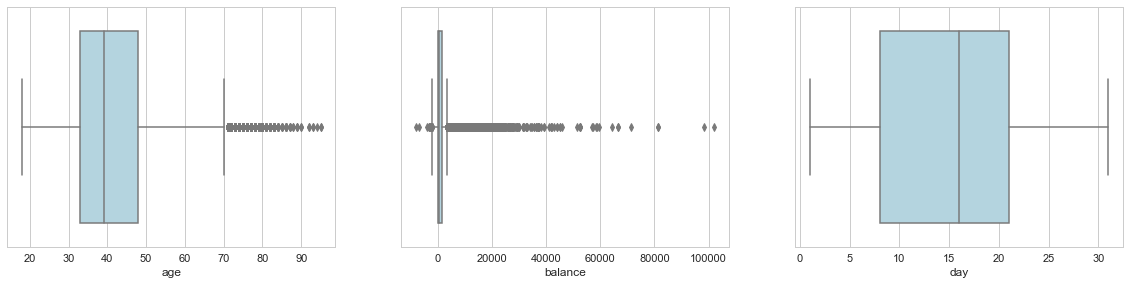

In [261]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf.age, color='lightblue')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.balance, color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.day, color='lightblue')

plt.show()

<Figure size 1440x1080 with 0 Axes>

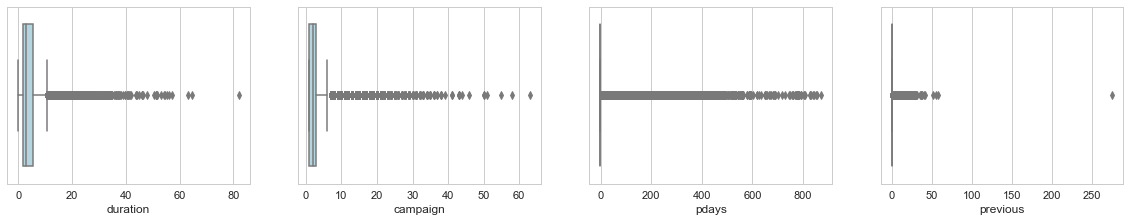

In [262]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(x= newdf.duration, color='lightblue')

plt.subplot(4,4,2)
sns.boxplot(x= newdf.campaign, color='lightblue')

plt.subplot(4,4,3)
sns.boxplot(x= newdf.pdays, color='lightblue')

plt.subplot(4,4,4)
sns.boxplot(x= newdf.previous, color='lightblue')

plt.show()

## Quick Insights From Above Boxplot Univariate distribution:

- There seems to be an outlier in age, between the age group 70-90.

- Max customer falls in the age range of 32-48 . Median age is very close to 40 which i feel banks have targeted consideringf that they will will more aligned to take fd option. but i don't feel so. As the tendency of person nearing retorement or early starter in professinal, i feel can opt for fd. We will verify that going forward.

- In balance attribute there seems to be high level of skewness which we also observed in our histplot analayis. There are some extreme outliers brtween 60k euro to 100k euro. There are long tails towards right side so it seems to be highly skewed. -Balance attribute needs to be treated for removing the outlier which we will deal next.

- Day attribite seems to be normally distributed with no significant outliers as such.
Rest of the numerical attribute doesn,t seems to be significant and are highly skewed with long tail mostly on the right side. As they are mostly skewed specially pdays and previous days,. There is nothing to statistically find here.

Let's treat outlier in balance attribute below:

## Removing Outler In Balance Attribute:

- As we found the oultiers in balance column abive in our descriptive stats , let's find and treat them.
- Also let,s print skew values for all numerical attributes
- We will make use of zscore here for the same
- Outliers are defined as the values which are more than three standard deviations away from the mean

In [263]:
newdf

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may      4.35         1     -1         0  unknown   
1        unknown    5   may      2.52         1     -1         0  unknown   
2        unknown    5   may      1.27         1     -1         0  unknown   
3        unknown    5   may      1.53         1     -1         0  unknown   
4        unknown    5   may      3.30         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov     16.28         3     -1         0  unknown   
45207   cellular   17   nov      7.60         2     -1         0  unknown   
45208   cellular   17   nov     18.78         5    184         3  success   
45209  telephone   17   nov      8.47         4     -1         0  unknown   
45210   cellular   17   nov      6.02         2    188        11    other   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no  

[45211 rows x 17 columns]

In [264]:
from scipy.stats import zscore
import scipy.stats as stats

#Let's check Skew in all numercial attributes


Skewness = pd.DataFrame({'Skewness' : [stats.skew(newdf.age),stats.skew(newdf.day),stats.skew(newdf.balance),stats.skew(newdf.duration),stats.skew(newdf.campaign),stats.skew(newdf.pdays),stats.skew(newdf.previous) ]},
                        index=['age','day','balance', 'duration', 'campaign', 'pdays', 'previous'])  # Measure the skeweness of the required columns
Skewness 

Skewness
age           0.68
day           0.09
balance       8.36
duration      3.14
campaign      4.90
pdays         2.62
previous     41.85

### Quick Insights From Above:

We will interpret the skewness number, using Bulmer (1979) — a classic — suggests this rule of thumb:

If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric.

- age & day seems to be doing ok in terms of skewness
- while balance , duration, campaign, pdays, previous are highly skewed and seems to have lot of outlier

We visualized the outliers and skewness when we plotted the distributon of the numercial data using boxplot above.

balance   1,362.27
dtype: float64

balance   1,362.27
dtype: float64

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

We managed to get rid to some extreme outlier shown below. 


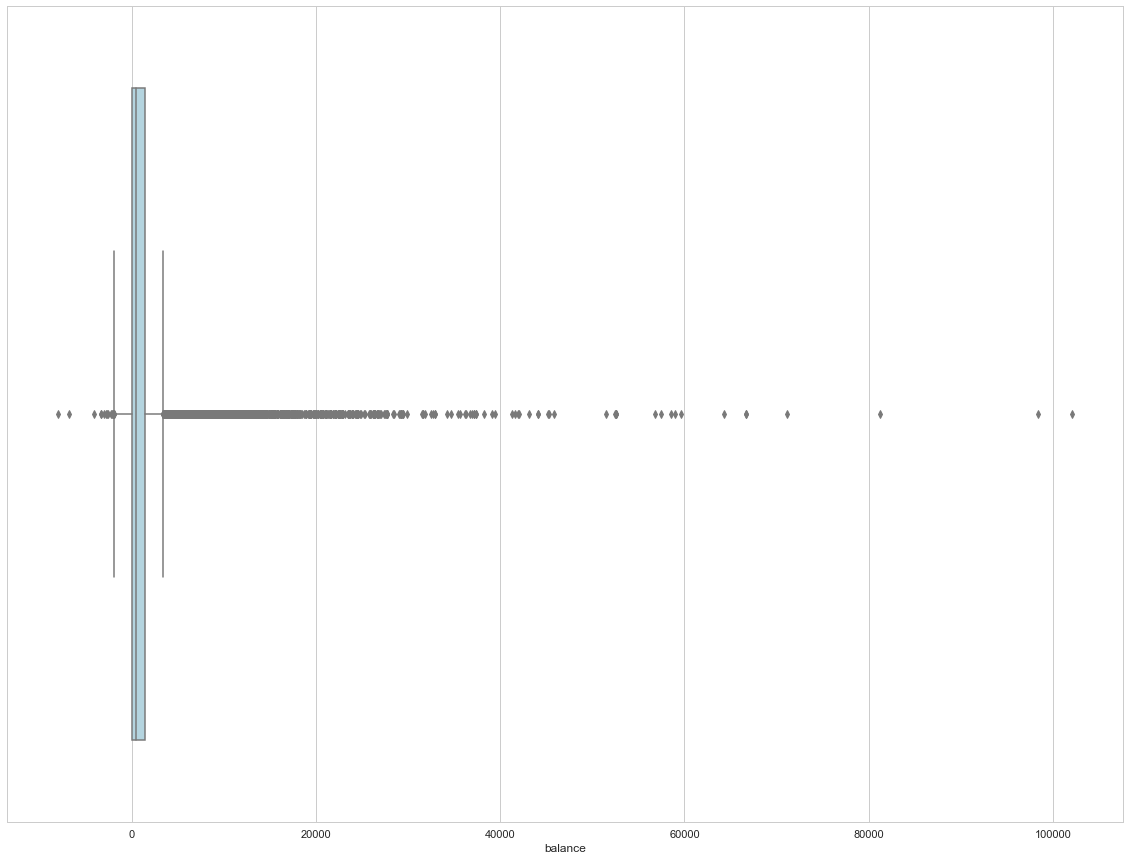

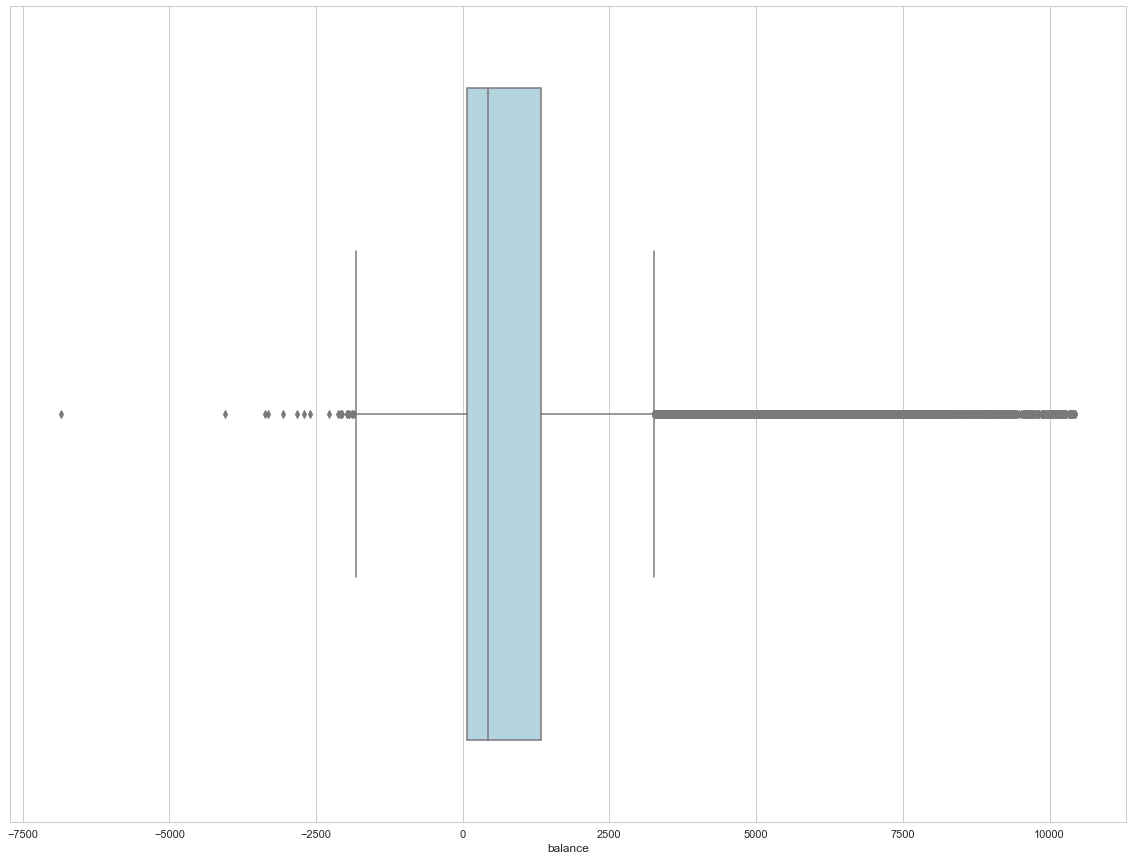

In [266]:
#Removing outliers in balance data using zscore:

from scipy.stats import zscore

newdf[['balance']].mean()
newdf[['balance']].mean()

newdf['balance_outliers'] = newdf['balance']
newdf['balance_outliers']= zscore(newdf['balance_outliers'])

condition1 = (newdf['balance_outliers']>3) | (newdf['balance_outliers']<-3 )
newdf1 = newdf.drop(newdf[condition1].index, axis = 0, inplace = False)
newdf2 = newdf1.drop('balance_outliers', axis=1)

#original one 
plt.figure(figsize= (20,15))
sns.boxplot(x= df1.balance, color='lightblue')

#After outlier treatment using z score

plt.figure(figsize= (20,15))
sns.boxplot(x= df5.balance, color='lightblue')
print("We managed to get rid to some extreme outlier shown below. ")

In [267]:
objdf = newdf.select_dtypes(include ='object') 
objdf.head(5)

job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome Target  
0  unknown     no  
1  unknown     no  
2  unknown     no  
3  unknown     no  
4  unknown     no

### Categorical Column Values

In [268]:
newdf['job'].unique()
newdf['marital'].unique()
newdf['education'].unique()
newdf['contact'].unique()
newdf['poutcome'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

array(['married', 'single', 'divorced'], dtype=object)

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

array(['unknown', 'cellular', 'telephone'], dtype=object)

array(['unknown', 'failure', 'other', 'success'], dtype=object)

Text(0.5, 0.98, 'Information on Term Suscriptions')

Text(0, 0.5, '% of Condition of Loans')

Text(0, 10, '25.1 %')

Text(0, 10, '45.9 %')

Text(0, 10, '3.6 %')

Text(0, 10, '14.0 %')

Text(0, 10, '4.3 %')

Text(0, 10, '5.3 %')

Text(0, 10, '0.6 %')

Text(0, 10, '1.3 %')

[Text(0, 0.5, '(%)')]

[Text(0, 0, 'tertiary'),
 Text(0, 0, 'secondary'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'primary')]

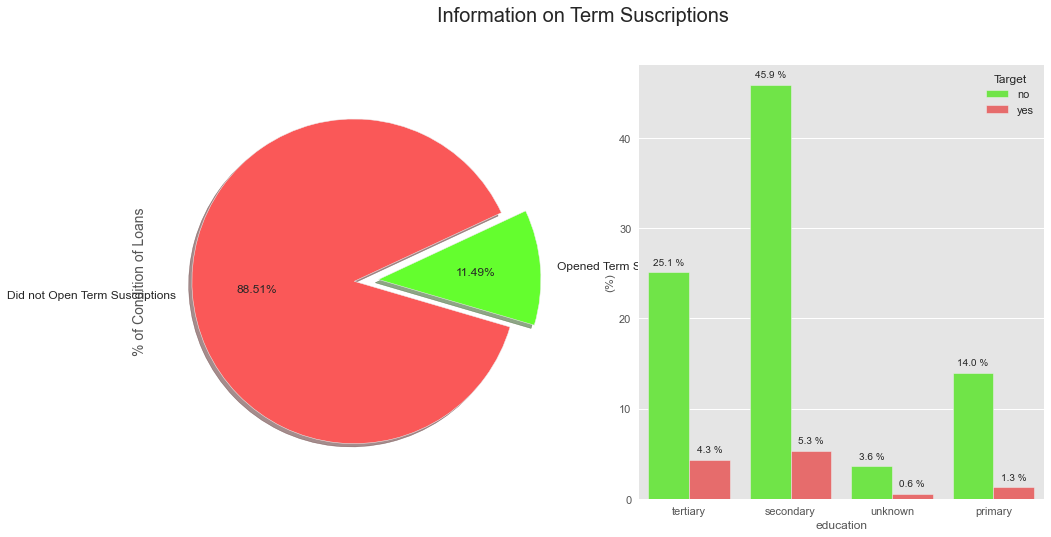

In [197]:
plt.style.use('ggplot')

f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Subscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df1["Target"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

    
# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

ba = sns.barplot(x="education", y="balance", hue="Target", data=df1, palette=palette, estimator=lambda x: len(x) / len(df1) * 100)

for a in ba.patches:
        
    ba.annotate( format(a.get_height(), '.1f')+' %' , 
             (a.get_x() + a.get_width() / 2., a.get_height()), 
             ha = 'center', 
             va = 'center', 
             xytext = (0, 10), 
             textcoords = 'offset points')
    

ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df1["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

Text(0.5, 0.98, 'Information on Term Suscriptions')

Text(0, 0.5, '% of Condition of Loans')

Text(0, 10, '18.1 %')

Text(0, 10, '15.0 %')

Text(0, 10, '3.1 %')

Text(0, 10, '20.0 %')

Text(0, 10, '0.6 %')

Text(0, 10, '3.9 %')

Text(0, 10, '10.0 %')

Text(0, 10, '8.4 %')

Text(0, 10, '3.1 %')

Text(0, 10, '2.5 %')

Text(0, 10, '2.6 %')

Text(0, 10, '1.4 %')

Text(0, 10, '2.8 %')

Text(0, 10, '1.8 %')

Text(0, 10, '0.3 %')

Text(0, 10, '1.6 %')

Text(0, 10, '0.1 %')

Text(0, 10, '1.1 %')

Text(0, 10, '1.4 %')

Text(0, 10, '0.8 %')

Text(0, 10, '0.4 %')

Text(0, 10, '0.4 %')

Text(0, 10, '0.2 %')

Text(0, 10, '0.6 %')

[Text(0, 0.5, '(%)')]

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

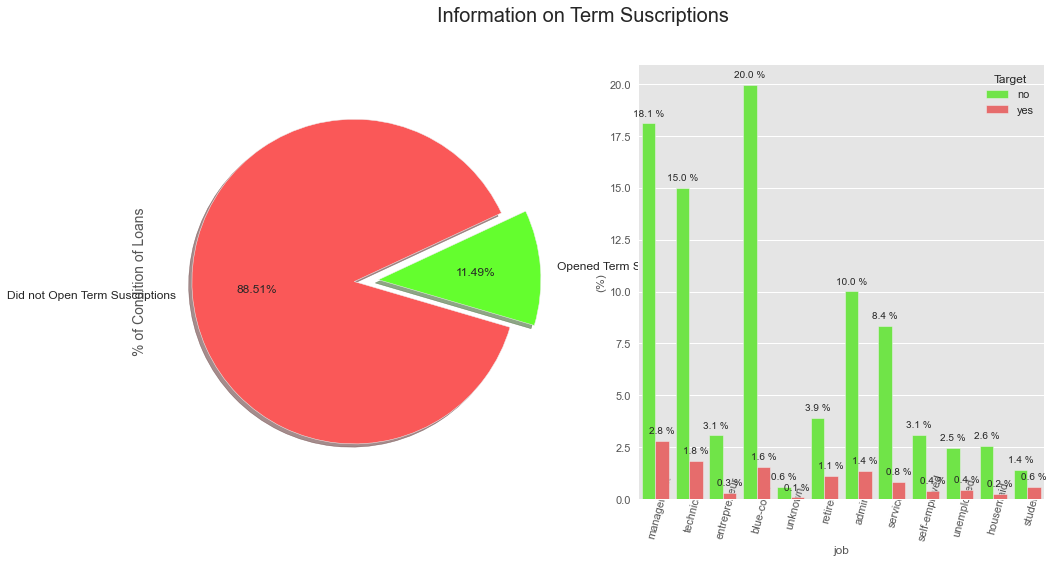

In [198]:
plt.style.use('ggplot')

f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Subscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df1["Target"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

    
# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

ba = sns.barplot(x="job", y="balance", hue="Target", data=df1, palette=palette, estimator=lambda x: len(x) / len(df1) * 100)

for a in ba.patches:
        
    ba.annotate( format(a.get_height(), '.1f')+' %' , 
             (a.get_x() + a.get_width() / 2., a.get_height()), 
             ha = 'center', 
             va = 'center', 
             xytext = (0, 10), 
             textcoords = 'offset points')
    

ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df1["job"].unique(), rotation=75, rotation_mode="anchor")
plt.show()

Text(0.5, 0.98, 'Information on Term Suscriptions')

Text(0, 0.5, '% of Condition of Loans')

Text(0, 10, '54.5 %')

Text(0, 10, '23.9 %')

Text(0, 10, '10.1 %')

Text(0, 10, '6.0 %')

Text(0, 10, '4.1 %')

Text(0, 10, '1.4 %')

[Text(0, 0.5, '(%)')]

[Text(0, 0, 'married'), Text(0, 0, 'single'), Text(0, 0, 'divorced')]

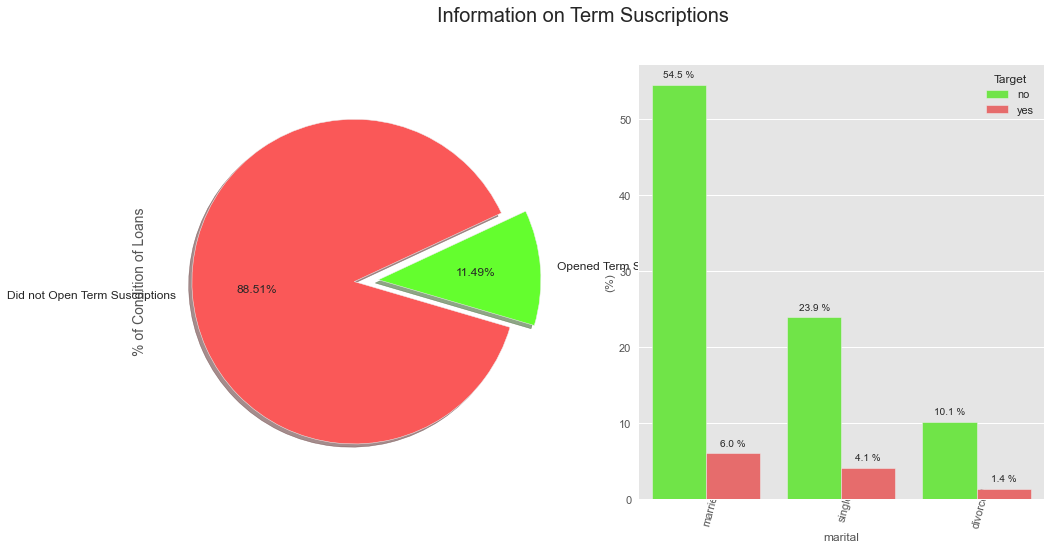

In [199]:
plt.style.use('ggplot')

f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Subscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df1["Target"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

    
# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

ba = sns.barplot(x="marital", y="balance", hue="Target", data=df1, palette=palette, estimator=lambda x: len(x) / len(df1) * 100)

for a in ba.patches:
        
    ba.annotate( format(a.get_height(), '.1f')+' %' , 
             (a.get_x() + a.get_width() / 2., a.get_height()), 
             ha = 'center', 
             va = 'center', 
             xytext = (0, 10), 
             textcoords = 'offset points')
    

ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df1["marital"].unique(), rotation=75, rotation_mode="anchor")
plt.show()

In [183]:
 #df1.drop(labels=['contact'], axis=1,inplace=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb00115f390>,
      dtype=object)

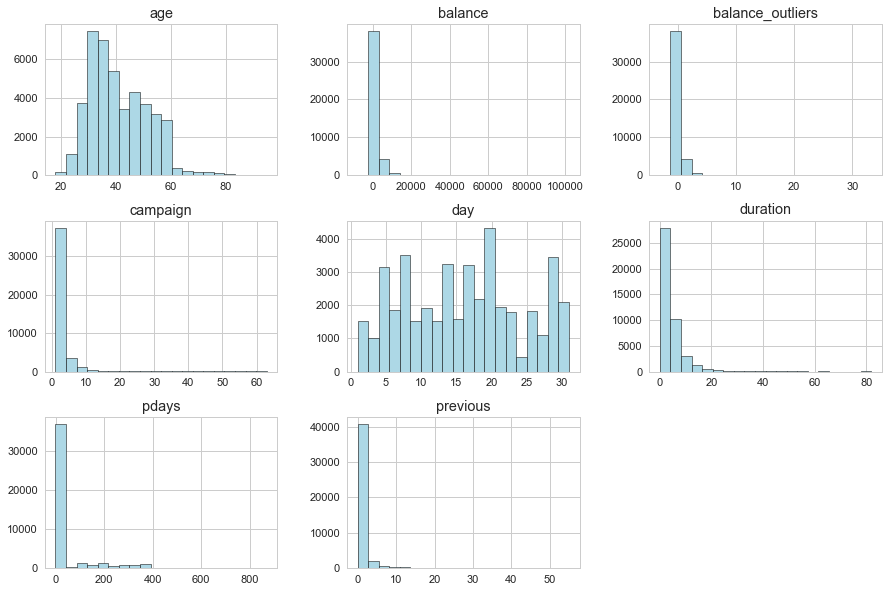

Descriptive stats of duration count   43,371.00
mean         4.30
std          4.30
min          0.00
25%          1.72
50%          3.00
75%          5.30
max         81.97
Name: duration, dtype: float64
Descriptive stats of campaign count   43,371.00
mean         2.78
std          3.14
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         63.00
Name: campaign, dtype: float64
Descriptive stats of day count   43,371.00
mean        15.86
std          8.32
min          1.00
25%          8.00
50%         16.00
75%         21.00
max         31.00
Name: day, dtype: float64
Descriptive stats of no of day past the capaign was last done:  count   43,371.00
mean        32.16
std         90.69
min         -1.00
25%         -1.00
50%         -1.00
75%         -1.00
max        871.00
Name: pdays, dtype: float64


In [200]:
#Change the unit of 'duration' from seconds to minutes


newdf1 = df1.copy()

newdf1['duration'] = newdf1['duration'].apply(lambda n:n/60).round(2)
df2['duration'] = df2['duration'].apply(lambda n:n/60).round(2)

plt.style.use('seaborn-whitegrid')

newdf1.hist(bins=20, figsize=(15,10), color='lightblue', edgecolor = 'black')
plt.show()


#print("Descriptive stats of age",dataframe1['age'].describe())
print("Descriptive stats of duration",newdf1['duration'].describe())
print("Descriptive stats of campaign",newdf1['campaign'].describe())
print("Descriptive stats of day", newdf1['day'].describe())
print("Descriptive stats of no of day past the capaign was last done: ", newdf1['pdays'].describe())

In [201]:
newdf1

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may      4.35         1     -1         0  unknown   
1        unknown    5   may      2.52         1     -1         0  unknown   
2        unknown    5   may      1.27         1     -1         0  unknown   
3        unknown    5   may      1.53         1     -1         0  unknown   
4        unknown    5   may      3.30         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45205   cellular   17   nov      6.43         2     -1         0  unknown   
45206   cellular   17   nov     16.28         3     -1         0  unknown   
45207   cellular   17   nov      7.60         2     -1         0  unknown   
45208   cellular   17   nov     18.78         5    184         3  success   
45209  telephone   17   nov      8.47         4     -1         0  unknown   

      Target  balance_outliers  
0         no              0.26  
1         no             -0.44  
2         no             -0.45  
3         no              0.05  
4         no             -0.45  
...      ...               ...  
45205    yes             -0.28  
45206    yes             -0.18  
45207    yes              0.12  
45208    yes              1.44  
45209     no             -0.23  

[43371 rows x 18 columns]

In [202]:
objdf = newdf1.select_dtypes(include ='object') 
objdf.head(5)

job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome Target  
0  unknown     no  
1  unknown     no  
2  unknown     no  
3  unknown     no  
4  unknown     no

## Univariate Analysis: Categorical Data
We will be making use of countplot to visulaize categorical distribution of the data

<Figure size 2520x2160 with 0 Axes>

job count distribution :  blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


<BarContainer object of 12 artists>

Text(0.5, 0, 'Job Type')

Text(0, 0.5, 'Count ')

Text(0.5, 1.0, 'Job Type Distribution')


x1 marital attribute count:  married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


<BarContainer object of 3 artists>

Text(0.5, 0, 'Marital ')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Marital Status distribution')


x2 education level count distribution:  secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


<BarContainer object of 4 artists>

Text(0.5, 0, 'education')

Text(0, 0.5, 'Count ')

Text(0.5, 1.0, "education' distribution")


x3 Credit default count distribution:  no     44396
yes      815
Name: default, dtype: int64


<BarContainer object of 2 artists>

Text(0.5, 0, 'Credit Default ?')

Text(0, 0.5, 'Count ')

Text(0.5, 1.0, 'Credit Default Distribution')


x4 housing loan count distribution:  yes    25130
no     20081
Name: housing, dtype: int64


<BarContainer object of 2 artists>

Text(0.5, 0, 'housing Loan ?')

Text(0, 0.5, 'Count ')

Text(0.5, 1.0, 'Housing Loan Distribution')


Personal loan count distribution:  no     37967
yes     7244
Name: loan, dtype: int64


<BarContainer object of 2 artists>

Text(0.5, 0, 'Personal Loan ?')

Text(0, 0.5, 'Count ')

Text(0.5, 1.0, 'Personal Loan Distribution')

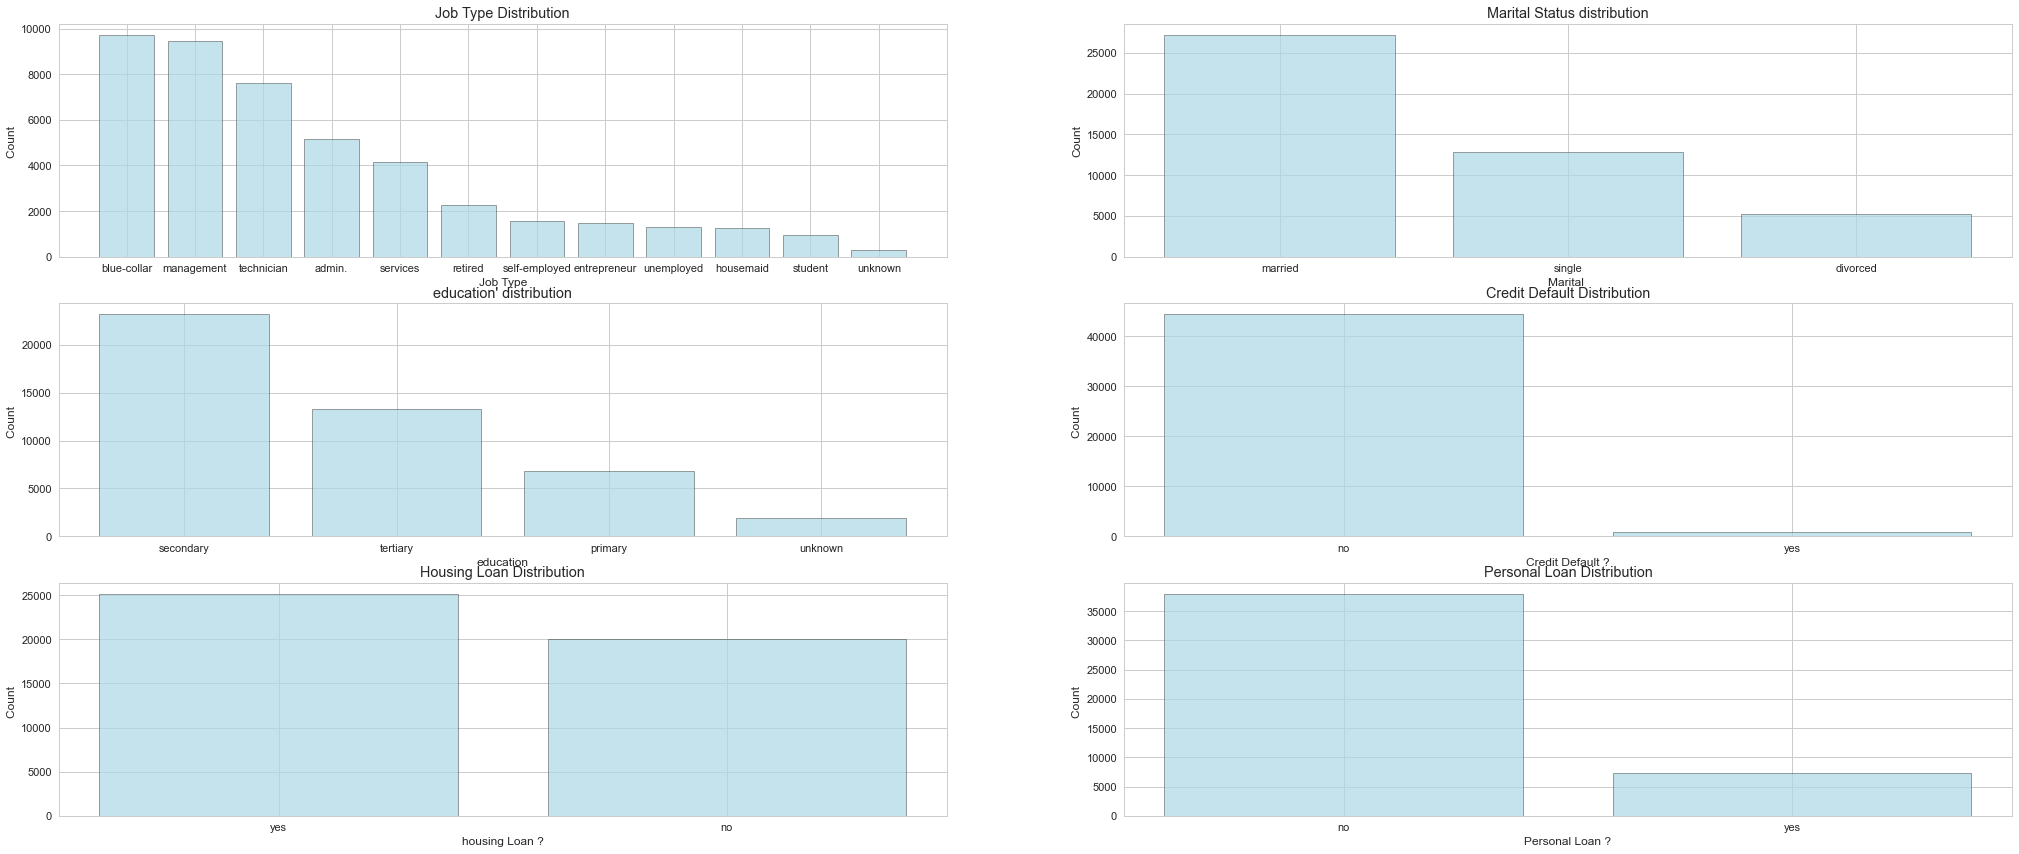

In [269]:
plt.figure(figsize=(35,30))

#Job category

x = newdf.job.value_counts().index    #Values for x-axis
print("job count distribution : ", newdf.job.value_counts())
y = [newdf['job'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(6,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Job Type')
plt.ylabel('Count ')
plt.title('Job Type Distribution')


#Marital Status 
x1 = newdf.marital.value_counts().index    #Values for x-axis
y1 = [newdf['marital'].value_counts()[j] for j in x1]   # Count of each class on y-axis

print("\nx1 marital attribute count: ", newdf.marital.value_counts())
plt.subplot(6,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Marital ')
plt.ylabel('Count')
plt.title('Marital Status distribution')

#education level

x2 = newdf.education.value_counts().index    #Values for x-axis
y2 = [newdf['education'].value_counts()[k] for k in x2]   # Count of each class on y-axis

print("\nx2 education level count distribution: ", newdf.education.value_counts())

plt.subplot(6,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('education')
plt.ylabel('Count ')
plt.title("education' distribution")

#credit defaulter or not?

x3 = newdf.default.value_counts().index    #Values for x-axis
y3 = [newdf['default'].value_counts()[l] for l in x3]   # Count of each class on y-axis

print("\nx3 Credit default count distribution: ", newdf.default.value_counts())
plt.subplot(6,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Credit Default ?')
plt.ylabel('Count ')
plt.title("Credit Default Distribution")

#housing loan availed or not 

x4 = newdf.housing.value_counts().index    #Values for x-axis
y4 = [newdf['housing'].value_counts()[m] for m in x4]   # Count of each class on y-axis

print("\nx4 housing loan count distribution: ", newdf.housing.value_counts())
plt.subplot(6,2,5)
plt.bar(x4,y4, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('housing Loan ?')
plt.ylabel('Count ')
plt.title("Housing Loan Distribution")

#Personal Loan
x5 = newdf.loan.value_counts().index    #Values for x-axis
y5 = [newdf['loan'].value_counts()[n] for n in x5]   # Count of each class on y-axis
print("\nPersonal loan count distribution: ", newdf.loan.value_counts())
plt.subplot(6,2,6)
plt.bar(x5,y5, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Personal Loan ?')
plt.ylabel('Count ')
plt.title("Personal Loan Distribution")
plt.show()

## Quick Observation On The Above Categorical Plot

Job Type Distribution:

blue-collar 9732 management 9458 technician 7597 admin. 5171 services 4154 retired 2264 self-employed 1579 entrepreneur 1487 unemployed 1303 housemaid 1240 student 938 unknown 288

Job:

Blue-Collar, Management professionals & technicican jobs are in majority which were targeted by the bank.
There are some cutomers who are unemployed, housemaid, student which were also targeted, which is not the good move as mostly they will not convert as fd customer. Though they are not significant in numbers
There are few unknowns(around 220) people who were targeted, which don't seems to be a value addition so these needs to be ignored
There are also some entrepreneurs and self-employed people which i feel will be hard to convert as fd customer. Chance of entrepreneurs and sel-employed person having FD i feel will be low. We will be verifying that when we do the bivariate analysis on categorical values using Target as hue.
MaritalStataus:

married 27214 single 12790 divorced 5207

ALmost 50% counting to 27214, customers are married which is as expected as they are more saving conscious.
28 % people are single , we expect more convesion rate from young single working professional,we will verify that when we do bivariate analysis
There are some broken customers who are divorced, they account for 11 %, we should not expect them to convert to fd customers. That we will check going forward.
EDUCATION:

Education Level Distribution:

secondary 23202 tertiary 13301 primary 6851 unknown 1857

It seems that around 51 % of the targeted customers are having secondar level of education and around 29 % customers are having qualification beyoind 12th class. It means that the targeted customers 51 % with secondary level education is somewhat not as per expectation and the campaign will not bear fruitful result. We neded to rethink the target audience here. Our focus should be more on working profesionals whose qualification will be beyound secondary level.

We also found some unknown customers whose level of education is not clear this needs to be ignored or resampled.

Arounf 6851 customers are still studying and should not be our target audience.They are very less liskely to take fd option. We will verify the same going forward.

Credit Default:

Distribution: No : 44396 yes : 815

- It is good to see that almost 98 %  of the targeted customers don't default 
- Only 815 out 45211 people are defaulter and are not credit worthy. These people needs to be ignored while targeting for fd conversion. 

PERSONAL LOAN: no 37967 yes 7244

- 83 % customers have no personal loan lying with them only 17% people who were targeted have personal loan availed. We will see if people with no PL may have availed FD or not when we do bivariate analysis. I feel they are more likely to avail FD as compared to person who already have PL on their head to pay. 


<Figure size 1440x1800 with 0 Axes>


Distribution Of Mode Of Communication With Customers:  cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


<BarContainer object of 3 artists>

Text(0.5, 0, 'Contact Type  ?')

Text(0, 0.5, 'Count ')

Text(0.5, 1.0, 'Contact Type Distribution')


Distribution Of communication result:  unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


<BarContainer object of 4 artists>

Text(0.5, 0, 'Phone Call Outcome  ?')

Text(0, 0.5, 'Count ')

Text(0.5, 1.0, 'Phone Call Outcome Distribution')


Distribution Of monthly customer contact detail :  may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


<BarContainer object of 12 artists>

Text(0.5, 0, 'Month Contacted  ?')

Text(0, 0.5, 'Count ')

Text(0.5, 1.0, 'Month Contacted Distribution')


Distribution Of customer W.R.T FD :  no     39922
yes     5289
Name: Target, dtype: int64


<BarContainer object of 2 artists>

Text(0.5, 0, 'FD Status ?')

Text(0, 0.5, 'Count ')

Text(0.5, 1.0, ' FD status Distribution')

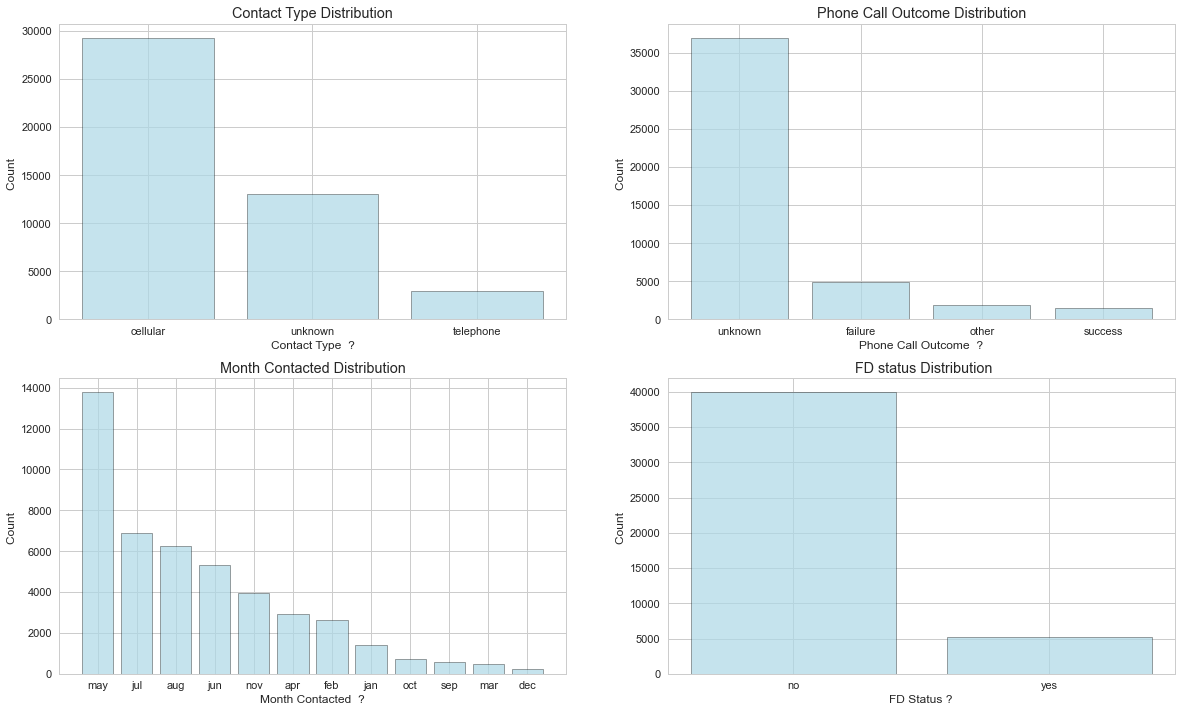

In [270]:
plt.figure(figsize=(20,25))

#Mode of communication with customers
x6 = newdf.contact.value_counts().index    #Values for x-axis
y6 = [newdf['contact'].value_counts()[o] for o in x6]   # Count of each class on y-axis

print("\nDistribution Of Mode Of Communication With Customers: ", newdf.contact.value_counts())

plt.subplot(4,2,1)
plt.bar(x6,y6, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Contact Type  ?')
plt.ylabel('Count ')
plt.title("Contact Type Distribution")

#communication result

x7 = newdf.poutcome.value_counts().index    #Values for x-axis
y7 = [newdf['poutcome'].value_counts()[p] for p in x7]   # Count of each class on y-axis

print("\nDistribution Of communication result: ", newdf.poutcome.value_counts())

plt.subplot(4,2,2)
plt.bar(x7,y7, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Phone Call Outcome  ?')
plt.ylabel('Count ')
plt.title("Phone Call Outcome Distribution")

#month when customer was last contacted

x8 = newdf.month.value_counts().index    #Values for x-axis
y8 = [newdf['month'].value_counts()[q] for q in x8]   # Count of each class on y-axis

print("\nDistribution Of monthly customer contact detail : ", newdf.month.value_counts())
plt.subplot(4,2,3)
plt.bar(x8,y8, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Month Contacted  ?')
plt.ylabel('Count ')
plt.title("Month Contacted Distribution")


#FD status Which is our target variable

x9 = newdf.Target.value_counts().index    #Values for x-axis
y9 = [newdf['Target'].value_counts()[r] for r in x9]   # Count of each class on y-axis

print("\nDistribution Of customer W.R.T FD : ", newdf.Target.value_counts())
plt.subplot(4,2,4)
plt.bar(x9,y9, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('FD Status ?')
plt.ylabel('Count ')
plt.title(" FD status Distribution")

plt.show()

## Quick Observation On Above Category Plot :

Mode Of Communication With Customer:
cellular 29285 unknown 13020 telephone 2906

- Around 64 % mobile phone was used to contact potential customer. It will be interesting to see what was the call duration for the same, as it will impact the conversion rate to larger extent
- Almost 28 % people mode of communication has ot been captured as needed with unknown categorization . These data don't seems to add any value as we don't know how to infer the outcome here. We need to resample this data to make sense and as this accounts for significant potion of the customer. 
- Landline as expected has very low share as a mode of client communication. It gos to show that mobile has overpowered any other mode of people communication including the legendary landline. 

Phone Call Outcome:
unknown 36959 failure 4901 other 1840 success 1511

- It seems that large share of poutcome result which accounts for 80 % has not been captured meaningfully. This makes outcome as an attribute very insignificant to measure and gain any insight
- The entire exercise to convert potentoal customer has not performed to the expecations as paltry 1511 person only responded positive. 
- This attribute needs to be resampled or ignored 

Month Wise Distribution , in a given year When Customer Wsa Last Contacted
may 13766 jul 6895 aug 6247 jun 5341 nov 3970 apr 2932 feb 2649 jan 1403 oct 738 sep 579 mar 477 dec 214

May month seems to have more frequency(13766) where banl connected to the potential customer for FD campaign. It can be also dure to previous year financial closing and to add new customers for FD instrument, to increase bank revenue.

Jun, July , August also have far share but not as mich compared to may month

Frequency of customer contact seems to be droppong as the month progreses after may in a given year. Specially dec month.
March also has very frequency where bank contacted potential customer which looks as expected beacuse of financial year closing.

Target(FD) Variable : no : 39922 yes: 5289

- 88 % of the contacted customers seems to be not interested in FD which usually is the case specially for young customers due to low rate of interest. Also we have see the data distribution of various attributwe where many unkown records existed which are not at all adding to the analysis.
So the  result is not surprising. Here data is imbalanced mostly classified in favour of NO. This situation may lead to high accuracy score and lots of model error for individual clasification models

- Ensemble model where it combines many model seems to be the right solution to compensate the error rate and build string model. We will see this going forward

## BIVARIATE ANALYSIS:

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

We Will See how each attribute impacts each other using bivariate boxplot & Scatter Plot Ananlysis:

### Let us see the count of customers who subscribed to FD based on their age
We Will making using of count plot with Target var as hue.

<Figure size 1440x720 with 0 Axes>

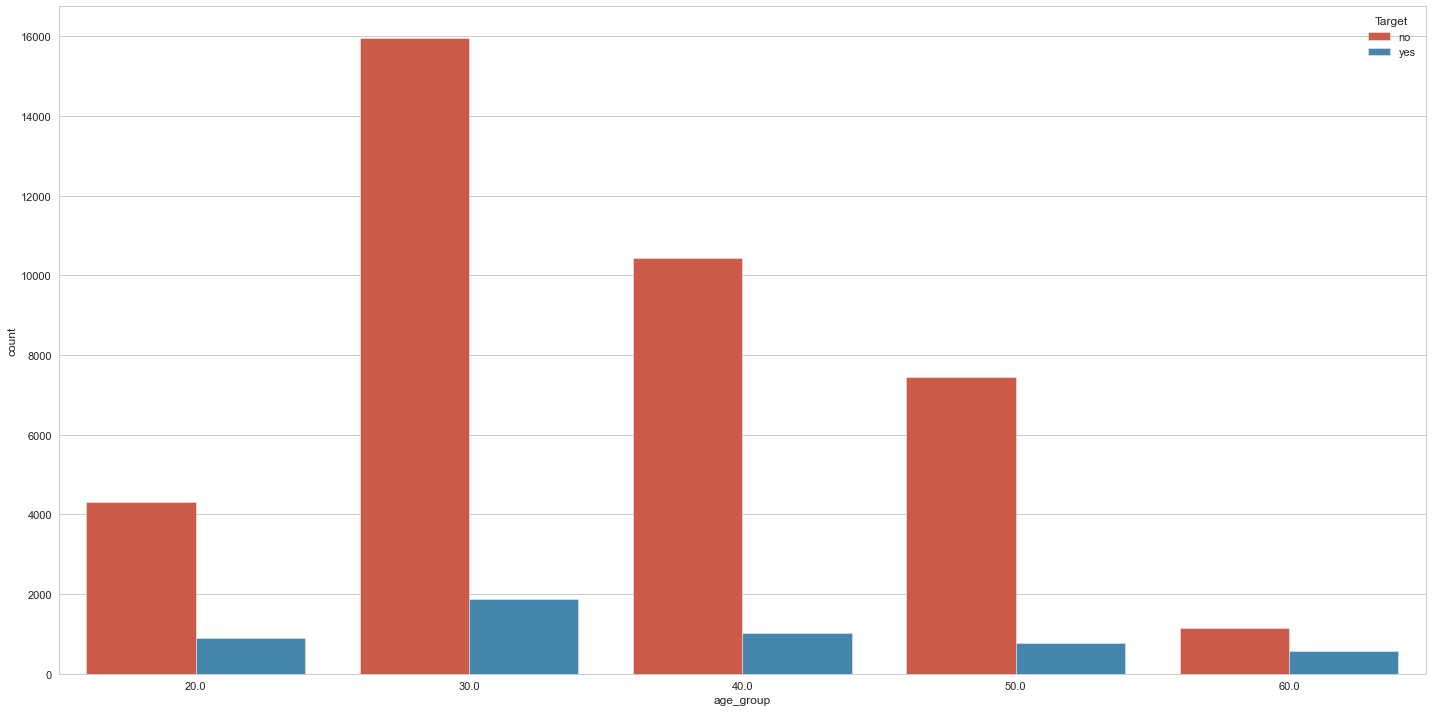

In [271]:

#But First Let's Craete Age Grouping: 

lst = [newdf2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
    count_age_response_pct = pd.crosstab(newdf2['Target'],newdf2['age_group']).apply(lambda x: x/x.sum() * 100)
    
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(newdf2['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% FD Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)


plt.figure(figsize=(20,10))
sns.countplot(newdf2['age_group'], hue = "Target", data=newdf2)
plt.tight_layout()

### Quick Insights:

  - FD subscription rate is higher among young people between the age of 30-40 , but one should also consider the fact that distribution of sampled data is imbalanced in terms of no & yes. Given this fact people with 60 and beyond also has fared well in term s of FD subscription

<Figure size 1440x720 with 0 Axes>

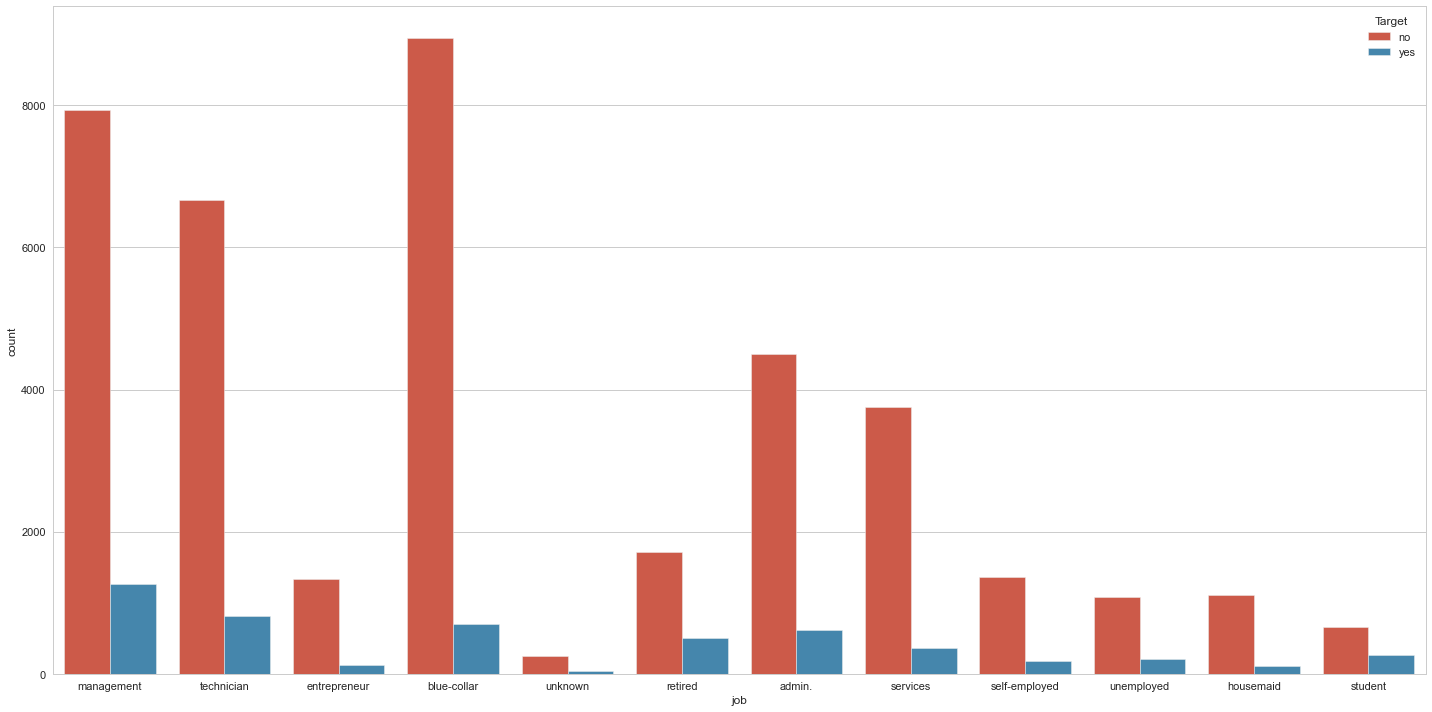

In [274]:
# Let us see the count of customers who subscribed to FD based on their job profile


plt.figure(figsize=(20,10))
sns.countplot(newdf2.job, hue = "Target", data=newdf2)
plt.tight_layout()

### Quick Insights:

  - Management professional seems to be more likely to avail FD option here. 
  - Technician also seems to faring well along with blue collar professionals.   

<Figure size 1440x720 with 0 Axes>

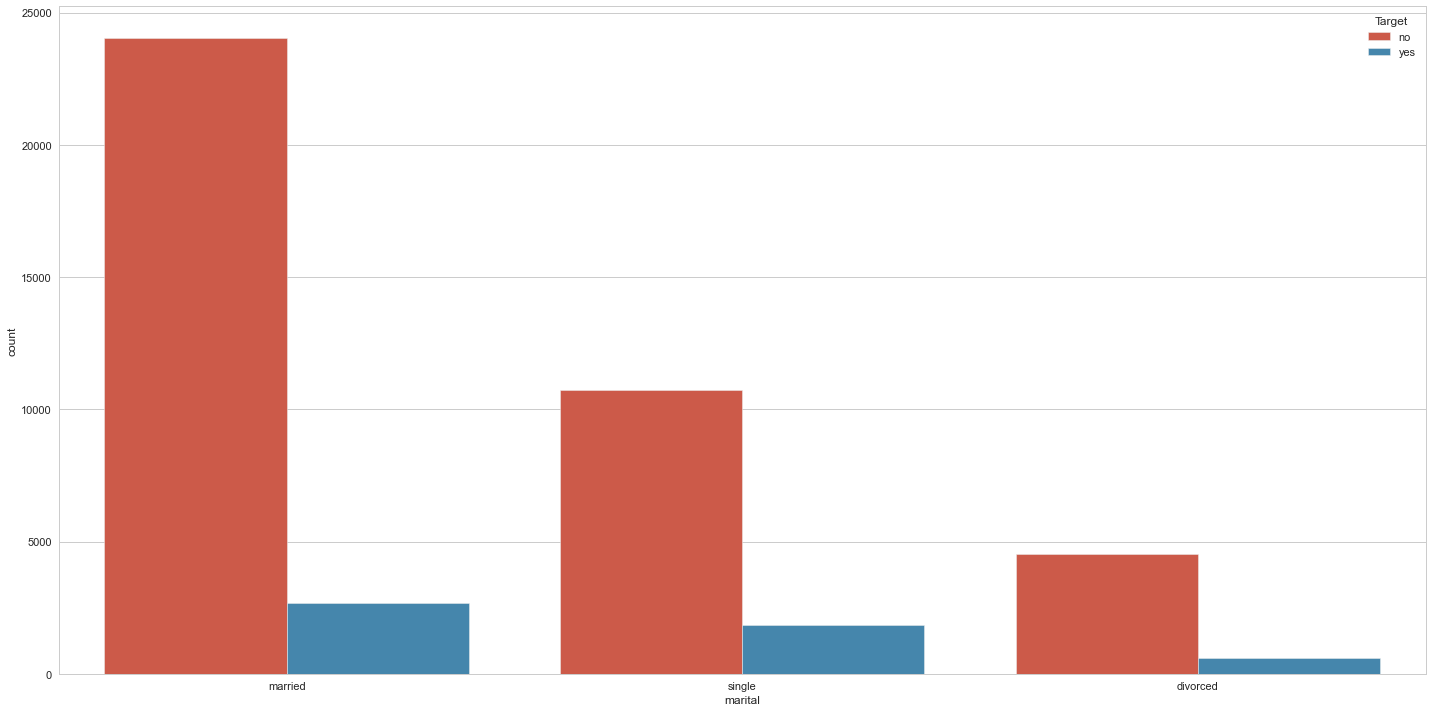

In [275]:
# Let us see the count of customers who subscribed to FD based on their Marital Status



plt.figure(figsize=(20,10))
sns.countplot(newdf2.marital, hue = "Target", data=newdf2)
plt.tight_layout()


### Quick Insights

Marital Status Impacts On FD Subscription :

Married customers has higher fd subscription, divorced people are broken and are less likely to avail FD

<Figure size 1440x720 with 0 Axes>

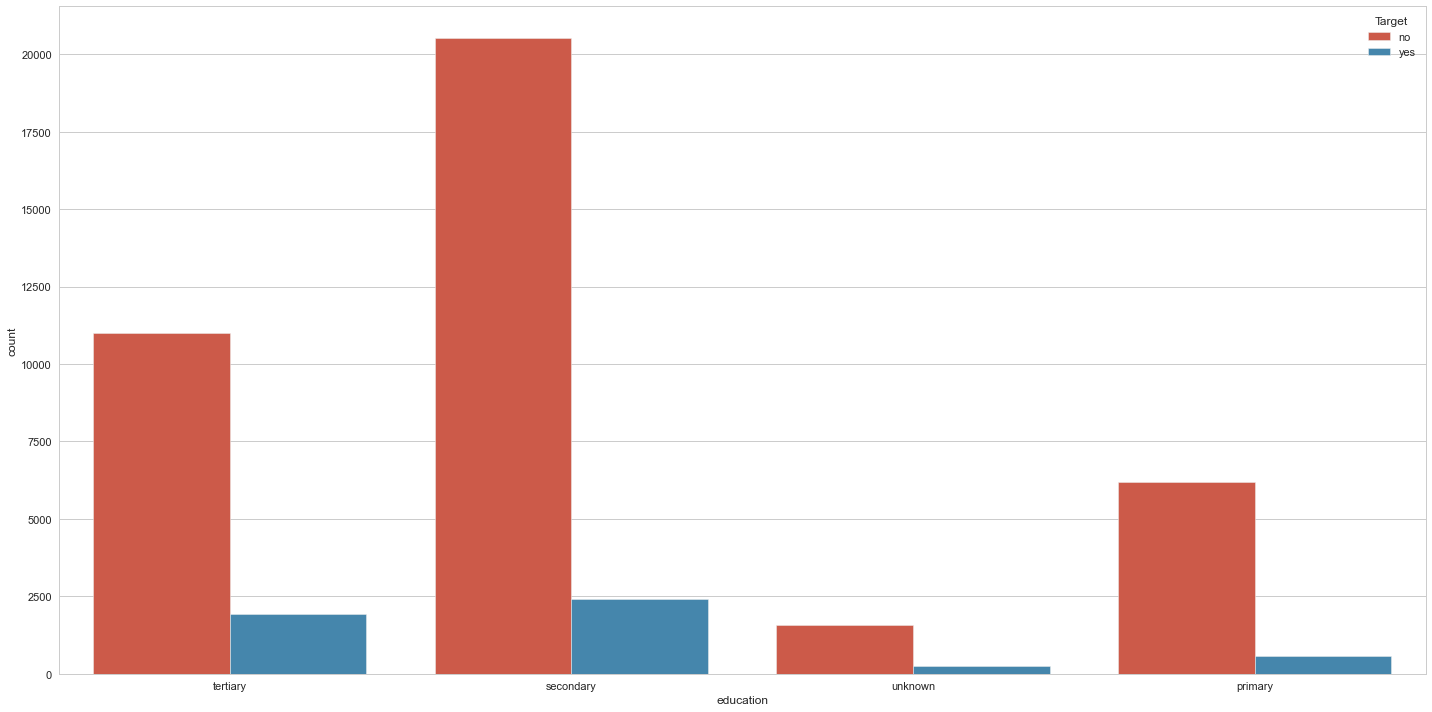

In [276]:
# Let us see the count of customers who subscribed to FD based on their education level


plt.figure(figsize=(20,10))
sns.countplot(newdf2.education, hue = "Target", data=newdf2)
plt.tight_layout()

### Quick Insights


Higher the education level higher is the rate of FD subscription

<Figure size 1440x720 with 0 Axes>

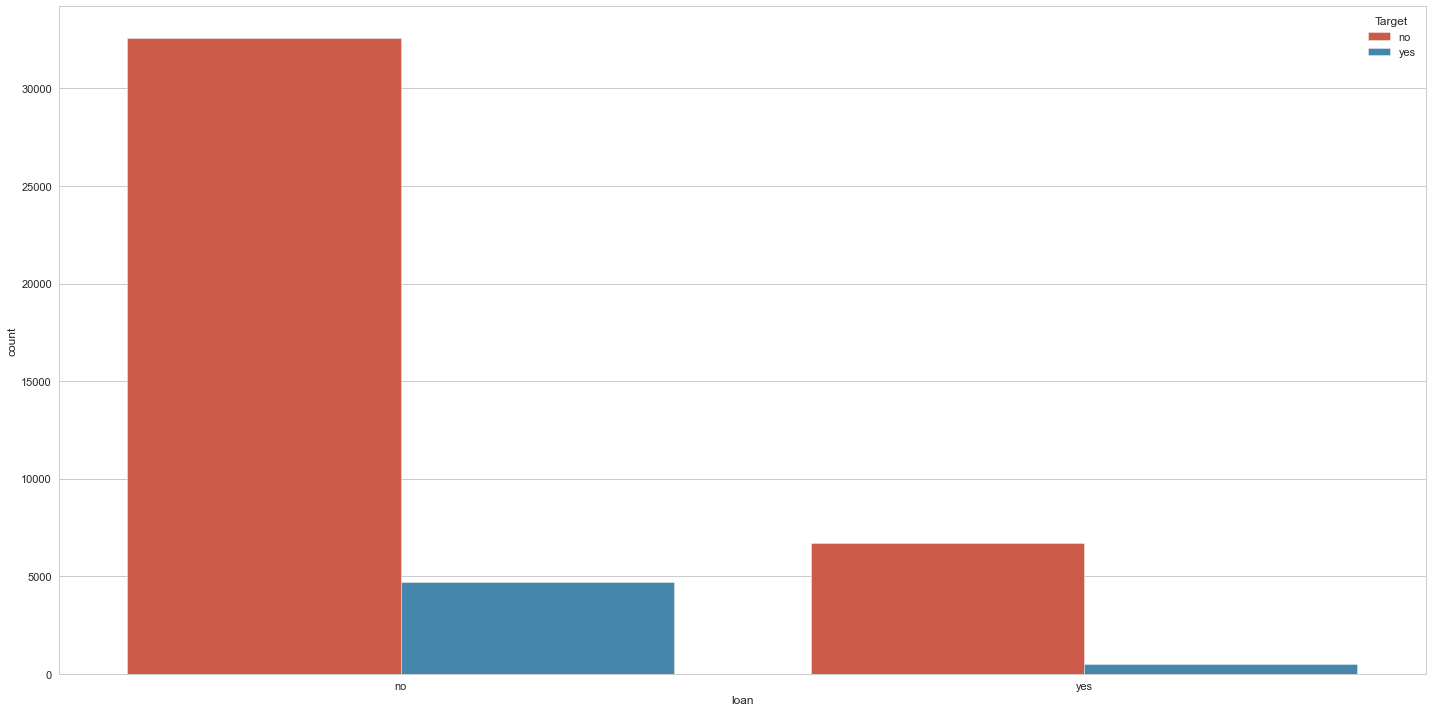

In [277]:
# Let us see the count of customers who subscribed to FD based on their Personal Loan Status


plt.figure(figsize=(20,10))
sns.countplot(newdf2.loan, hue = "Target", data=newdf2)
plt.tight_layout()


### Quick Insights:

Customer with no Personal loan has higher FD subscription Rate.

<Figure size 1440x720 with 0 Axes>

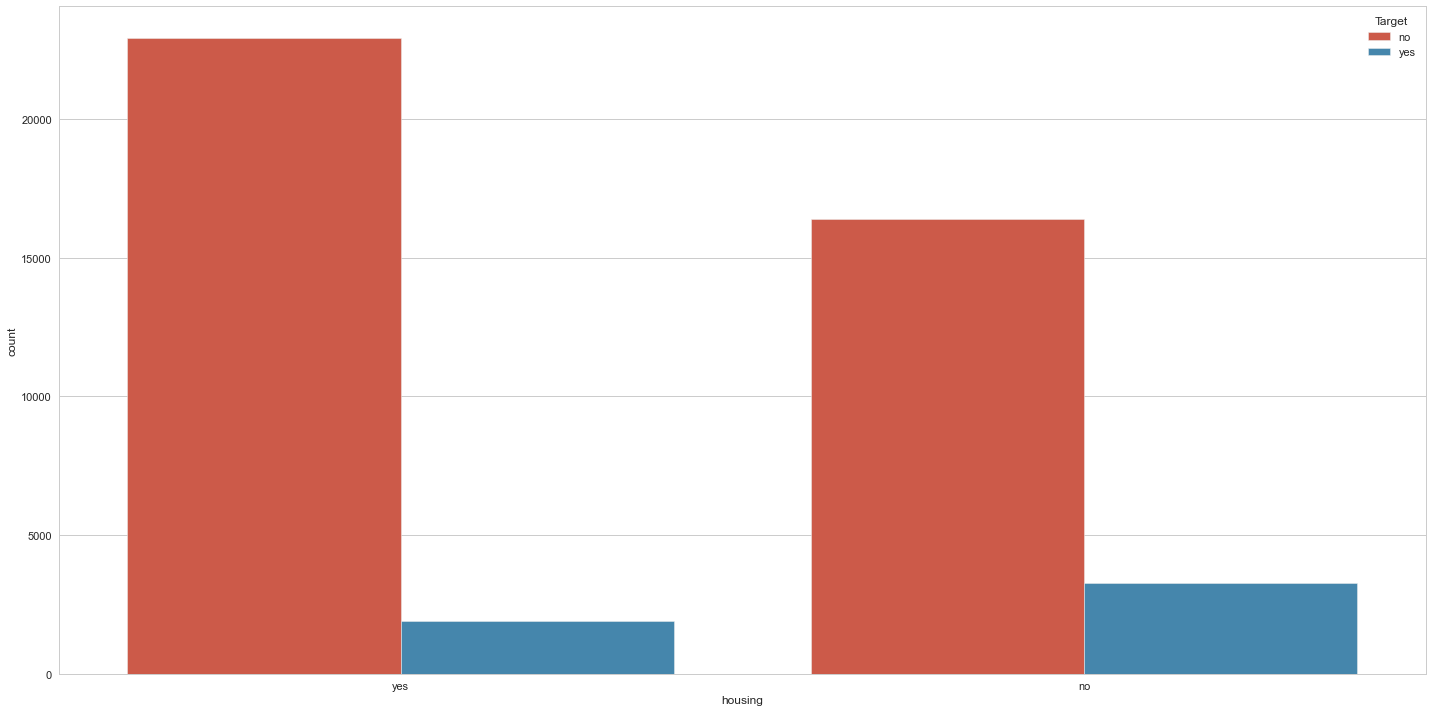

In [278]:
# Let us see the count of customers who subscribed to FD based on their Housing Loan Status



plt.figure(figsize=(20,10))
sns.countplot(newdf2.housing, hue = "Target", data=newdf2)
plt.tight_layout()

### Quick Insights:

Person who has past housing loan seems to avoid FD option as compared to those who doesn,t have Housinh loan

<Figure size 1440x720 with 0 Axes>

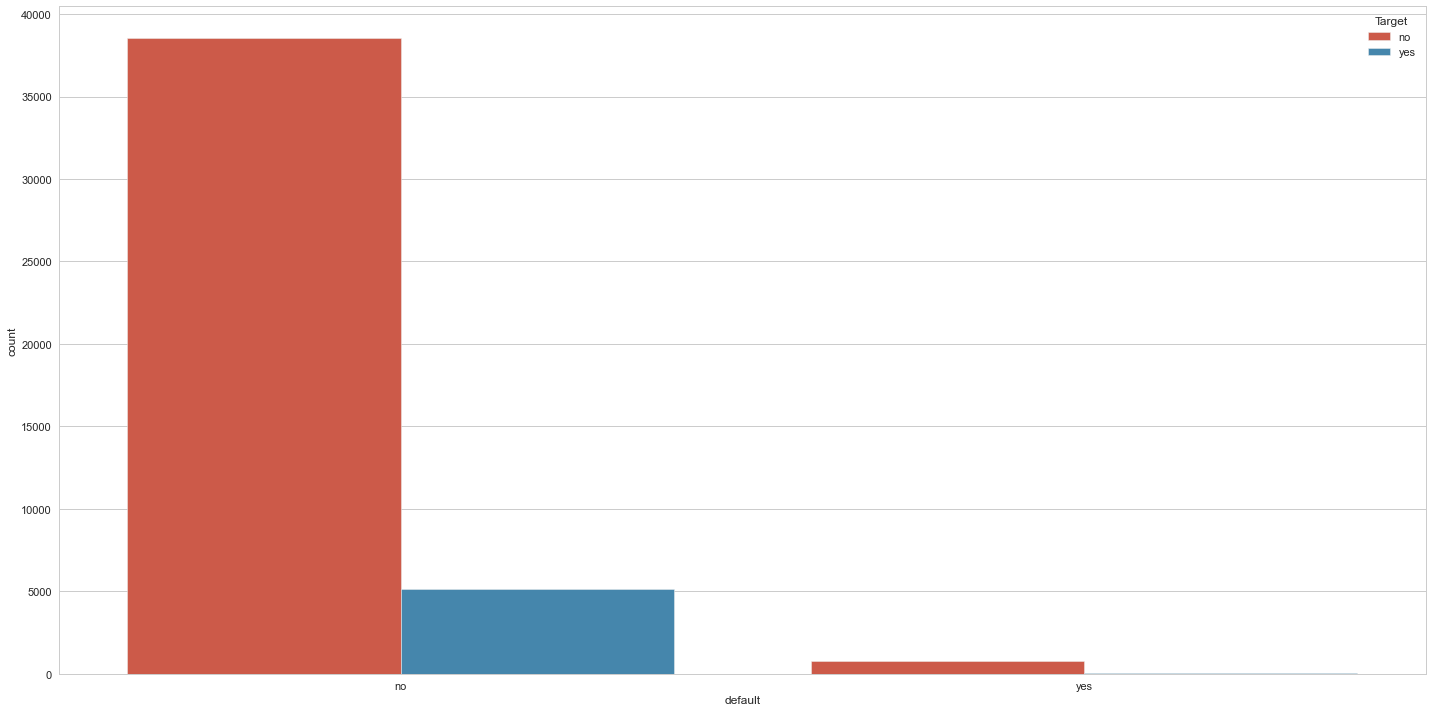

In [279]:
# Let us see the count of customers who subscribed to FD based on their Credit Default  Status



plt.figure(figsize=(20,10))
sns.countplot(newdf2.default, hue = "Target", data=newdf2)
plt.tight_layout()

### Quick Insights:

 - As expected customer with no default history are more liley to opt for FD

<Figure size 1440x720 with 0 Axes>

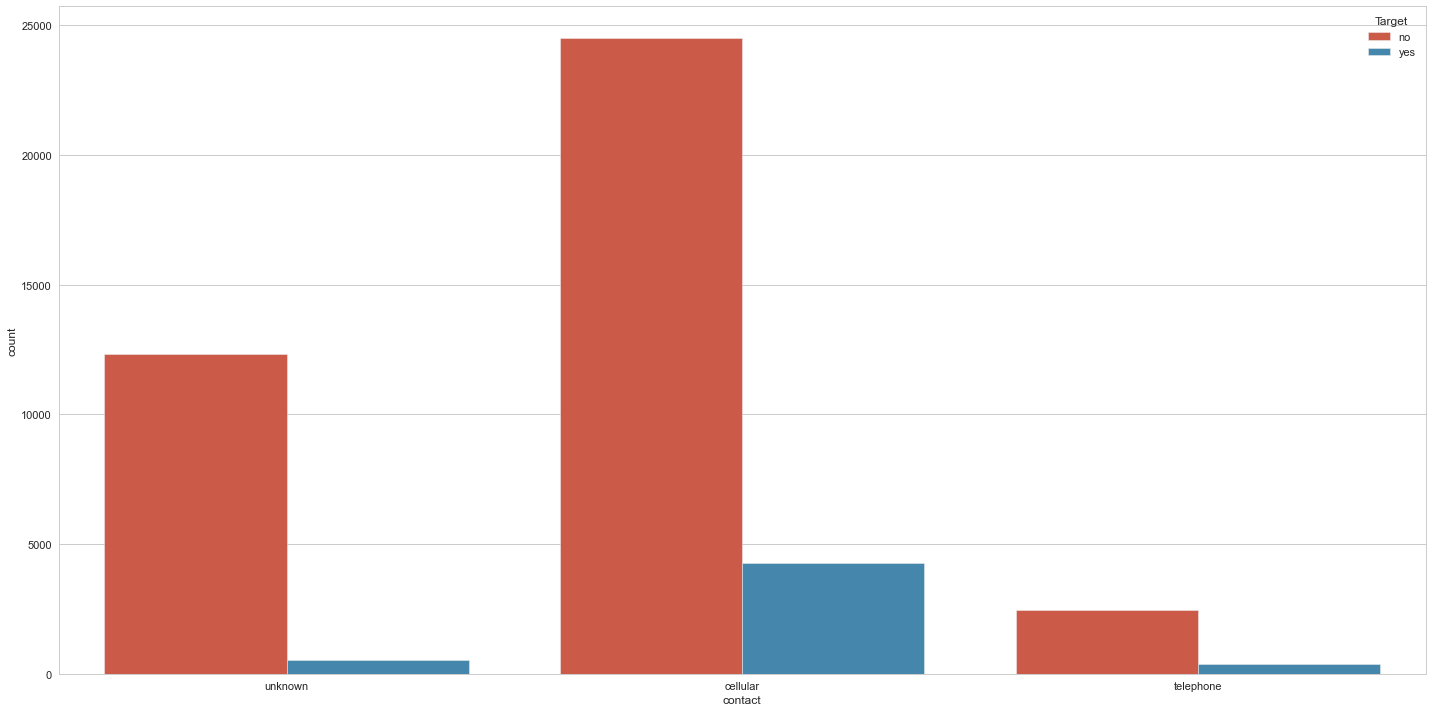

In [280]:
# Let us see the count of customers who subscribed to FD based on their mode of client communication


plt.figure(figsize=(20,10))
sns.countplot(newdf2.contact, hue = "Target", data=newdf2)
plt.tight_layout()

### Quick Insights:

- As expected cellualr as a mode of communication is leading the count and also the fd subscription rate

<Figure size 1440x720 with 0 Axes>

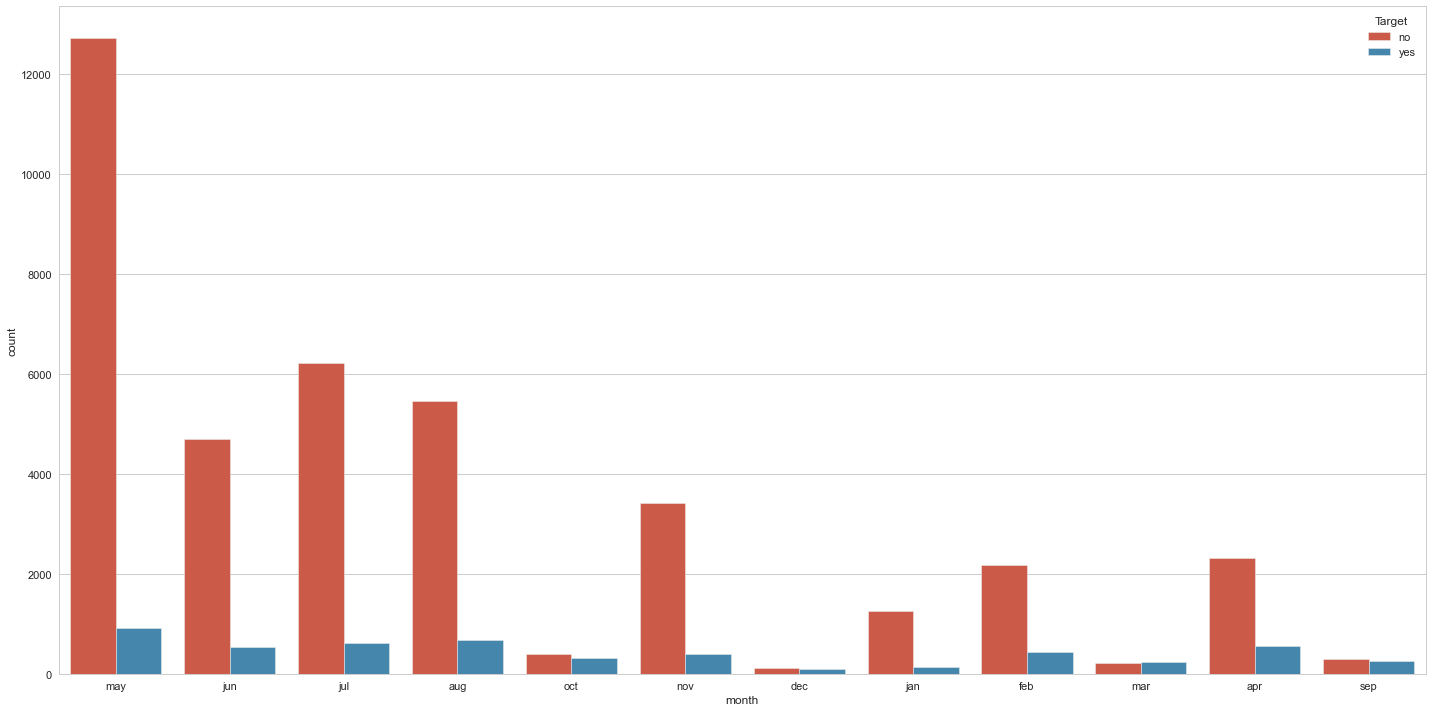

In [281]:
# Let us see the count of customers who subscribed to FD based on their last month of contact



plt.figure(figsize=(20,10))
sns.countplot(newdf2.month, hue = "Target", data=newdf2)
plt.tight_layout()

### Quick Insights:

- May month seems to be best time to conact customer for increasing the rate of FD subscription
- April, jun, july, aug also seems to be farring well but march, dec and jan doesn't look idel time to campaign

<Figure size 1440x720 with 0 Axes>

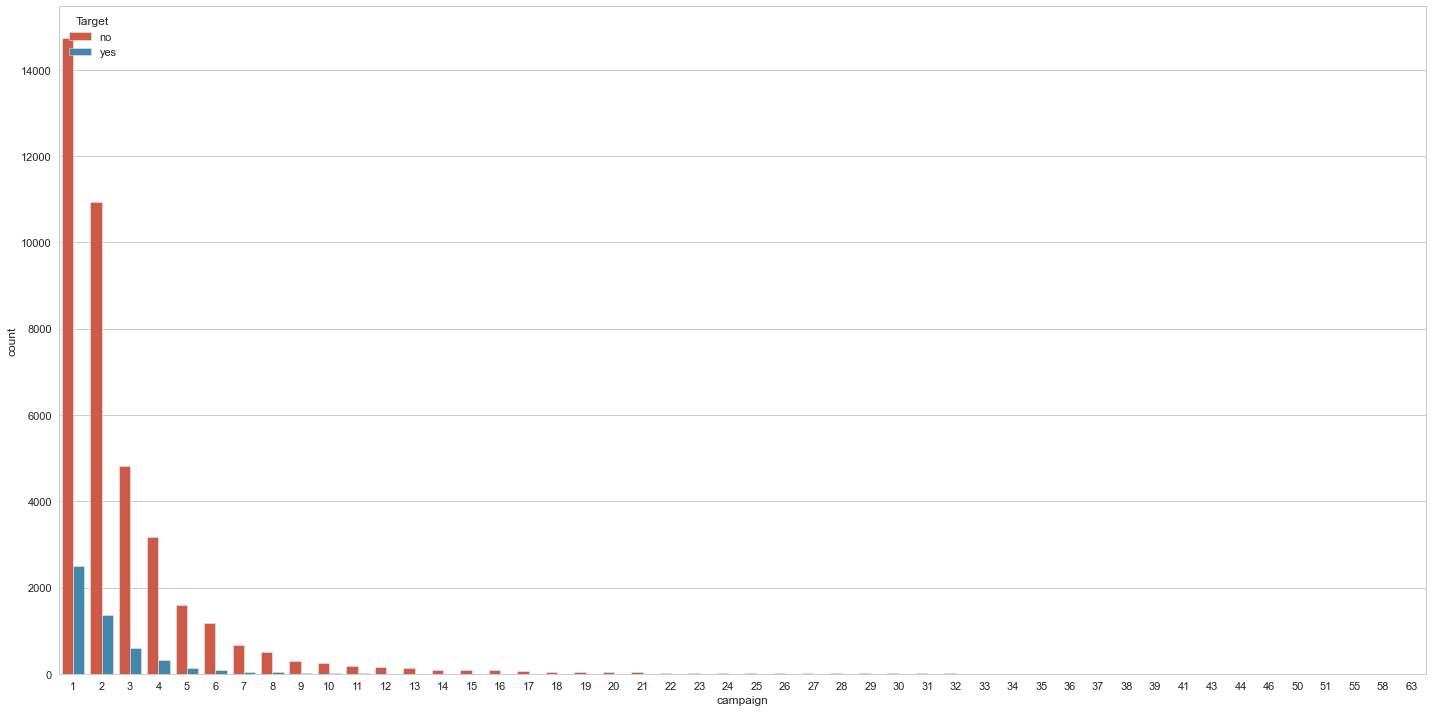

In [282]:
# Let us see the count of customers who subscribed to FD based on frequency of customr contact during the campaign


plt.figure(figsize=(20,10))
sns.countplot(newdf2.campaign, hue = "Target", data=newdf2)
plt.tight_layout()

### Quick Insigts:

- it is clearly visible that if the customer is contacted not more than 5 times they are more likely to opt for FD option.

## AGE & BALANCE REALTIONSHIP:

Lets see how the bank balance and age are related . We removed some outlier in our balance attribute let;s use that data to see the result

Text(0.5, 1.0, 'The Relationship between Age and Balance ')

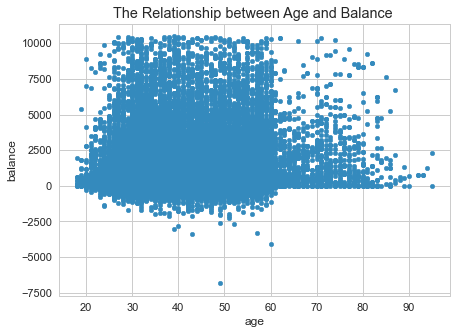

In [283]:
scatter_age_balance = newdf2.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

### Quick Insights:
There seems to no linear relationship between age & balance and Based on this scatter plot, there is no clear relationship between client’s age and balance level. Nevertheless, over the age of 60, clients tend to have a significantly lower balance, mostly under 5,000. This is due to the fact that most people retire after 60 and no longer have a reliable income source.

<Figure size 576x432 with 0 Axes>

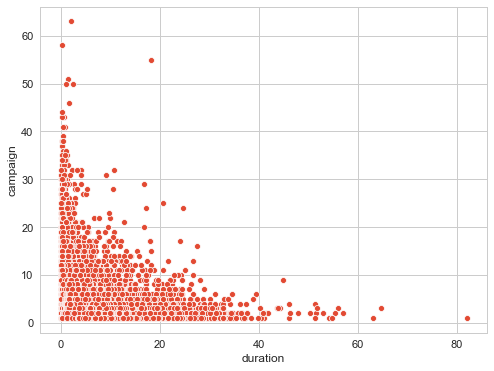

In [284]:
#2. Duration &  Campaign: 
plt.figure(figsize=(8,6))
sns.scatterplot(newdf2.duration, newdf2.campaign, palette= ['pink','lightblue'] )
plt.show()

### Quick Insights:

- we can see some kind trend here, when frequency of contacting the same client increases, call duration which happens with the client decreases, it's a kind of nrgative correlation.So it is advisable that the less is the frequency longer is the call duration which may result in better conversion rate. 
- If the contact frequency is between 5-10 call duration is more and it may result in better outcome as far as FD is concerned

## EDUCATION & BANK BALANCE
Let's see how education impacts the bank balance of the customer

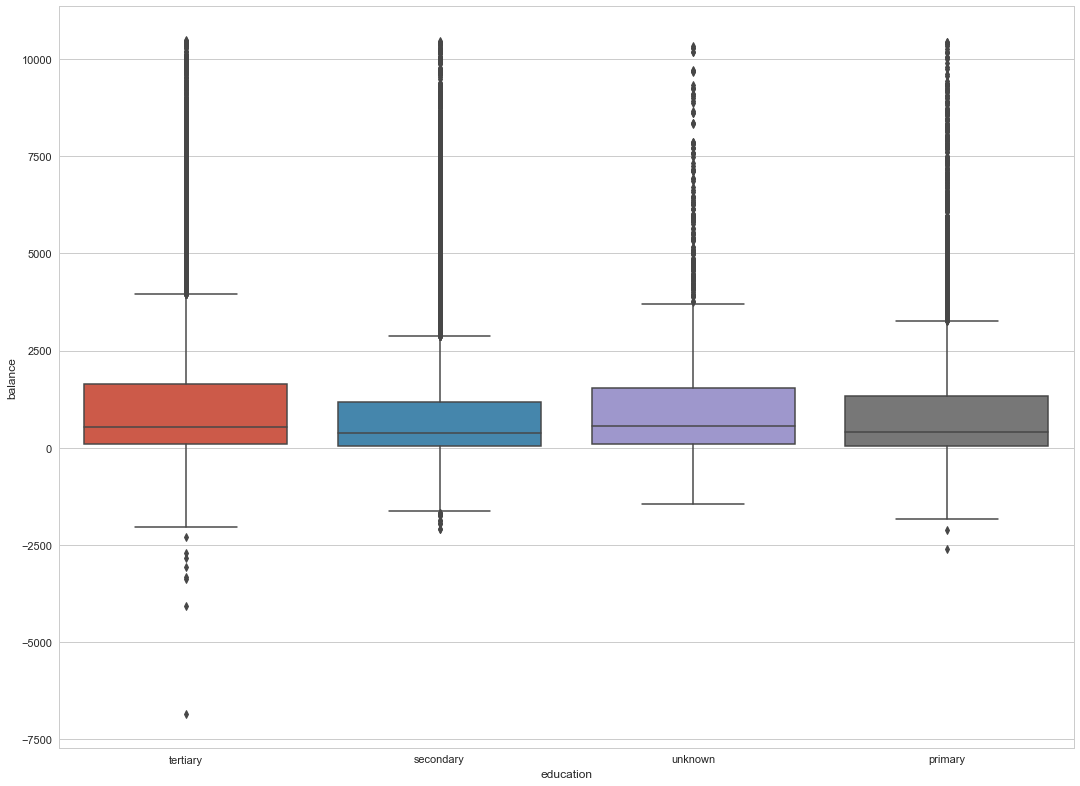

In [285]:
#imapct of job type, balance on fd suscription.


fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(221)
ax2= fig.add_subplot(221)
ax1 = sns.boxplot(newdf2['education'], newdf2['balance'], data=newdf2, ax =ax1)
#ax2 = sns.boxplot(newdf2['age'], newdf2['balance'], data=newdf2, ax =ax2)

In [286]:
#Before We measure the impacts of predcitor variable on our target let's have quick aggregation view using groupby
print(newdf2.groupby('Target').mean())
print(newdf2.groupby('Target').median())

         age  balance   day  duration  campaign  pdays  previous  age_group
Target                                                                     
no     40.79 1,038.46 15.89      3.69      2.85  36.50      0.50      36.23
yes    41.60 1,434.96 15.13      8.98      2.14  68.70      1.17      36.56
        age  balance  day  duration  campaign  pdays  previous  age_group
Target                                                                   
no       39      402   16      2.73         2     -1         0      30.00
yes      38      698   15      7.15         2     -1         0      30.00


### Quick Insights:

Avearge age of person who subscribed the FD is arond 41
Average bank balance lying with the customer with who subscribed to FD is 1435 Euro
It is observed the average call duration it took to convert cutomer to buy FD is around 9 minutes. Very less duration call seems to fail in converting the client to buy FD's

## How Age Of The Customers Is Related To Fd Subscription:

Target       no   yes
age_group            
20.00     82.55 17.45
30.00     89.48 10.52
40.00     90.96  9.04
50.00     90.65  9.35
60.00     66.49 33.51


Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Subscription Rate')

([<matplotlib.axis.XTick at 0x7fb012e1f910>,
 [Text(0, 0, '<30'),
  Text(0, 0, '30-39'),
  Text(0, 0, '40-49'),
  Text(0, 0, '50-59'),
  Text(0, 0, '60+')])

Text(0.5, 1.0, 'Subscription vs. Contact Rate by Age')

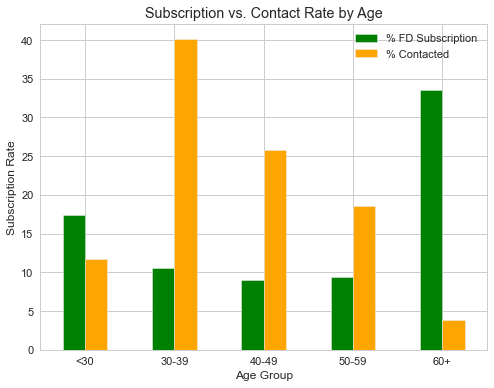

In [287]:
#Age & Target Variable
#Let's see of how age impacts the people's decision to take fd. 

#But First Let's Craete Age Grouping: 

lst = [newdf2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
    count_age_response_pct = pd.crosstab(newdf2['Target'],newdf2['age_group']).apply(lambda x: x/x.sum() * 100)
    
count_age_response_pct = count_age_response_pct.transpose() 
print(count_age_response_pct)

age = pd.DataFrame(newdf2['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% FD Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% FD Subscription','% Contacted']].plot(kind = 'bar', figsize=(8,6), color = ('green','orange'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()


#ax = sns.boxplot(dataframe['Target'], newdf2['age_group'], data=newdf2)
    
    
    

### Quick Insights

  - Orange Bar plot indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest. The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students. However, red vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.

- Some people beyoind 70 age has also been targeted, specially person between 80-90 ysr of age, which i feel is not a great right move cosidering the 

## FD subscription rate based on contacted customers balance level

Text(0.5, 1.0, 'Subscription vs Contact Rate by Balance Level')

Text(0, 0.5, 'Subscription Rate')

Text(0.5, 0, 'Balance Category')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

Text(-0.125, 7.896551724137931, '6.9%')

Text(0.875, 11.896995708154506, '10.9%')

Text(1.875, 16.33174953334465, '15.3%')

Text(2.875, 16.230842455973345, '15.2%')

Target             no   yes
balance_group              
average balance 84.67 15.33
high balance    84.77 15.23
low balance     89.10 10.90
no balance      93.10  6.90


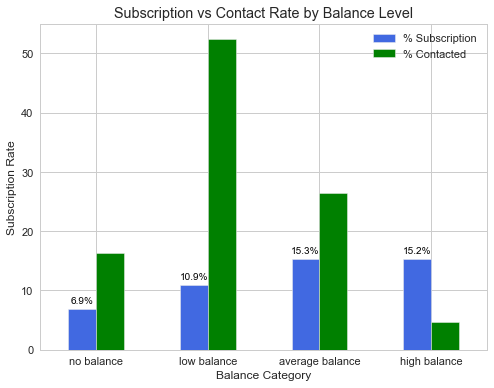

In [288]:
#Let's Seggregate The Balance  & Perform Transaformation To Have Better Insights

lst = [newdf2]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
    
count_balance_response_pct = pd.crosstab(newdf2['Target'],newdf2['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(newdf2['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','green'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches, bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1,  label+'%',   ha = 'center', color = 'black')

print(count_balance_response_pct)

#ax = sns.boxplot(newdf2['Target'], newdf2['balance'], data=newdf2)

### Quick Insights 

For FD subscription rate against balance level:

To identify the trend more clearly, we have categorized customers into four groups based on their levels of balance:

No Balance: clients with a negative balance. Low Balance: clients with a balance between 0 and 1000 euros Average Balance: clients with a balance between 1000 and 5000 euros. High Balance: clients with a balance greater than 5000 euros.

Our Box Plot shows a positive correlation between clients’ balance levels and fd subscription rate. Clients with negative balances only returned a fd subscription rate of 6.9% while clients with average or high balances had significantly higher FD subscription rates, nearing to 15%.

We have seen above that more than 50% of customers contacted had the low balance level.So bank has to taje care in the future to target cusytomers with high bank balance level. People with negative balance are less likely to subscribe to FD.

## FD subscription rate by job

Text(0.5, 1.0, 'FD Subscription Rate by Job')

Text(0.5, 0, 'FD Subscription Rate')

Text(0, 0.5, 'Job Category')

Text(8.087239556338758, -0.25, '7.3%')

Text(8.995592286501378, 0.75, '8.2%')

Text(9.621104699093157, 1.75, '8.8%')

Text(9.692658105161135, 2.75, '8.9%')

Text(11.666078588612672, 3.75, '10.9%')

Text(12.187900355871886, 4.75, '11.4%')

Text(12.511125569290826, 5.75, '11.7%')

Text(12.916474496775455, 6.75, '12.1%')

Text(14.473447188077888, 7.75, '13.7%')

Text(16.568930523028886, 8.75, '15.8%')

Text(23.50465852555405, 9.75, '22.7%')

Text(29.55675675675676, 10.75, '28.8%')

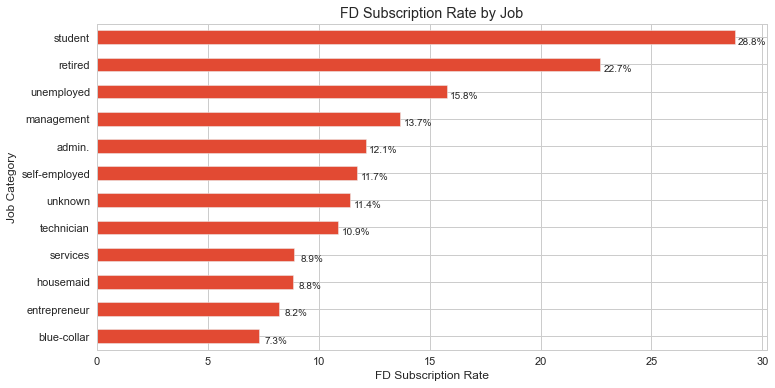

In [289]:
#First Let's Transform The Data, So that we can plot them meaningfully

count_job_target_pct = pd.crosstab(newdf2['Target'],newdf2['job']).apply(lambda x: x/x.sum() * 100)
count_job_target_pct = count_job_target_pct.transpose()

plot_job = count_job_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Job')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches, count_job_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

### Quick Insights

For FD subscription rate by job¶¶

Here it is clearly laid down in our bar chart that students and retired clients account for more than 50% of FD subscription, which is consistent with the previous finding of higher FD subscription rates among the younger and older.

## FD Subscription Rate Based on Marital Status :

Text(0.5, 1.0, 'FD Subscription Rate by Marital Status')

Text(0.5, 0, 'FD Subscription Rate')

Text(0, 0.5, 'Marital Status')

Text(10.88268173145273, -0.25, '10.1%')

Text(12.63443451224252, 0.75, '11.8%')

Text(15.604225240250974, 1.75, '14.8%')

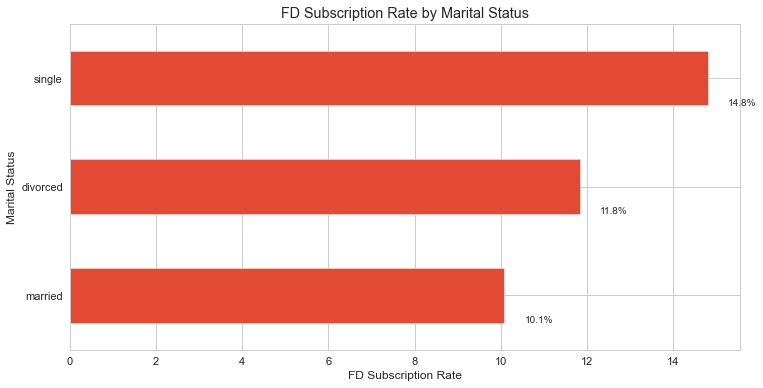

In [290]:
count_marital_target_pct = pd.crosstab(newdf2['Target'],newdf2['marital']).apply(lambda x: x/x.sum() * 100)
count_marital_target_pct = count_marital_target_pct.transpose()

plot_marital = count_marital_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Marital Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Marital Status')

# Label each bar
for rec, label in zip(plot_marital.patches, count_marital_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_marital.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

### Quick Insights : 

Marial Stataus Impact On FD Subscription:

As we saw above young that young people are more subsciber of FD, here also we can say that young unmarried person are leading the way with 15 % FD subscription rate,out of total subscribed fd customer.
Divorce seems to unexpectedly ranking higher thab married customer.
Married one's are less oriented towards FD option.

## FD Subscription Rate Based on Education Level:

Text(0.5, 1.0, 'FD Subscription Rate by Education Level')

Text(0.5, 0, 'FD Subscription Rate')

Text(0, 0.5, 'Education Leve;')

Text(9.357096488639717, -0.25, '8.6%')

Text(11.32929891873038, 0.75, '10.5%')

Text(14.191877058177827, 1.75, '13.4%')

Text(15.71879350348028, 2.75, '14.9%')

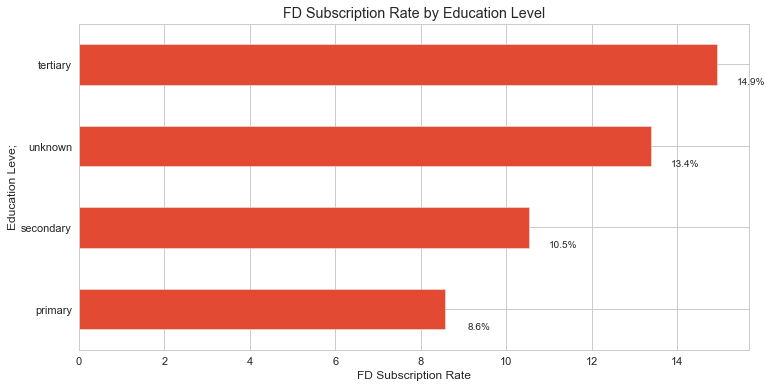

In [291]:
count_education_target_pct = pd.crosstab(newdf2['Target'],newdf2['education']).apply(lambda x: x/x.sum() * 100)
count_education_target_pct= count_education_target_pct.transpose()

plot_education = count_education_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Education Level')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Education Leve;')

# Label each bar
for rec, label in zip(plot_education.patches, count_education_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

### Quick Insights: 

People education level distribution who opted for FD

People with higher level of education has higher subscription rate . Here 15 % people with higher education level opted for FD out of all FD subsciber. 14 % user who education level is not capture as wanted acount for good 13 % out of total FD subscribers


## FD Subscription Rate Based On Personal Loan Status Of The Customers

Text(0.5, 1.0, 'FD Subscription Rate by Personal Loan Status')

Text(0.5, 0, 'FD Subscription Rate')

Text(0, 0.5, 'Personal Laon Status')

Text(7.475919500346981, -0.25, '6.7%')

Text(13.37883578003811, 0.75, '12.6%')

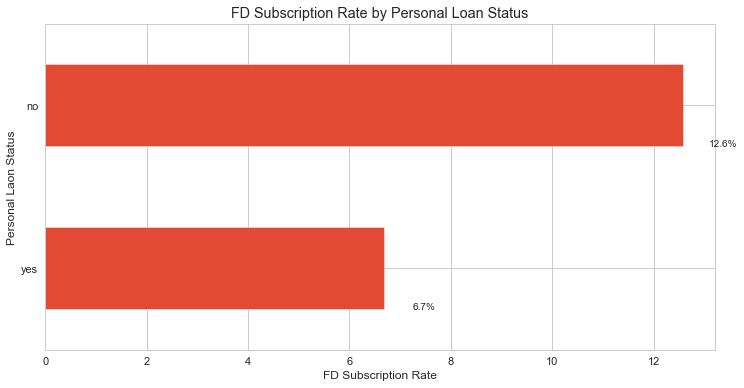

In [292]:
count_loan_target_pct = pd.crosstab(newdf2['Target'],newdf2['loan']).apply(lambda x: x/x.sum() * 100)
count_loan_target_pct= count_loan_target_pct.transpose()

plot_loan = count_loan_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Personal Loan Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Personal Laon Status')

# Label each bar
for rec, label in zip(plot_loan.patches, count_loan_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_loan.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


### Quick insights on FD Subscription Rate 

Based On Personal Loan Status Of The Customers:

 - Person with personal loan on their head seems to less interested in fd , as you can see only 6.7 % of them availed FD option
 - As expected people with no loan on their head a more likely to avail FD options. As it can be seen here that around 12.6 % customer with no pl opted for FD 

## Impact Of Cutsomers Credit Default On FD Subscription:

In [293]:
x: x/x.sum() * 100)
count_creditdefault_target_pct= count_creditdefault_target_pct.transpose()

plot_credit_default = count_creditdefault_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Credit Default Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Credit Default Status')

# Label each bar
for rec, label in zip(plot_credit_default.patches, count_creditdefault_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_credit_default.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

SyntaxError: invalid syntax (<ipython-input-293-f3cd4c7dbc60>, line 1)

### Quick Insights On How Credit Default Status Is Related To FD Subscription:

- We can see that person with no default credit stastus has higher FD rate subscription which is as per expectations. They account for around 12 %.
- Person with credit default history accounts for 6.4 % FD subscription. 

## Let's See How People With Housing loan responded to FD subscription camapign

Text(0.5, 1.0, 'FD Subscription Rate by Housing Loan Status')

Text(0.5, 0, 'FD Subscription Rate')

Text(0, 0.5, 'Housing Loan Status')

Text(8.499960206923996, -0.25, '7.7%')

Text(17.50235546038544, 0.75, '16.7%')

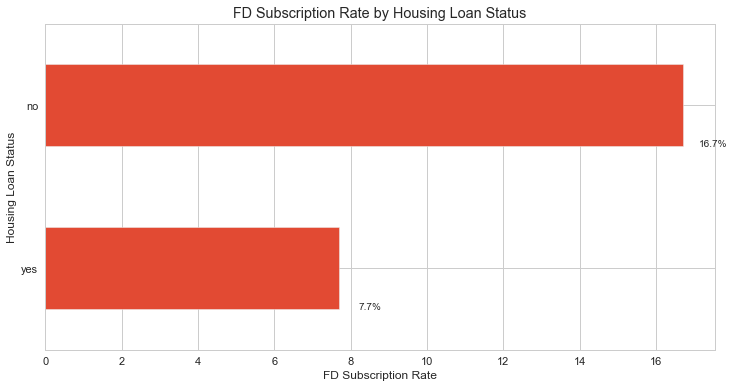

In [294]:
count_housingloan_target_pct = pd.crosstab(dataframe['Target'],dataframe['housing']).apply(lambda x: x/x.sum() * 100)
count_housingloan_target_pct= count_housingloan_target_pct.transpose()

plot_housing_loan = count_housingloan_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Housing Loan Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Housing Loan Status')

# Label each bar
for rec, label in zip(plot_housing_loan.patches, count_housingloan_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_housing_loan.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

    
#yhdf = newdf2[newdf2['housing']== "yes"]

### Quick Insights:

- customers with houing loan on their head are less likley to avail FD, here only 8 % of the customers with already having  housing loan availed fd option. This is as expected
- around 17 % of the cutomers with no housing loan opted for FD instrument. 

Text(0.5, 1.0, 'FD Subscription Rate by Mode Of Contact')

Text(0.5, 0, 'FD Subscription Rate')

Text(0, 0.5, 'Mode Of Customer Contact')

Text(4.870660522273425, -0.25, '4.1%')

Text(14.220509291121818, 0.75, '13.4%')

Text(15.718900460986854, 1.75, '14.9%')

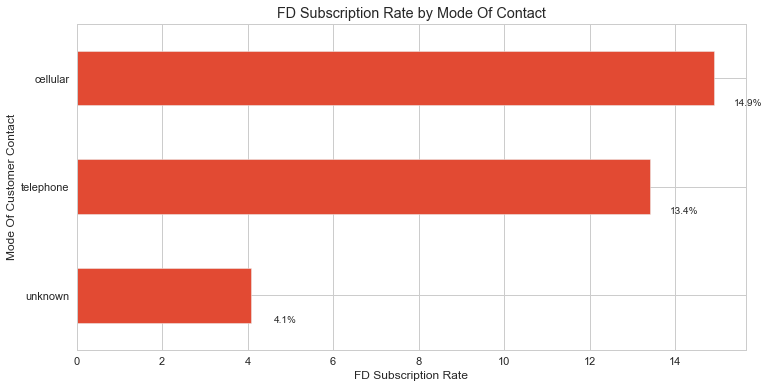

In [295]:
# #Let's See How Mode Of Communication Impacts FD 

count_modeofcomm_target_pct = pd.crosstab(dataframe['Target'],dataframe['contact']).apply(lambda x: x/x.sum() * 100)
count_modeofcomm_target_pct= count_modeofcomm_target_pct.transpose()

plot_comm_mode = count_modeofcomm_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Mode Of Contact')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Mode Of Customer Contact')

# Label each bar
for rec, label in zip(plot_comm_mode.patches, count_modeofcomm_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_comm_mode.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

    
#yhdf = newdf2[newdf2['housing']== "yes"]

### Quick Insight :

  - Out of total customer who opted for fd , 15 % of them were converted usng cell phone as mode of contact. which seems to normal and expected
  - Telephine seems to be quite close to mobile and accounts for 13.4 % of FD conversion.  

## Impact Of Call Duration On FD Conversion:

<Figure size 2160x1080 with 0 Axes>

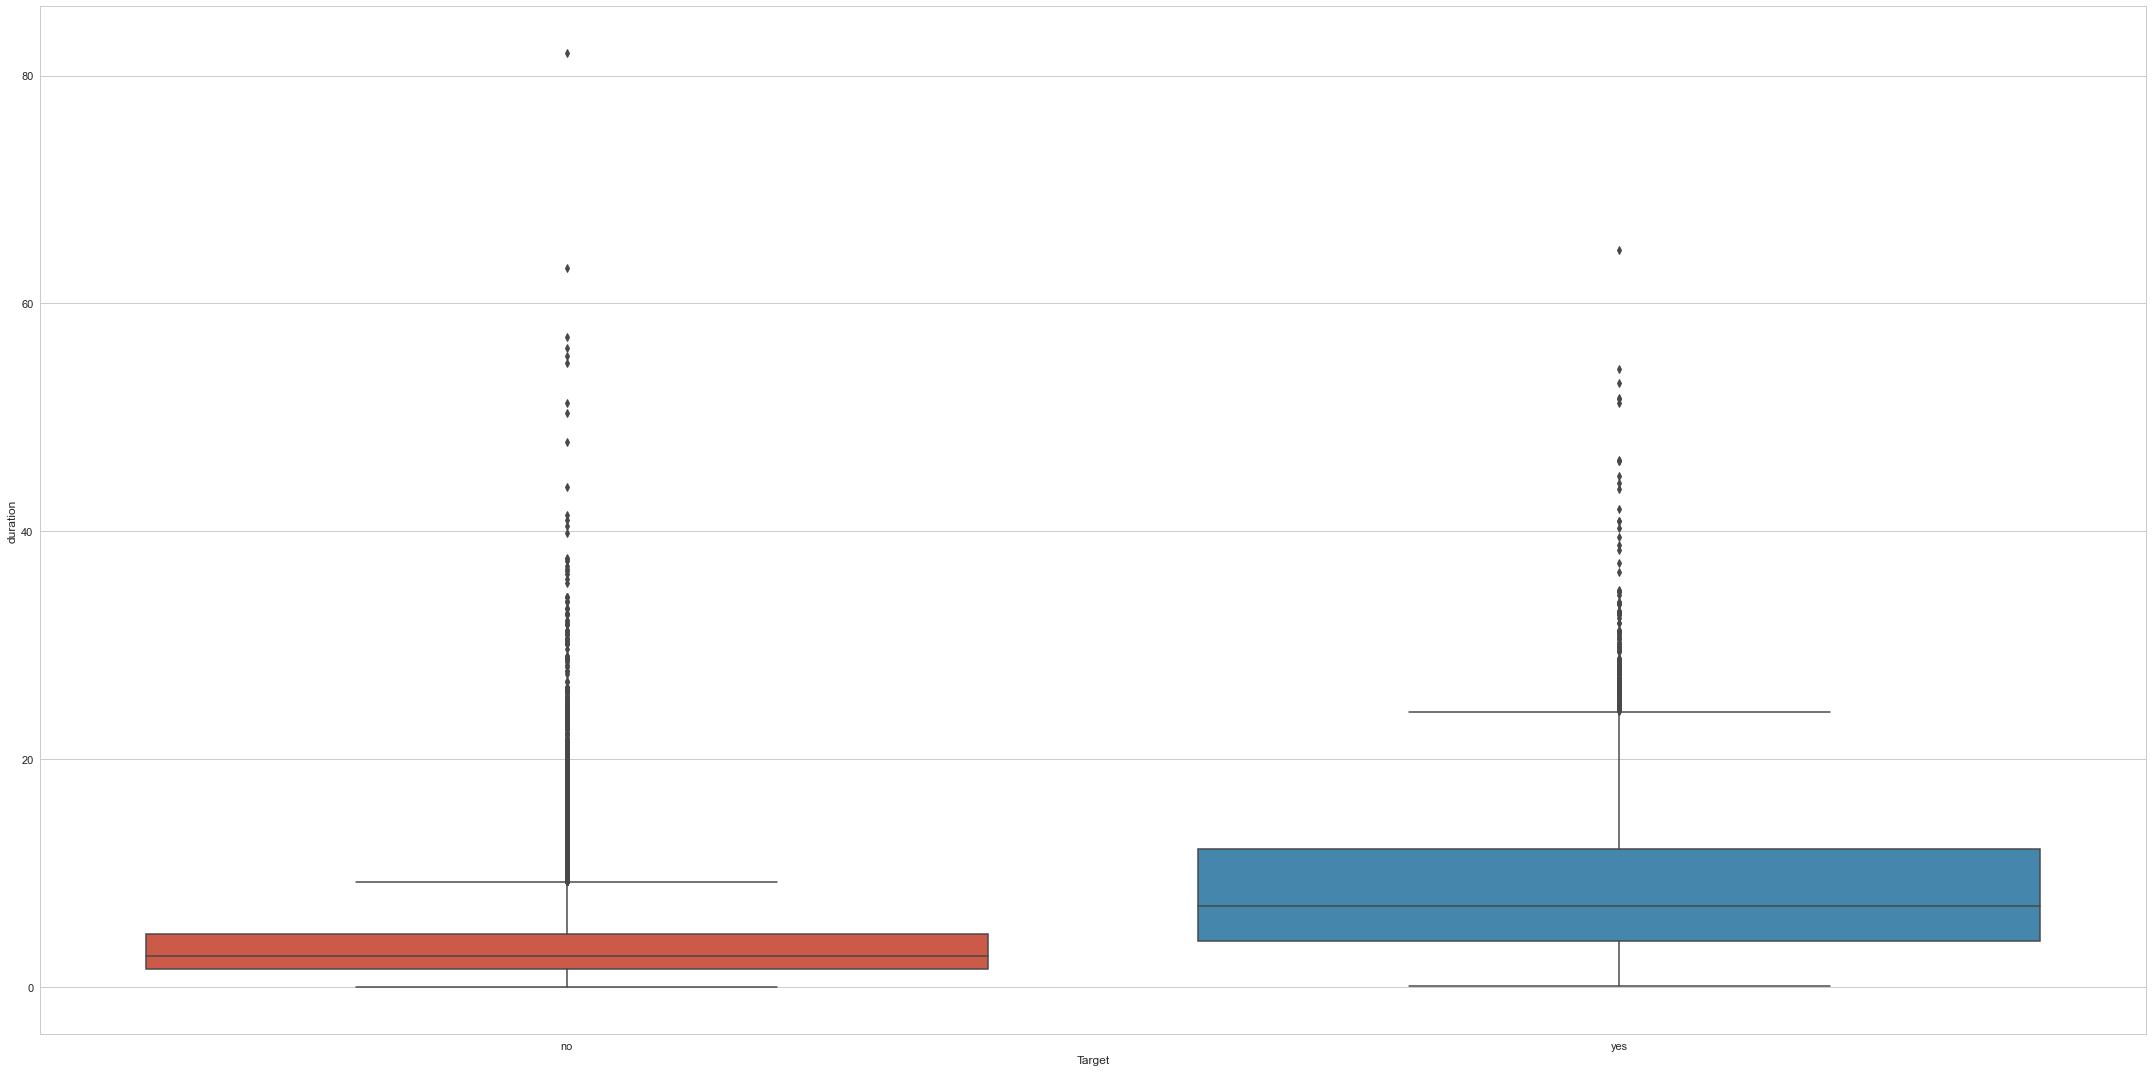

In [296]:
plt.figure(figsize=(30,15))
ax = sns.boxplot(newdf2['Target'], newdf2['duration'], data=dataframe)

plt.tight_layout()


### Quick Insight:

- If the call duration was less than 3-5 minutes customers were less likely to subscribe to FD option
- But If the call duration lasted between 5-10 minutes , customers were more likely to take FD

## FD subscription rate based on last contact month of year

Target    no   yes
month             
apr    80.32 19.68
aug    88.99 11.01
dec    53.27 46.73
feb    83.35 16.65
jan    89.88 10.12
jul    90.91  9.09
jun    89.78 10.22
mar    48.01 51.99
may    93.28  6.72
nov    89.85 10.15
oct    56.23 43.77
sep    53.54 46.46


Text(0.5, 1.0, 'FD Subscription Rate by Month Of Contact')

Text(0.5, 0, 'FD Subscription Rate')

Text(0, 0.5, 'Month Of Last Customer Contact')

Text(7.519453726572714, -0.25, '6.7%')

Text(9.89354604786077, 0.75, '9.1%')

Text(10.921168923734854, 1.75, '10.1%')

Text(10.951133501259447, 2.75, '10.2%')

Text(11.022804718217563, 3.75, '10.2%')

Text(11.813286377461182, 4.75, '11.0%')

Text(17.44779161947905, 5.75, '16.6%')

Text(20.479399727148706, 6.75, '19.7%')

Text(44.56693766937669, 7.75, '43.8%')

Text(47.259412780656305, 8.75, '46.5%')

Text(47.52897196261682, 9.75, '46.7%')

Text(52.79161425576519, 10.75, '52.0%')

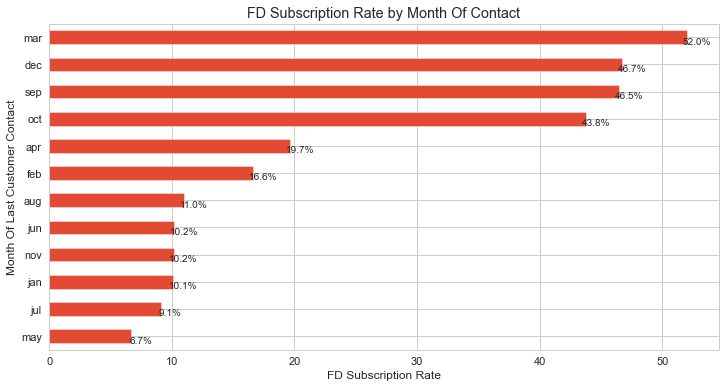

In [297]:
count_monthofcontact_target_pct = pd.crosstab(dataframe['Target'],dataframe['month']).apply(lambda x: x/x.sum() * 100)
count_monthofcontact_target_pct= count_monthofcontact_target_pct.transpose()
print(count_monthofcontact_target_pct)

plot_mnth_contact = count_monthofcontact_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Month Of Contact')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Month Of Last Customer Contact')

# Label each bar
for rec, label in zip(plot_mnth_contact.patches, count_monthofcontact_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_mnth_contact.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


### Quick Insight On Impact of customer contact monthwise on fd subscription rate:

-The highest fd subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.Clearly, this gives some insights to the bank when to plan their campaign. Having said that they should also count external factor related to weather etc while planning their marketing camapign.

## How Marital Status Impacts Balance Of The Customer

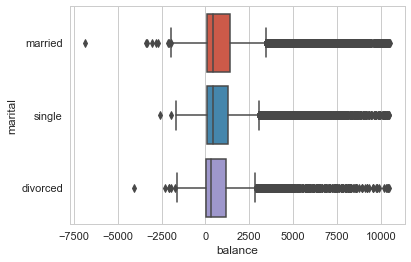

In [298]:
ax = sns.boxplot(newdf2['balance'], newdf2['marital'], data=newdf2)


### Quick Insights:

 - As seen form the box plot above married person have better financial status as compared to single & divorced person. 
 -  Divorced Person seems to borke, which is expected due to financail pressure one has to bear.

## Education Impact On Cutsomer Bank Balance:

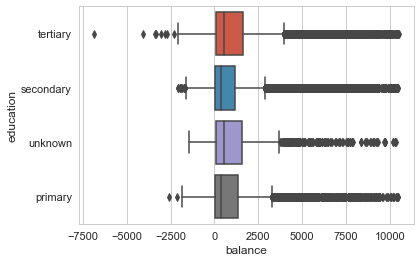

In [299]:
ax = sns.boxplot(newdf2['balance'], newdf2['education'], data=newdf2)


### Quick Insight:

   - The level of education also has a significant impact on the amount of balance a prospect has. As shown above the person with higher education has higher bank balance as compared to promary level educated person.
   - Unknown category whose info is not clear seems to be having more bank balance than primary, this needs to be taken care by bank executive to find the actual education level.
   - There is one interesting observation against people with secondary level eduaction , they seems to have low balance which can be due to the expense they need to plan for higher eduaction. 
   - Also person with higher education level also have more no. of person with negative bank balance with some outlier. 

## Impact Of Previous Personal Loan On Bank Balance

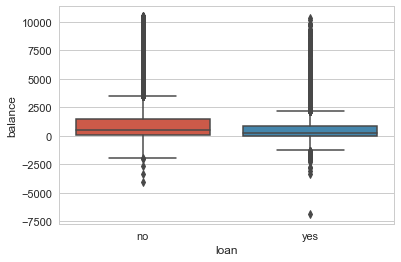

In [300]:
ax = sns.boxplot(newdf2['loan'], newdf2['balance'], data=newdf2)


### Insights:

  - It is clear that person with previous PL seems to be struggling with bank balance as expected

## Impact Of Housing Loan On Customer Bank Balance

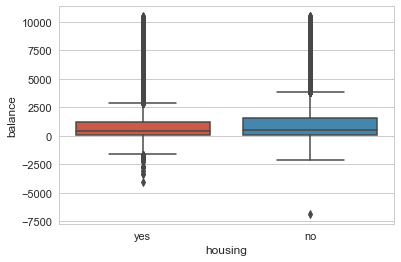

In [301]:
ax = sns.boxplot(newdf2['housing'], newdf2['balance'], data=newdf2)


### Quick Insights:

it is clear that person with previous housing loan has low bank balance

## Let's see default status of the customer impacts the bank balance

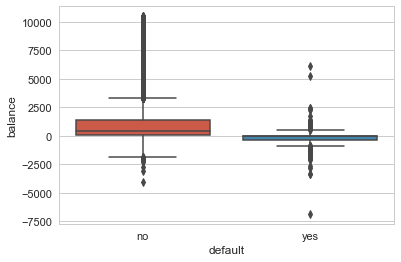

In [302]:
ax = sns.boxplot(newdf2['default'], newdf2['balance'], data=newdf2)

### Quick Insight:

it is visible that person with default credit history has borken bank balance.

# Multivariate Analysis:

## Let's Visualize the relationship between 'duration' & 'campaign': with Target(FD) result

(0.0, 65.0, 0.0, 65.0)

Text(25.746884920634926, 0.5, 'Number of Calls')

Text(0.5, 20.80000000000002, 'Duration of Calls (Minutes)')

Text(0.5, 1.0, 'The Relationship between the Number and Duration of Calls (with Response Result)')

Text(35, 13, 'Higher subscription rate when calls <5')

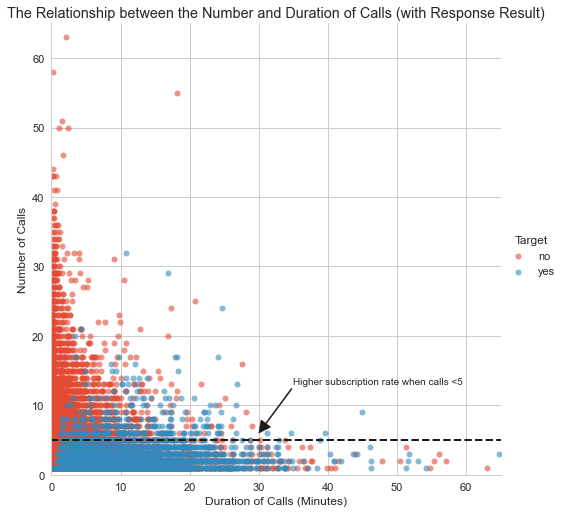

In [303]:
campaign_call_duration = sns.lmplot(x='duration', y='campaign',data = newdf2,hue = 'Target',fit_reg = False, scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()


### Quick Insights:

- Here we can see that customer who said no, were contacted more than 10 times and had a small call duration . while customers who subscribed to FD were approached fewer times(less than 10 times ) 
and had longer call duration. It is visible that after five campaign calls, clients are more likely to reject the term deposit unless the call duration is high.

- Most of the customers who subscribed to fd were approached by less than 10 times.

So it is advisable that the bank should avoid calling a client for more than five times, as it seems that customers don't like that move.

## Let's understand how the subscription rate get's affected by customer's credit default status & bank balance

[Text(0, 0, 'no'), Text(1, 0, 'yes')]

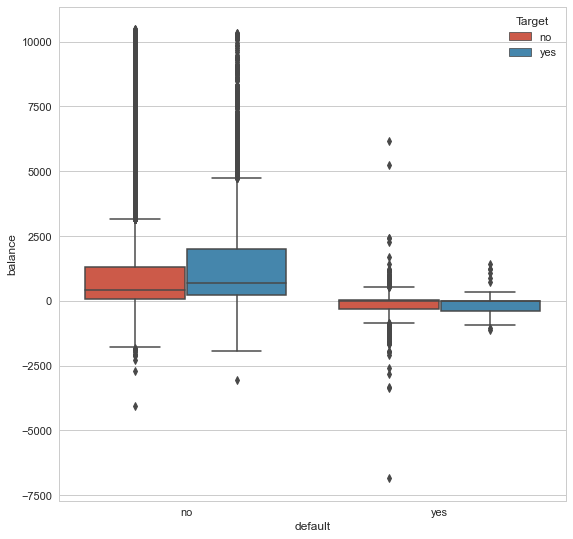

In [304]:
 ax.set_xticklabels(df5["default"].unique(), rotation=45, rotation_mode="anchor")


# plt.style.use('dark_background')

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['default'], newdf2['balance'], hue = "Target", data=newdf2)

### Quick insights:
There is clear insight that customers who has not defaulted, have higher average bank balance and more likely to subscribe to FD option
The customer with dafult stataus have negative to very low bank balance and are very less likely to avail FD.

## Let's understand how the subscription rate get's affected by customer's education level & bank balance¶

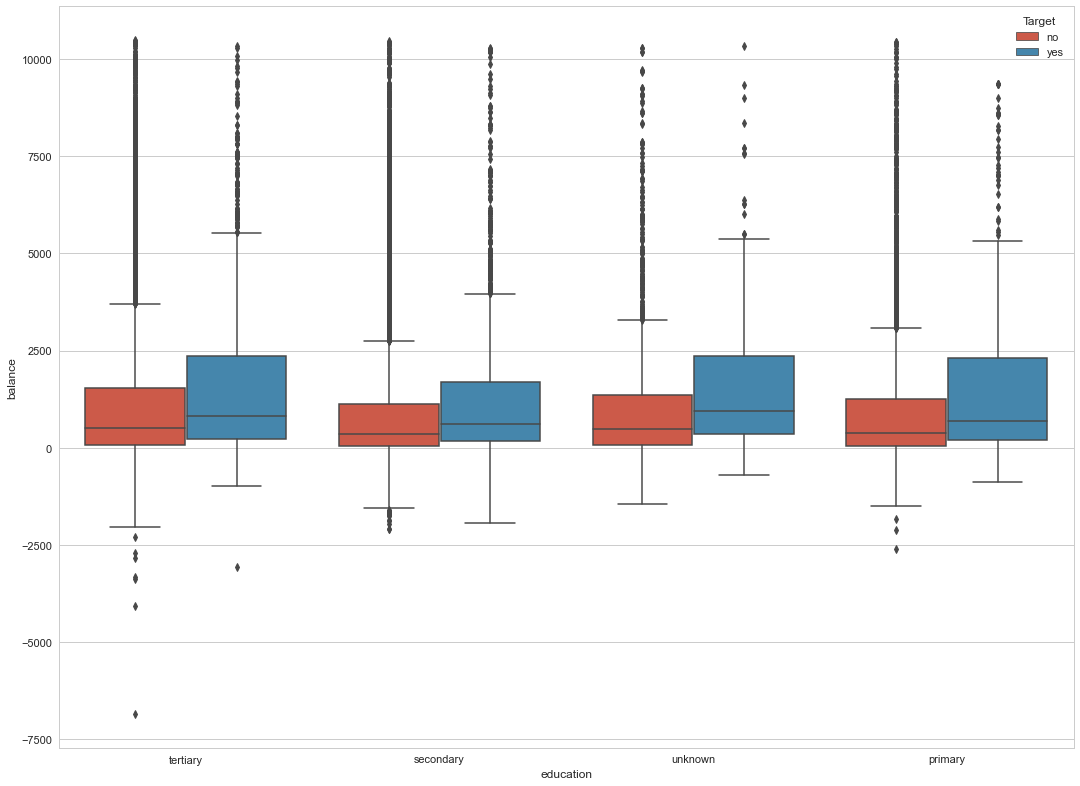

In [305]:
#imapct of job type, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(221)
ax1 = sns.boxplot(newdf2['education'], newdf2['balance'], hue = "Target", data=newdf2)

 ### Quick Insights:

Customers with higher education tends to have higher bank balance and more fd subscription rate, they also have higher number of customers who refused fd option.
customers with unknown education level aslo seems to have higher fd subscription and ranks second to tertiary.
Customers with primary level eduaction also tends to have high fd subscription rate clos to tertiary
So there seems to be no clear trend here i terms of how education impacts fd subscription decision.

## Let's understand how the subscription rate get's affected by customer's Job Type & bank balance¶

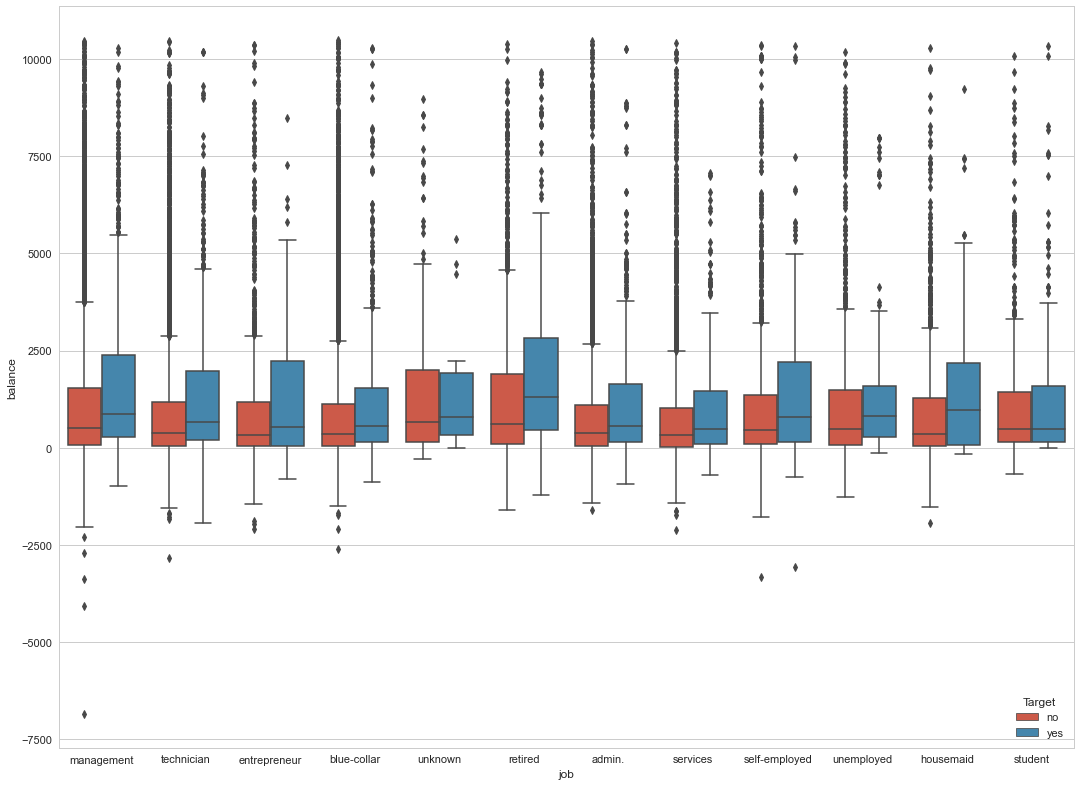

In [306]:

#imapct of education, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['job'], newdf2['balance'], hue = "Target", data=newdf2)

### Quick Insights:

 - Customers who are retired seems to have more bank balance and more FD subscription rate.
 -  Management professional seems to have less negative bank balance as compared to retired and also have second highest bank balance and fd  subscription rate
 - student doesn't seems to have negative bank balance ans so is the case with housemaid who seems to have very little negatuve bank balance . 

## Let's understand how the subscription rate get's affected by customer's marital status & bank balance¶

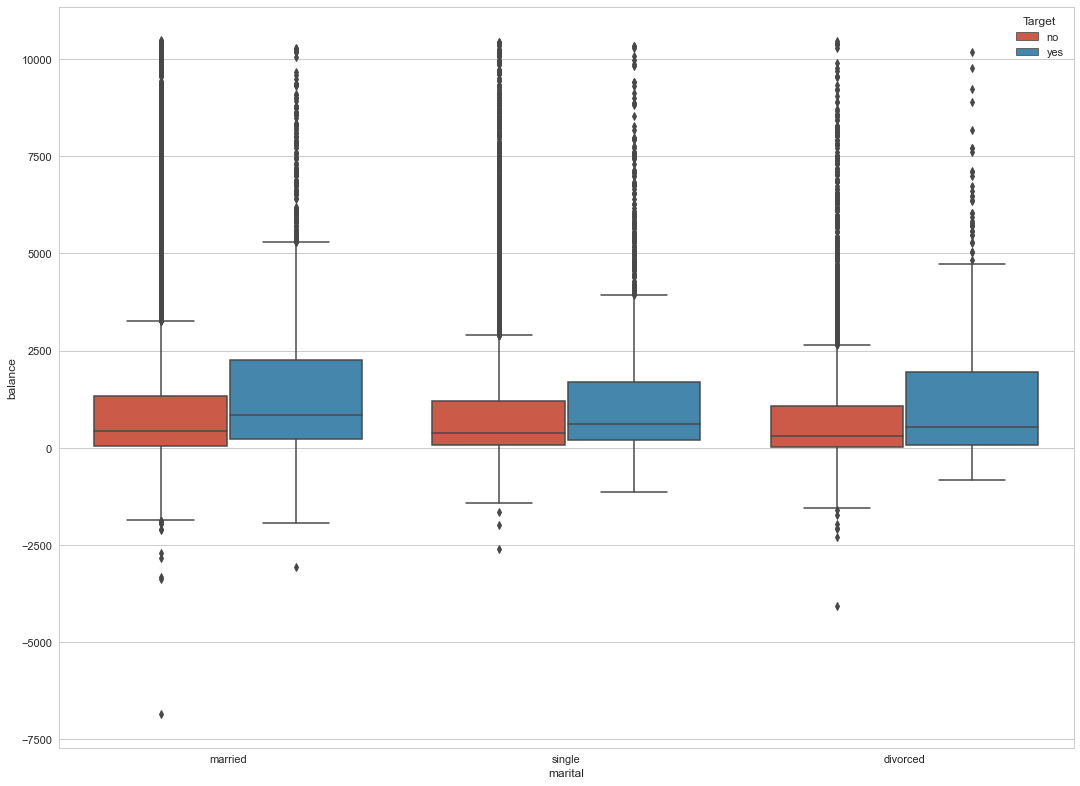

In [307]:
#imapct of marital status, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['marital'], newdf2['balance'], hue = "Target", data=newdf2)

### Insights:

married customers seems to have higher bank balance and so are more likely to subscriobe to FD.

## Let's understand how the subscription rate get's affected by customer's Personal loan status & bank balance¶

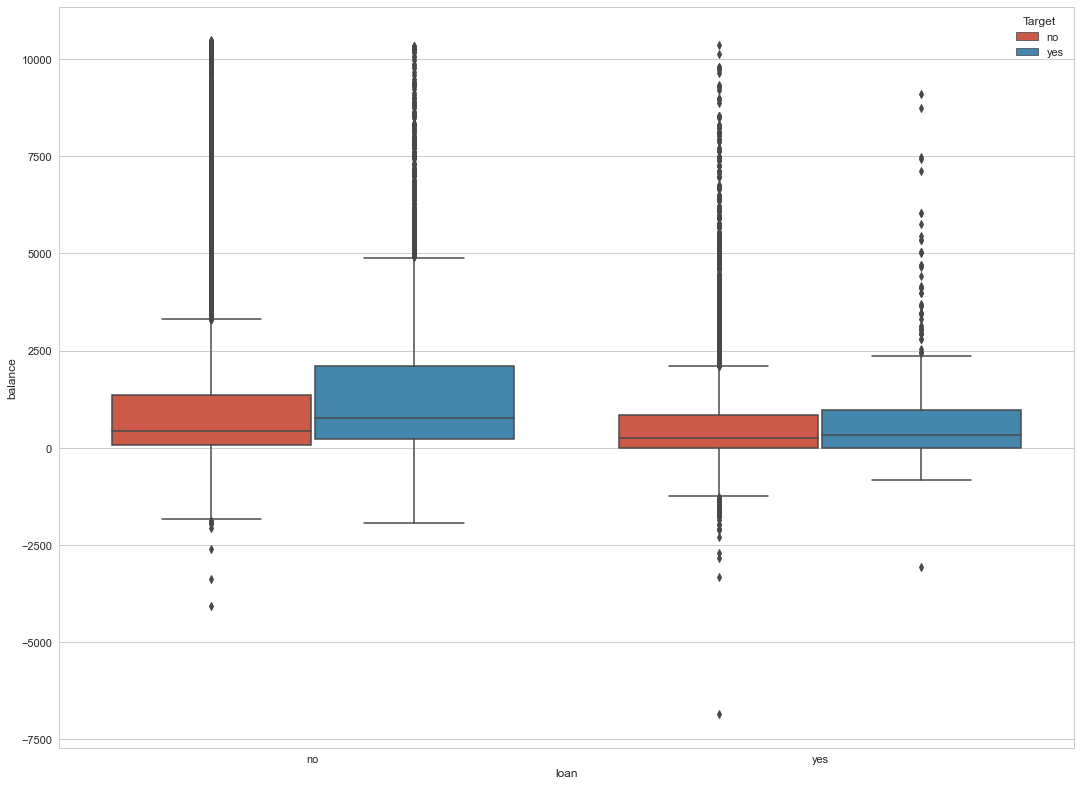

In [308]:

#imapct of personal loan status, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['loan'], newdf2['balance'], hue = "Target", data=newdf2)


### Insights: 
    
customers with no Personal loan seems to have higher bank balance and higer FD subscription rate

## Let's understand how the subscription rate get's affected by customer's housing loan status & bank balance

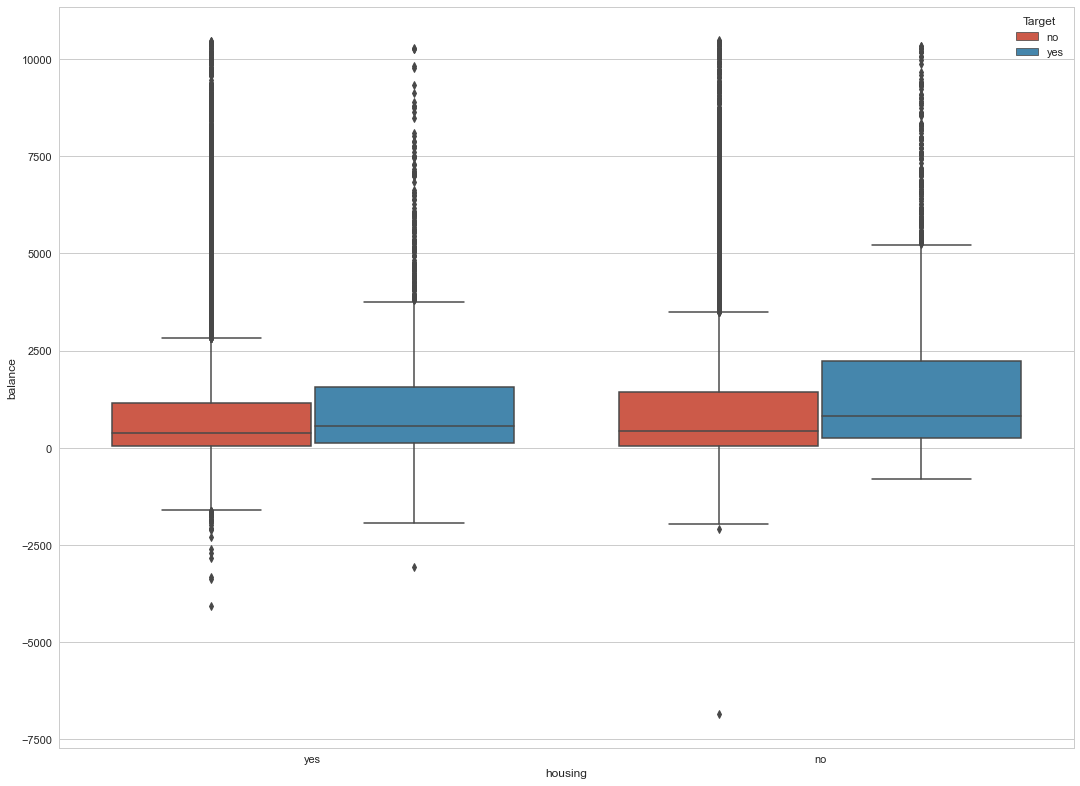

In [309]:
#imapct of housing loan status, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['housing'], newdf2['balance'], hue = "Target", data=newdf2)

### Insights: 

Customers with no housing loan seems to have higher bank balance and so are more likely to opt for FD.



## Let's understand how the subscription rate get's affected by age & bank balance

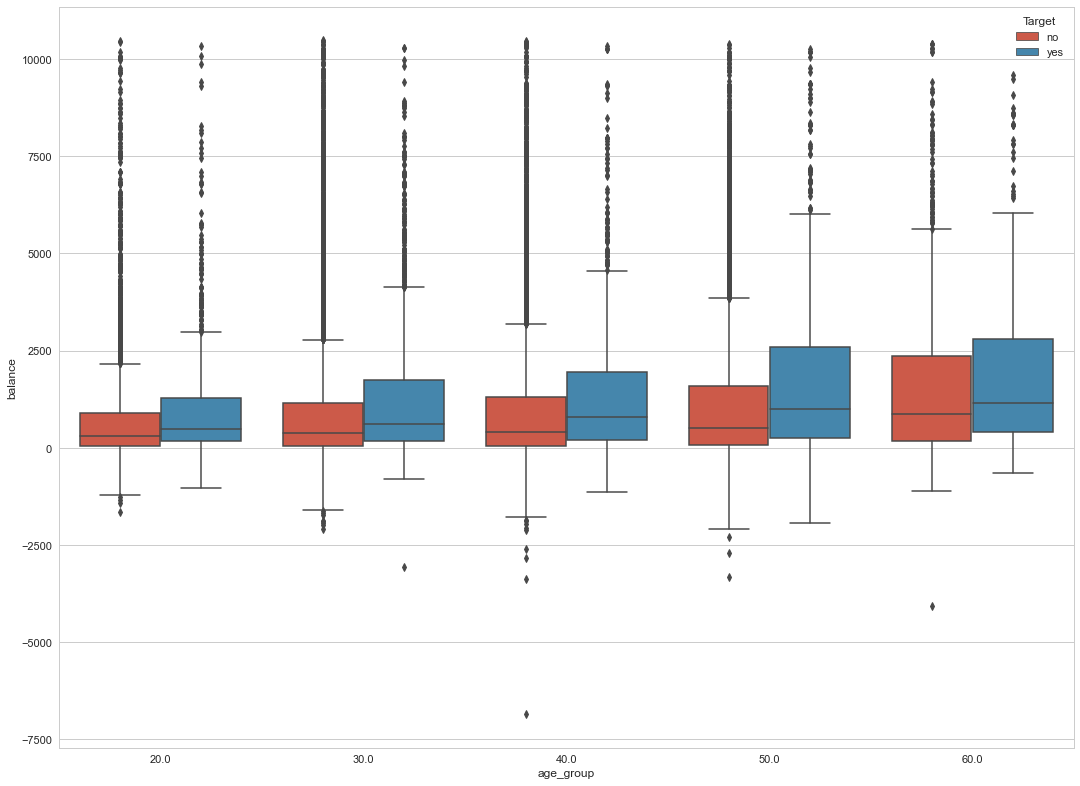

In [310]:
#imapct of contact type, bank balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['age_group'], newdf2['balance'], hue = "Target", data=newdf2)


## imapact of contact type, bank balance on fd suscription.

- Customers falling in the age gorup of 50-60 & 60-70 seems to have higher FD subscription rate, as they have higher bank balance also.

- It seems like as age increases customer are more oriented towards FD as their best saving & investment option.

## Let's understand how each numerical attributes are correlated to measure their value proposition in building our model going forward

In [311]:

#CORRELATION MATRIX FOR ALL THE NUMERICAL ATTRIBUTES: 

newdf2.corr()

# Let's Change 'month' from words to numbers for easier analysis
lst = [newdf2]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12
    
    


def convert(newdf2, new_column, old_column):
    newdf2[new_column] = newdf2[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return newdf2[new_column].value_counts()

age  balance   day  duration  campaign  pdays  previous  age_group
age        1.00     0.10 -0.01     -0.00      0.01  -0.02      0.00       0.95
balance    0.10     1.00  0.01      0.04     -0.02   0.01      0.03       0.10
day       -0.01     0.01  1.00     -0.03      0.16  -0.09     -0.05      -0.00
duration  -0.00     0.04 -0.03      1.00     -0.09  -0.00      0.00      -0.01
campaign   0.01    -0.02  0.16     -0.09      1.00  -0.09     -0.03       0.01
pdays     -0.02     0.01 -0.09     -0.00     -0.09   1.00      0.45      -0.03
previous   0.00     0.03 -0.05      0.00     -0.03   0.45      1.00      -0.00
age_group  0.95     0.10 -0.00     -0.01      0.01  -0.03     -0.00       1.00

Correlation Matrix
            age  balance   day  duration  campaign  pdays  month_int  previous
age        1.00     0.10 -0.01     -0.00      0.01  -0.02       0.09      0.00
balance    0.10     1.00  0.01      0.04     -0.02   0.01       0.10      0.03
day       -0.01     0.01  1.00     -0.03      0.16  -0.09       0.10     -0.05
duration  -0.00     0.04 -0.03      1.00     -0.09  -0.00      -0.01      0.00
campaign   0.01    -0.02  0.16     -0.09      1.00  -0.09       0.06     -0.03
pdays     -0.02     0.01 -0.09     -0.00     -0.09   1.00      -0.11      0.45
month_int  0.09     0.10  0.10     -0.01      0.06  -0.11       1.00     -0.04
previous   0.00     0.03 -0.05      0.00     -0.03   0.45      -0.04      1.00


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

Text(0.5, 1.0, 'Correlation Matrix')

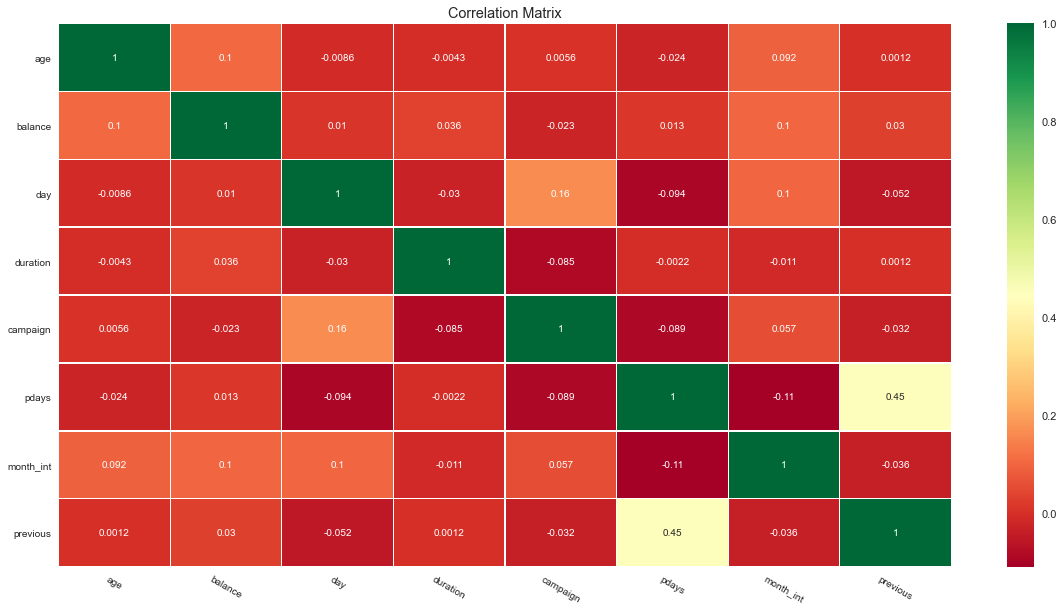

In [312]:
corr_data = newdf2[['age','balance','day','duration','campaign','pdays','month_int', 'previous','Target']]
corr = corr_data.corr()
print("Correlation Matrix")
print(corr)

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

### Quick Insights On Correlation Matrix:

-  Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. 
- We will further understand their influences on campaign outcome while building ML models.

In [313]:
#Pairplot Analysis For All Numercial Attributes:
    
#sns.pairplot(newdf2,diag_kind="kde")

# Cleaning Up Data & Preparing Data For Model Building

## Removing Any Missing Or Meaningless Values


In [314]:
#As we saw at the start of the project that there are no missing value as such

newdf2.describe()


age   balance       day  duration  campaign     pdays  previous  \
count 44,466.00 44,466.00 44,466.00 44,466.00 44,466.00 44,466.00 44,466.00   
mean      40.88  1,084.54     15.80      4.30      2.77     40.24      0.58   
std       10.60  1,721.07      8.33      4.29      3.10    100.27      2.31   
min       18.00 -6,847.00      1.00      0.00      1.00     -1.00      0.00   
25%       33.00     68.00      8.00      1.72      1.00     -1.00      0.00   
50%       39.00    431.00     16.00      3.00      2.00     -1.00      0.00   
75%       48.00  1,347.00     21.00      5.32      3.00     -1.00      0.00   
max       95.00 10,483.00     31.00     81.97     63.00    871.00    275.00   

       age_group  month_int  
count  44,466.00  44,466.00  
mean       36.26       6.13  
std        10.35       2.40  
min        20.00       1.00  
25%        30.00       5.00  
50%        30.00       6.00  
75%        40.00       8.00  
max        60.00      12.00

In [322]:
#Let's See below what are the attributes which has some meaningless data which are not adding any values for building better model
newdf2.head(45211)
newdf.info

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may      4.35         1     -1         0  unknown   
1        unknown    5   may      2.52         1     -1         0  unknown   
2        unknown    5   may      1.27         1     -1         0  unknown   
3        unknown    5   may      1.53         1     -1         0  unknown   
4        unknown    5   may      3.30         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45205   cellular   17   nov      6.43         2     -1         0  unknown   
45206   cellular   17   nov     16.28         3     -1         0  unknown   
45207   cellular   17   nov      7.60         2     -1         0  unknown   
45208   cellular   17   nov     18.78         5    184         3  success   
45209  telephone   17   nov      8.47         4     -1         0  unknown   

      Target  age_group    balance_group  month_int  
0         no      50.00  average balance       5.00  
1         no      40.00      low balance       5.00  
2         no      30.00      low balance       5.00  
3         no      40.00  average balance       5.00  
4         no      30.00      low balance       5.00  
...      ...        ...              ...        ...  
45205    yes      20.00      low balance      11.00  
45206    yes      50.00      low balance      11.00  
45207    yes      60.00  average balance      11.00  
45208    yes      60.00     high balance      11.00  
45209     no      50.00      low balance      11.00  

[42659 rows x 20 columns]

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

There are attributes having values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

 - poutcome has many unknown values which doesn't makes any sense, so we can remove it. 
 - Let's identify and treat them below   

In [323]:
# Step 1: Delete the rows in  column 'poutcome' where it contains 'other'
condition = newdf2.poutcome == 'other'
newdf2.drop(newdf2[condition].index, axis = 0, inplace = True)
newdf2.describe()
                      

age   balance       day  duration  campaign     pdays  previous  \
count 42,659.00 42,659.00 42,659.00 42,659.00 42,659.00 42,659.00 42,659.00   
mean      40.94  1,080.69     15.86      4.30      2.78     32.21      0.43   
std       10.58  1,719.95      8.33      4.30      3.14     90.85      1.56   
min       18.00 -6,847.00      1.00      0.00      1.00     -1.00      0.00   
25%       33.00     66.00      8.00      1.72      1.00     -1.00      0.00   
50%       39.00    425.00     16.00      3.00      2.00     -1.00      0.00   
75%       48.00  1,341.50     21.00      5.30      3.00     -1.00      0.00   
max       95.00 10,483.00     31.00     81.97     63.00    871.00     55.00   

       age_group  month_int  
count  42,659.00  42,659.00  
mean       36.32       6.16  
std        10.34       2.36  
min        20.00       1.00  
25%        30.00       5.00  
50%        30.00       6.00  
75%        40.00       8.00  
max        60.00      12.00

In [325]:
newdf2.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  d

### As we removed other variable from poutcome attribure we can see that now the total record count has changed to 42659 from original 45211

## Treating Education & Job Column

In [327]:
for col in newdf2.select_dtypes(include='object').columns:
    print(col)
    print(newdf2[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'success']
Target
['no' 'yes']
balance_group
['average balance' 'low balance' 'no balance' 'high balance']


As you can see by the ouput of our unique method there are some values like unknown in job & education column. So we can replace them with more meaningful value called others to make some sense.

Let's treat these attributes below:

In [329]:
newdf2[['job','education']] = newdf2[['job','education']].replace(['unknown'],'other')

#Let's See our dataframe & verify if it has been updated
print("\n\nAfter Treatment", newdf2['education'].count)



After Treatment <bound method Series.count of 0         tertiary
1        secondary
2        secondary
3            other
4            other
           ...    
45205    secondary
45206     tertiary
45207      primary
45208    secondary
45209    secondary
Name: education, Length: 42659, dtype: object>


### Let's get rid of contact Column As It has no significant role to play in predicting outcome.

In [331]:
newdf2['contact'].value_counts() 

cellular     27170
unknown      12822
telephone     2667
Name: contact, dtype: int64

### Insights:

  - As contact has almost 29 % data which has uknown value it has no significant role to play in predciting the model outcome. 
  - contact type seems to be not so important feature here so we can drop it form the dataframe

In [333]:
# Drop column "contact" which seems to be not so useful

new_df1 = newdf2.copy()
newdf2.drop('contact', axis=1, inplace = True)
new_df2 = newdf2.copy()

KeyError: "['contact'] not found in axis"

## Pre-Processing Data

In this section we will deal with

- Transforming the required attribute which are categorical to numerical so that our mdoel can process
- Data imbalance
- Steps to treat data imbalance
- Selcting most relevant features for model building

### Transforming All Categorical Column to Numercial Values using encoding

In [336]:
# Function to replace marital values with numercial
def marital_num(df):
    mar= [df]
    for data in mar: 
        data.loc[data['marital'] == "married", "marital_int"] = 1
        data.loc[data['marital'] == "single", "marital_int"] = 2
        data.loc[data['marital'] == "divorced", "marital_int"] = 3
        
#Job

#JOB: 
def job_num(df):
    jb= [df]
    for data in jb: 
        data.loc[data['job'] == "management", "Job_int"] = 1
        data.loc[data['job'] == "technician", "Job_int"] = 2
        data.loc[data['job'] == "entrepreneur", "Job_int"] = 3
        data.loc[data['job'] == "blue-collar", "Job_int"] = 4
        data.loc[data['job'] == "retired", "Job_int"] = 5
        data.loc[data['job'] == "admin.", "Job_int"] = 6
        data.loc[data['job'] == "services", "Job_int"] = 7
        data.loc[data['job'] == "self-employed", "Job_int"] = 8
        data.loc[data['job'] == "unemployed", "Job_int"] = 9
        data.loc[data['job'] == "student", "Job_int"] = 10
        data.loc[data['job'] == "housemaid", "Job_int"] = 11
        data.loc[data['job'] == "other", "Job_int"] = 12
        
#Education:

def edu_num(df):
    edu= [df]
    for data in edu: 
        data.loc[data['education'] == "primary", "education_int"] = 1
        data.loc[data['education'] == "secondary",  "education_int"] = 2
        data.loc[data['education'] == "tertiary", "education_int"] = 3
        data.loc[data['education'] == "unknown", "education_int"] = 4
    

#    
def pout_num(df):
    pout= [df]
    for data in pout: 
        data.loc[data['poutcome'] == "failure", "poutcome_int"] = 1
        data.loc[data['poutcome'] == "success",  "poutcome_int"] = 2
        data.loc[data['poutcome'] == "unknown", "poutcome_int"] = 3  


marital_num(new_df2)
job_num(new_df2)
edu_num(new_df2)
pout_num(new_df2)
    

convert(new_df2, "housing_binary", "housing")
convert(new_df2, "default_binary", "default")
convert(new_df2, "loan_binary", "loan")
convert(new_df2, "Fd Outcome", "Target")


new_df2.drop(['age','job', 'balance_group','housing','marital', 'default', 'loan', 'housing', 'education', 'month', 'poutcome', 'Target'], axis = 1, inplace = True) 
new_df2


KeyError: 'marital'

In [338]:
new_df2

balance  day  duration  campaign  pdays  previous  age_group  \
0         2143    5      4.35         1     -1         0      50.00   
1           29    5      2.52         1     -1         0      40.00   
2            2    5      1.27         1     -1         0      30.00   
3         1506    5      1.53         1     -1         0      40.00   
4            1    5      3.30         1     -1         0      30.00   
...        ...  ...       ...       ...    ...       ...        ...   
45205      505   17      6.43         2     -1         0      20.00   
45206      825   17     16.28         3     -1         0      50.00   
45207     1729   17      7.60         2     -1         0      60.00   
45208     5715   17     18.78         5    184         3      60.00   
45209      668   17      8.47         4     -1         0      50.00   

       month_int  marital_int  Job_int  education_int  poutcome_int  \
0           5.00         1.00     1.00           3.00          3.00   
1           5.00         2.00     2.00           2.00          3.00   
2           5.00         1.00     3.00           2.00          3.00   
3           5.00         1.00     4.00            nan          3.00   
4           5.00         2.00    12.00            nan          3.00   
...          ...          ...      ...            ...           ...   
45205      11.00         2.00     2.00           2.00          3.00   
45206      11.00         1.00     2.00           3.00          3.00   
45207      11.00         3.00     5.00           1.00          3.00   
45208      11.00         1.00     5.00           2.00          2.00   
45209      11.00         1.00     4.00           2.00          3.00   

       housing_binary  default_binary  loan_binary  Fd Outcome  
0                   1               0            0           0  
1                   1               0            0           0  
2                   1               0            1           0  
3                   1               0            0           0  
4                   0               0            0           0  
...               ...             ...          ...         ...  
45205               0               0            1           1  
45206               0               0            0           1  
45207               0               0            0           1  
45208               0               0            0           1  
45209               0               0            0           0  

[42659 rows x 16 columns]

### Data Imabalance:

In [340]:
new_df2['Fd Outcome'].value_counts()

0    37789
1     4870
Name: Fd Outcome, dtype: int64

In [351]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42659 entries, 0 to 45209
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   balance         42659 non-null  int64  
 1   day             42659 non-null  int64  
 2   duration        42659 non-null  float64
 3   campaign        42659 non-null  int64  
 4   pdays           42659 non-null  int64  
 5   previous        42659 non-null  int64  
 6   age_group       42659 non-null  float64
 7   month_int       42659 non-null  float64
 8   marital_int     42659 non-null  float64
 9   Job_int         42659 non-null  float64
 10  education_int   40901 non-null  float64
 11  poutcome_int    42659 non-null  float64
 12  housing_binary  42659 non-null  int64  
 13  default_binary  42659 non-null  int64  
 14  loan_binary     42659 non-null  int64  
 15  Fd Outcome      42659 non-null  int64  
dtypes: float64(7), int64(9)
memory usage: 6.8 MB


The target column is having high level of imbalance in terms of yes & no distribution with no leading with 88% and yes only with 12%. This kind of imbalance leads to ambiguity in model accuracy & predcition.We will take care of the data imbalances later on.

### Let's Do A Pairplot Analysis:

Before we move ahead to clean & pre-process our data. As all our attributes has been transformed to numercial values.

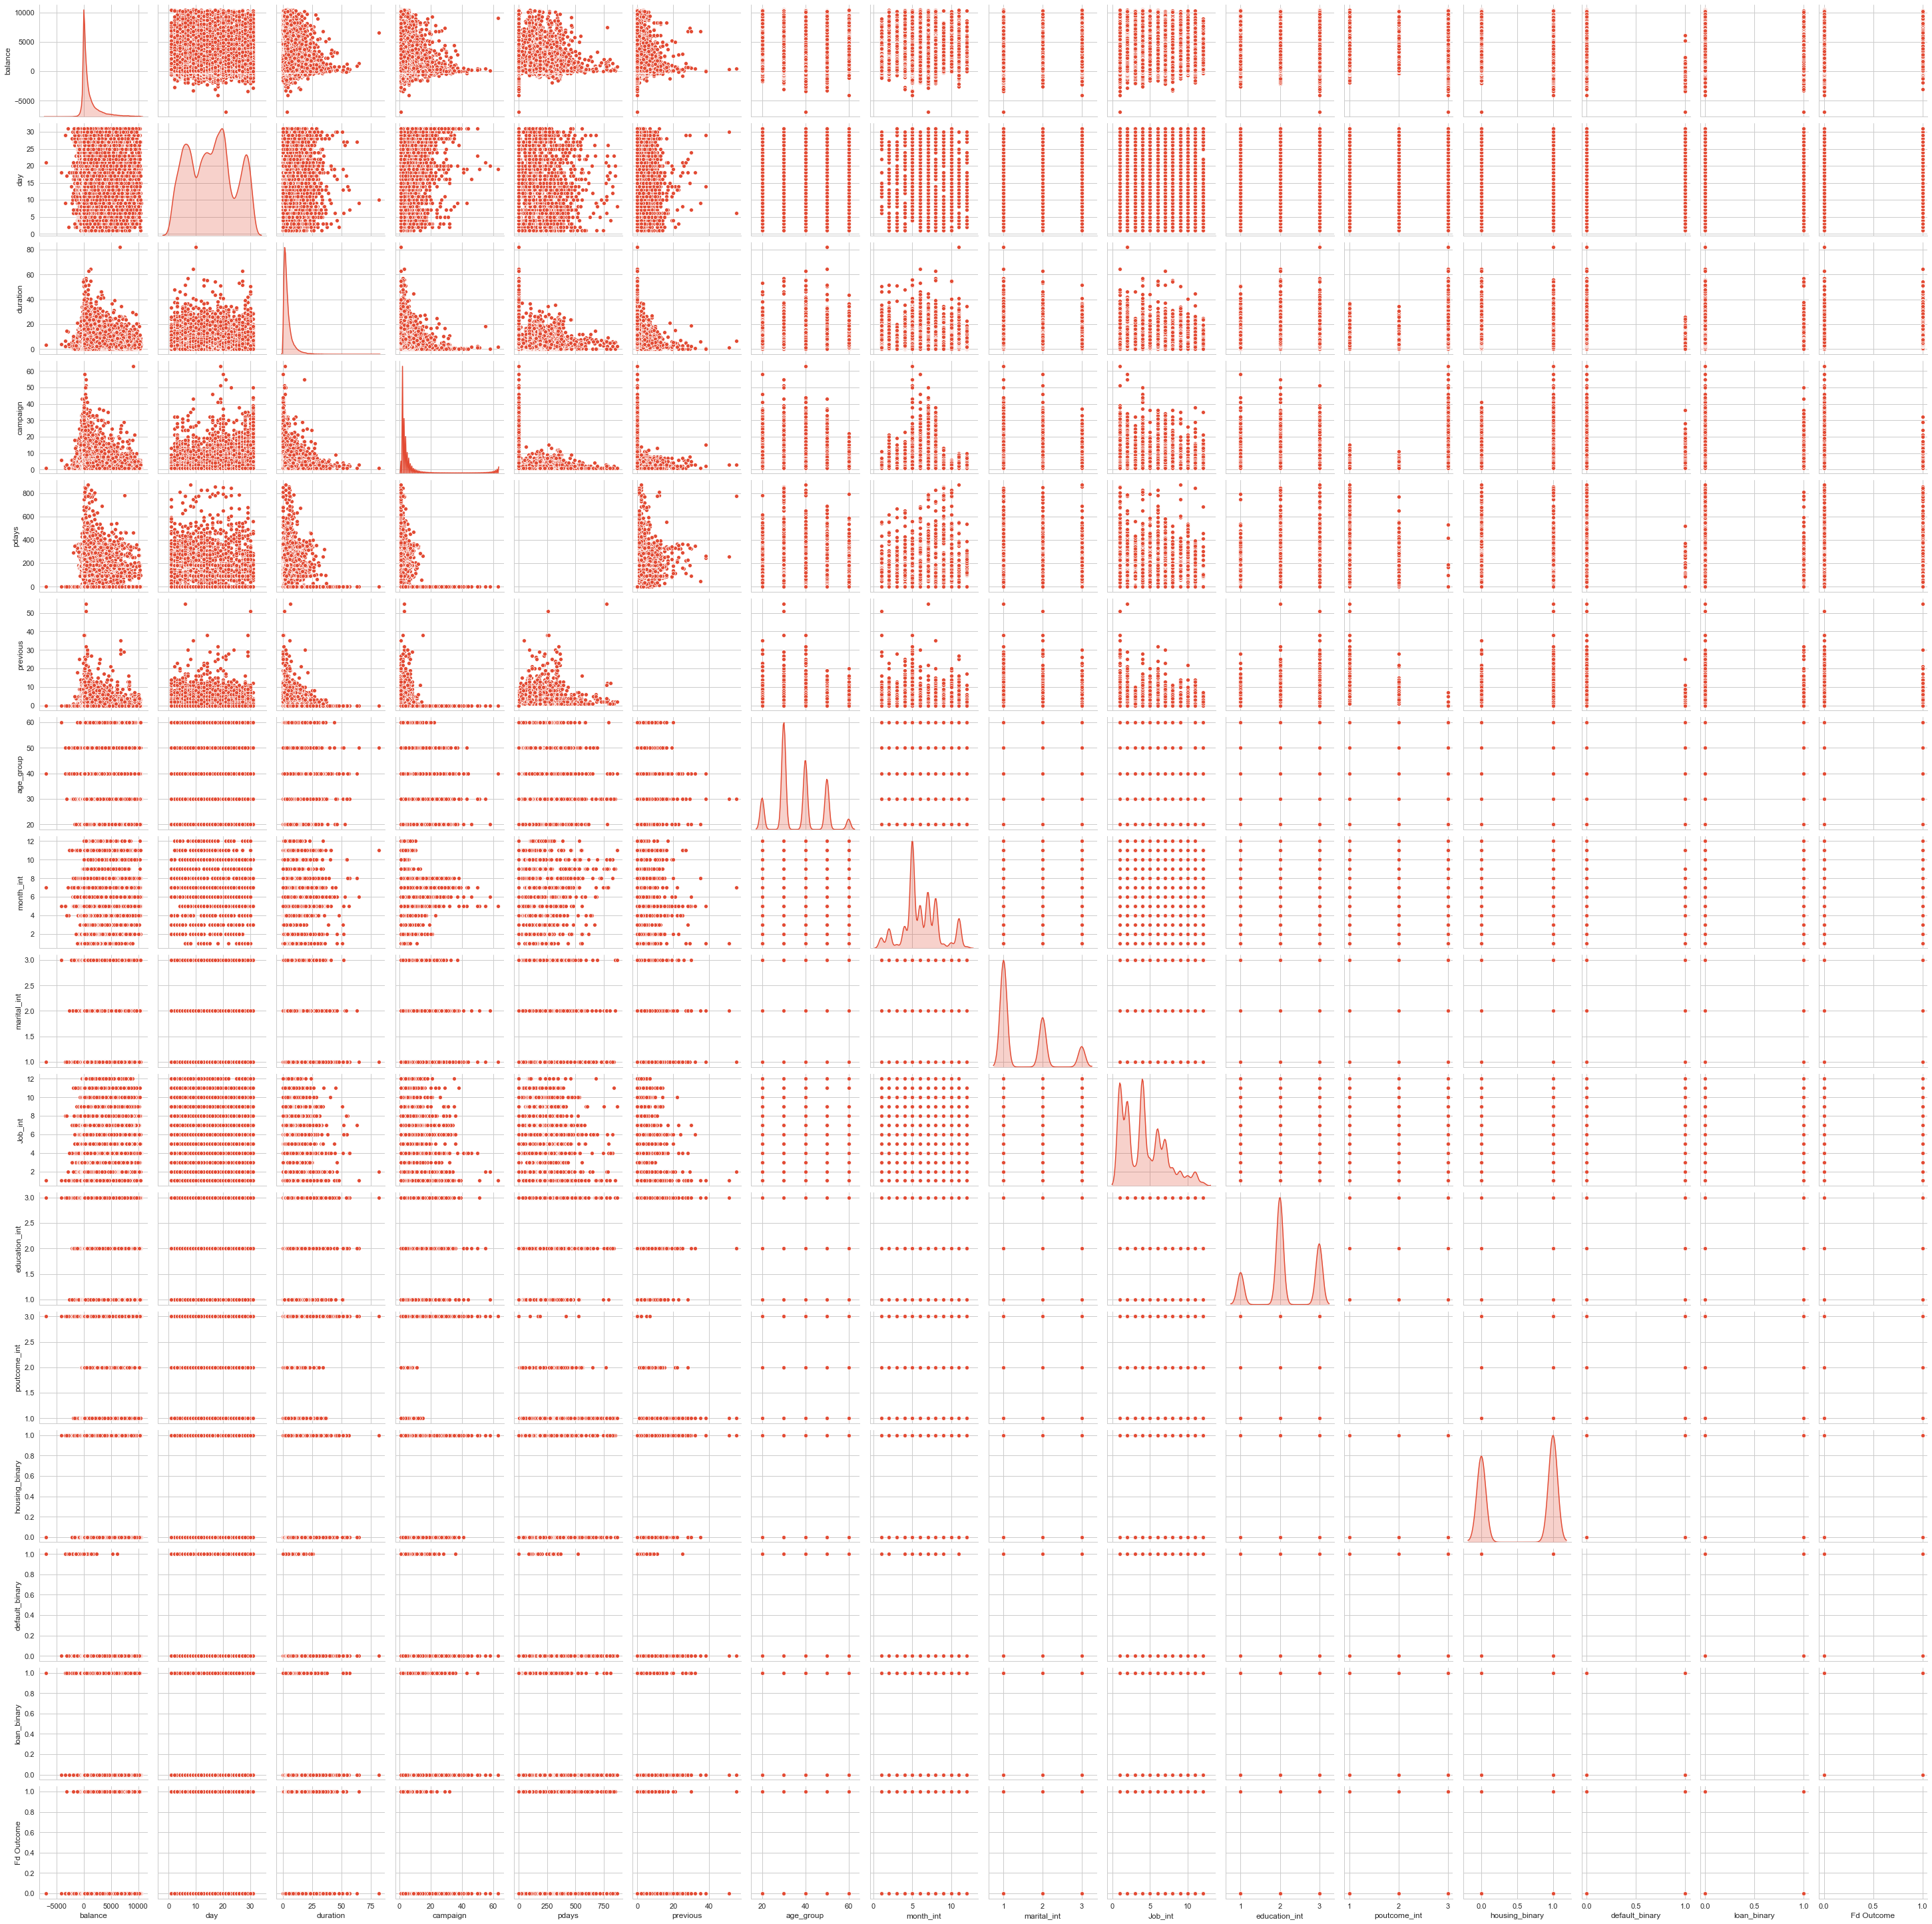

In [342]:
sns.pairplot(new_df2,diag_kind="kde")

### Split the data into training and test set in the ratio of 70:30 respectively

In [454]:
# Separate the independent attributes i.e. every column except personal loan
# Store the target column (Personal Loan) into Y array

x = new_df2.loc[:, new_df2.columns != 'Fd Outcome']  # independent variables

y = new_df2.loc[:, new_df2.columns == 'Fd Outcome']  # Target variable

### Use Logistic Regression model to predict the likelihood of a customer subscribing to Term Deposit

In [455]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be of any ratio...

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

# Random state seeding for reapeatability of the code
# if random state is not mentioned it would generate different train test sample in every run
# test_size is to select the size of test data

# two variables taken for split therefore output will generate 4 variables: test train for x and test train for y

In [456]:
x.head()
y.head()

balance  day  duration  campaign  pdays  previous  age_group  month_int  \
0     2143    5      4.35         1     -1         0      50.00       5.00   
1       29    5      2.52         1     -1         0      40.00       5.00   
2        2    5      1.27         1     -1         0      30.00       5.00   
3     1506    5      1.53         1     -1         0      40.00       5.00   
4        1    5      3.30         1     -1         0      30.00       5.00   

   marital_int  Job_int  education_int  poutcome_int  housing_binary  \
0         1.00     1.00           3.00          3.00               1   
1         2.00     2.00           2.00          3.00               1   
2         1.00     3.00           2.00          3.00               1   
3         1.00     4.00            nan          3.00               1   
4         2.00    12.00            nan          3.00               0   

   default_binary  loan_binary  
0               0            0  
1               0            0  
2               0            1  
3               0            0  
4               0            0

Fd Outcome
0           0
1           0
2           0
3           0
4           0

In [457]:
xtrain.head()

balance  day  duration  campaign  pdays  previous  age_group  \
40369      771   22      1.88         1    109         1      20.00   
22059     3250   20      2.70         3     -1         0      50.00   
2741      9004   14      2.63         3     -1         0      40.00   
32876      103   17      6.13         1    336         2      20.00   
12982       76    7      2.43         4     -1         0      30.00   

       month_int  marital_int  Job_int  education_int  poutcome_int  \
40369       6.00         2.00     9.00           2.00          1.00   
22059       8.00         1.00     1.00           3.00          3.00   
2741        5.00         1.00     4.00           1.00          3.00   
32876       4.00         1.00     1.00           3.00          1.00   
12982       7.00         1.00     4.00           1.00          3.00   

       housing_binary  default_binary  loan_binary  
40369               0               0            0  
22059               0               0            0  
2741                0               0            0  
32876               1               0            0  
12982               0               0            1

In [458]:
xtest.head()

balance  day  duration  campaign  pdays  previous  age_group  \
23507      170   28      0.20        24     -1         0      40.00   
19230     1495    6     14.97         2     -1         0      30.00   
24788     2496   18      1.57         1     -1         0      50.00   
34620     -258    5      4.32         1     -1         0      30.00   
22621      635   22      2.07         1     -1         0      30.00   

       month_int  marital_int  Job_int  education_int  poutcome_int  \
23507       8.00         1.00     2.00           2.00          3.00   
19230       8.00         2.00     8.00           3.00          3.00   
24788      11.00         1.00     3.00            nan          3.00   
34620       5.00         3.00     7.00           2.00          3.00   
22621       8.00         2.00     2.00           2.00          3.00   

       housing_binary  default_binary  loan_binary  
23507               0               0            0  
19230               0               0            0  
24788               0               0            1  
34620               1               0            0  
22621               0               0            0

In [459]:
ytrain.head()

Fd Outcome
40369           0
22059           0
2741            0
32876           0
12982           0

In [460]:
ytest.head()

Fd Outcome
23507           0
19230           0
24788           0
34620           0
22621           0

In [461]:
#xtest['education_int'] = xtest['education_int'].replace(np.nan, 4)
#xtrain['education_int'] = xtrain['education_int'].replace(np.nan, 4)

### Base Model

In [464]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(xtrain, ytrain) #training of model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [381]:
np.any(np.isnan(xtest))
np.any(np.isnan(xtrain))
np.any(np.isnan(ytest))
np.any(np.isnan(ytrain))

True

True

False

False

In [382]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12798 entries, 23507 to 13862
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   balance         12798 non-null  int64  
 1   day             12798 non-null  int64  
 2   duration        12798 non-null  float64
 3   campaign        12798 non-null  int64  
 4   pdays           12798 non-null  int64  
 5   previous        12798 non-null  int64  
 6   age_group       12798 non-null  float64
 7   month_int       12798 non-null  float64
 8   marital_int     12798 non-null  float64
 9   Job_int         12798 non-null  float64
 10  education_int   12272 non-null  float64
 11  poutcome_int    12798 non-null  float64
 12  housing_binary  12798 non-null  int64  
 13  default_binary  12798 non-null  int64  
 14  loan_binary     12798 non-null  int64  
dtypes: float64(7), int64(8)
memory usage: 1.6 MB


In [409]:
#xtest['pdays'].replace(-1, 0), inplace = true
#np.any(np.isnan(xtest))
xtest

#xtest['pdays'].replace(-1, value=0, inplace=True)

balance  day  duration  campaign  pdays  previous  age_group  \
23507      170   28      0.20        24      0         0      40.00   
19230     1495    6     14.97         2      0         0      30.00   
24788     2496   18      1.57         1      0         0      50.00   
34620     -258    5      4.32         1      0         0      30.00   
22621      635   22      2.07         1      0         0      30.00   
...        ...  ...       ...       ...    ...       ...        ...   
6083        51   27      2.02         2      0         0      50.00   
5342      2495   23     15.40         1      0         0      30.00   
8309       -18    2      1.38         6      0         0      40.00   
23587        0   28      0.35        22      0         0      40.00   
13862        0   10      7.02         1      0         0      30.00   

       month_int  marital_int  Job_int  education_int  poutcome_int  \
23507       8.00         1.00     2.00           2.00          3.00   
19230       8.00         2.00     8.00           3.00          3.00   
24788      11.00         1.00     3.00            nan          3.00   
34620       5.00         3.00     7.00           2.00          3.00   
22621       8.00         2.00     2.00           2.00          3.00   
...          ...          ...      ...            ...           ...   
6083        5.00         1.00     4.00           1.00          3.00   
5342        5.00         1.00     4.00           2.00          3.00   
8309        6.00         1.00     6.00           2.00          3.00   
23587       8.00         1.00     7.00            nan          3.00   
13862       7.00         1.00     4.00           1.00          3.00   

       housing_binary  default_binary  loan_binary  
23507               0               0            0  
19230               0               0            0  
24788               0               0            1  
34620               1               0            0  
22621               0               0            0  
...               ...             ...          ...  
6083                0               0            0  
5342                1               0            0  
8309                1               0            1  
23587               0               1            0  
13862               1               0            0  

[12798 rows x 15 columns]

In [416]:
#xtest.education_int = np.where(xtest.pdays = 'nan', 4,xtest.education_int)
xtest['education_int'] = xtest['education_int'].replace(np.nan, 4)
xtrain['education_int'] = xtrain['education_int'].replace(np.nan, 4)
xtest
xtrain
#replaced nan values in education_int as 4

balance  day  duration  campaign  pdays  previous  age_group  \
23507      170   28      0.20        24      0         0      40.00   
19230     1495    6     14.97         2      0         0      30.00   
24788     2496   18      1.57         1      0         0      50.00   
34620     -258    5      4.32         1      0         0      30.00   
22621      635   22      2.07         1      0         0      30.00   
...        ...  ...       ...       ...    ...       ...        ...   
6083        51   27      2.02         2      0         0      50.00   
5342      2495   23     15.40         1      0         0      30.00   
8309       -18    2      1.38         6      0         0      40.00   
23587        0   28      0.35        22      0         0      40.00   
13862        0   10      7.02         1      0         0      30.00   

       month_int  marital_int  Job_int  education_int  poutcome_int  \
23507       8.00         1.00     2.00           2.00          3.00   
19230       8.00         2.00     8.00           3.00          3.00   
24788      11.00         1.00     3.00           4.00          3.00   
34620       5.00         3.00     7.00           2.00          3.00   
22621       8.00         2.00     2.00           2.00          3.00   
...          ...          ...      ...            ...           ...   
6083        5.00         1.00     4.00           1.00          3.00   
5342        5.00         1.00     4.00           2.00          3.00   
8309        6.00         1.00     6.00           2.00          3.00   
23587       8.00         1.00     7.00           4.00          3.00   
13862       7.00         1.00     4.00           1.00          3.00   

       housing_binary  default_binary  loan_binary  
23507               0               0            0  
19230               0               0            0  
24788               0               0            1  
34620               1               0            0  
22621               0               0            0  
...               ...             ...          ...  
6083                0               0            0  
5342                1               0            0  
8309                1               0            1  
23587               0               1            0  
13862               1               0            0  

[12798 rows x 15 columns]

balance  day  duration  campaign  pdays  previous  age_group  \
40369      771   22      1.88         1    109         1      20.00   
22059     3250   20      2.70         3     -1         0      50.00   
2741      9004   14      2.63         3     -1         0      40.00   
32876      103   17      6.13         1    336         2      20.00   
12982       76    7      2.43         4     -1         0      30.00   
...        ...  ...       ...       ...    ...       ...        ...   
35556     3086    7      1.40         3    168         1      30.00   
14102      287   11      4.15         2     -1         0      20.00   
924       -205    7      6.47         1     -1         0      30.00   
40420      366    2      3.95         2     -1         0      40.00   
10880      544   17      1.62         1     -1         0      50.00   

       month_int  marital_int  Job_int  education_int  poutcome_int  \
40369       6.00         2.00     9.00           2.00          1.00   
22059       8.00         1.00     1.00           3.00          3.00   
2741        5.00         1.00     4.00           1.00          3.00   
32876       4.00         1.00     1.00           3.00          1.00   
12982       7.00         1.00     4.00           1.00          3.00   
...          ...          ...      ...            ...           ...   
35556       5.00         2.00     2.00           3.00          1.00   
14102       7.00         1.00     6.00           2.00          3.00   
924         5.00         1.00     4.00           2.00          3.00   
40420       7.00         1.00     7.00           2.00          3.00   
10880       6.00         1.00     4.00           2.00          3.00   

       housing_binary  default_binary  loan_binary  
40369               0               0            0  
22059               0               0            0  
2741                0               0            0  
32876               1               0            0  
12982               0               0            1  
...               ...             ...          ...  
35556               1               0            0  
14102               0               0            1  
924                 1               0            0  
40420               1               0            1  
10880               0               0            0  

[29861 rows x 15 columns]

In [418]:
xtest['education_int'].isnull().values.any()
xtest.isnull().values.any()
xtest.isnull().sum()

False

False

balance           0
day               0
duration          0
campaign          0
pdays             0
previous          0
age_group         0
month_int         0
marital_int       0
Job_int           0
education_int     0
poutcome_int      0
housing_binary    0
default_binary    0
loan_binary       0
dtype: int64

In [420]:
xtest['education_int']

23507   2.00
19230   3.00
24788   4.00
34620   2.00
22621   2.00
        ... 
6083    1.00
5342    2.00
8309    2.00
23587   4.00
13862   1.00
Name: education_int, Length: 12798, dtype: float64

In [467]:
y_predict = model.predict(xtest)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",model.score(xtrain,ytrain))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",model.score(xtest, ytest))   # this will give testing accuracy as testing data has been used

Trainig accuracy 0.8916647131710258

Testing accuracy 0.8907641819034224


In [433]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
## importing necessary metrics to evaluate model performance

In [468]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

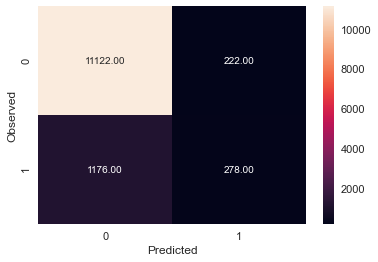

In [469]:
draw_cm(ytest,y_predict)

In [470]:
recall_score(ytest,y_predict)

0.19119669876203577

In [471]:
precision_score(ytest,y_predict)

0.556

In [472]:
f1_score(ytest,y_predict)

0.28454452405322417

In [473]:
roc_auc_score(ytest,y_predict)

0.5858134410594381

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb05cecac50>,
           classes=None,
           cmap=<matplotlib.colors.ListedColormap object at 0x7fb049cb6590>,
           encoder=None, force_model=False, is_fitted='auto', model=None,
           support=None)

0.8907641819034224

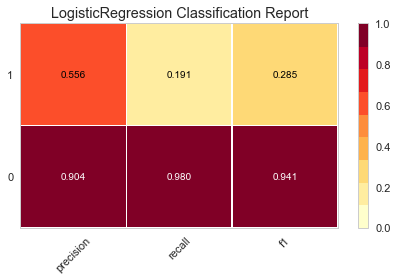

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb04ac10750>,
    classes=None, encoder=None, force_model=False, is_fitted='auto',
    macro=True, micro=True, model=None, per_class=True)

0.8630649331907807

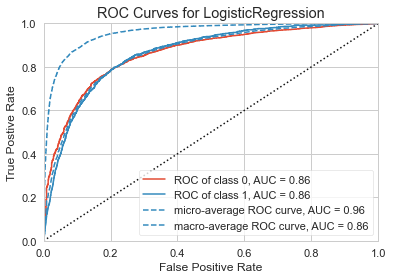

In [474]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(model)
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

In [476]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [477]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changing values of solver
    model.fit(xtrain, ytrain) 
    y_predict = model.predict(xtest)     
    train_score.append(round(model.score(xtrain,ytrain),3))
    test_score.append(round(model.score(xtest, ytest),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.893, 0.891, 0.893, 0.885, 0.885]

[0.892, 0.889, 0.892, 0.886, 0.886]


In [478]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']  # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l1', solver=i)  # changed value of penaly to 'l1'
    model.fit(xtrain, ytrain) 
    y_predict = model.predict(xtest)     
    train_score.append(round(model.score(xtrain,ytrain),3))
    test_score.append(round(model.score(xtest, ytest),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=7, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

['liblinear', 'saga']

[0.893, 0.886]

[0.892, 0.886]


In [479]:
## Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'lbfgs'
# choose any one
model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(xtrain, ytrain) 

y_predict = model.predict(xtest)     

print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))   

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=7,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Trainig accuracy 0.8076420749472556

Testing accuracy 0.8063759962494139


In [481]:
## Accuracy decreased so removing class weight from the model
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear', C=i)  # changing values of C
    model.fit(xtrain, ytrain) 
    y_predict = model.predict(xtest)     
    train_score.append(round(model.score(xtrain,ytrain),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(xtest, ytest),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.892, 0.893, 0.893, 0.893, 0.893, 0.893]

[0.891, 0.892, 0.892, 0.892, 0.892, 0.892]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Trainig accuracy 0.8929037875489769

Testing accuracy 0.8924050632911392

Confusion Matrix


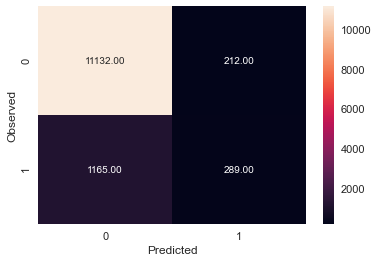

None

Recall: 0.19876203576341128

Precision: 0.5768463073852296

F1 Score: 0.29565217391304344

Roc Auc Score: 0.590036871196233


In [483]:
#Therefore final model is
model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear') 
model.fit(xtrain, ytrain)
y_predict = model.predict(xtest)
y_prob = model.predict_proba(xtest)

print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))
print()
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))
print()
print("Recall:",recall_score(ytest,y_predict))
print()
print("Precision:",precision_score(ytest,y_predict))
print()
print("F1 Score:",f1_score(ytest,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(ytest,y_predict))

In [487]:
xtrain.shape
xtest.shape
ytrain.shape
ytest.shape

(29861, 15)

(12798, 15)

(29861, 1)

(12798, 1)

## Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [493]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [494]:
model_entropy.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Print the accuracy of the model & print the confusion matrix

In [496]:
print("Train: %.2f" % model_entropy.score(xtrain, ytrain))  # performance on train data
print("Test: %.2f" % model_entropy.score(xtest, ytest))  # performance on test data

Train: 1.00
Test: 0.87


There is a high degree of overfitting in the model due to which the test accuracy dropped by 13%. This shows why decision trees are prone to overfitting.

### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [499]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [501]:
print("Train: %.2f" % clf_pruned.score(xtrain, ytrain))  # performance on train data
print("Test: %.2f" % clf_pruned.score(xtest, ytest))  # performance on test data

Train: 0.91
Test: 0.90


## Visualizing the tree¶

In [528]:
features = [col for col in new_df2.columns if col != 'Fd Outcome']

X_train, X_test, y_train, y_test = train_test_split(new_df2[features], new_df2['Fd Outcome'], test_size=.3, random_state=22)
                                                                            
X_train.shape, X_test.shape

((29861, 15), (12798, 15))

In [540]:
X_test['education_int'] = X_test['education_int'].replace(np.nan, 4)
X_train['education_int'] = X_train['education_int'].replace(np.nan, 4)

In [534]:
model_entropy.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

True

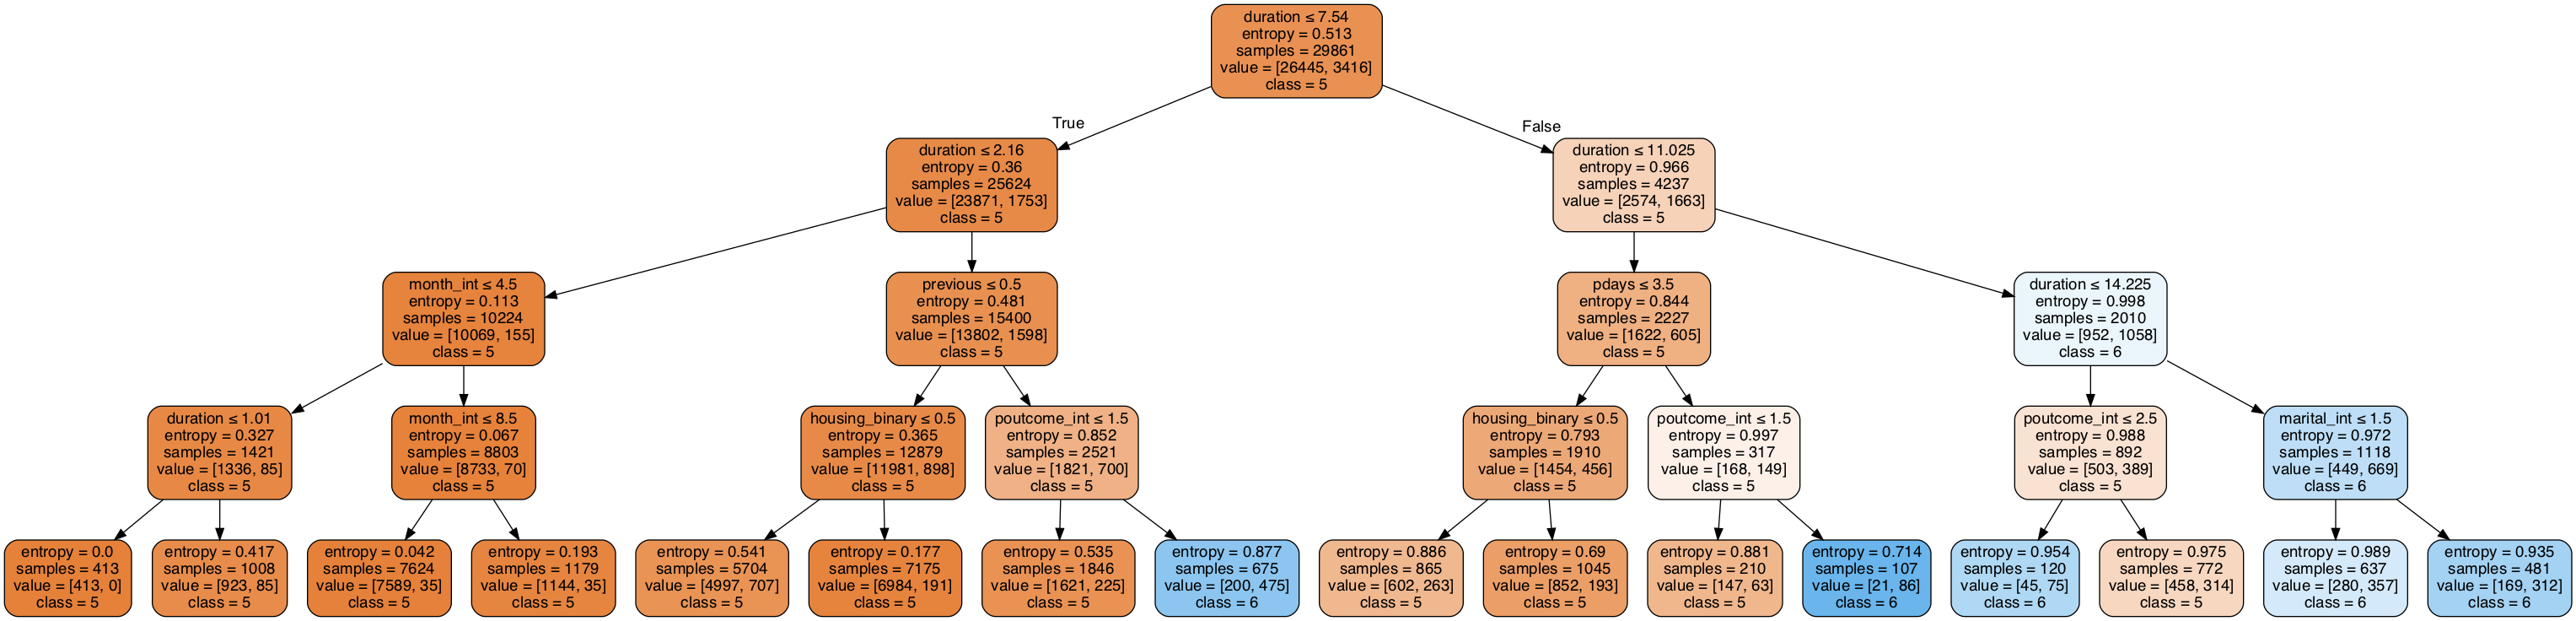

In [535]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['5','6','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_pruned.png')
Image(graph.create_png())

In [541]:
X_test
X_train

balance  day  duration  campaign  pdays  previous  age_group  \
18880      355    4      5.67         1     -1         0      30.00   
39687        0   27      2.05         2     -1         0      30.00   
24841        6   18      0.78         1     -1         0      30.00   
35133      122    7      3.65         2     -1         0      30.00   
22801     1190   25      1.15         4     -1         0      40.00   
...        ...  ...       ...       ...    ...       ...        ...   
2898       887   14      3.52         1     -1         0      40.00   
16359      246   23     11.95         8     -1         0      30.00   
4141      -206   19      1.42         4     -1         0      30.00   
9675         0    6      3.92         3     -1         0      50.00   
3843        36   16      5.58         1     -1         0      50.00   

       month_int  marital_int  Job_int  education_int  poutcome_int  \
18880       8.00         1.00     1.00           3.00          3.00   
39687       5.00         2.00     9.00           4.00          3.00   
24841      11.00         1.00     2.00           4.00          3.00   
35133       5.00         2.00     6.00           4.00          3.00   
22801       8.00         1.00     2.00           2.00          3.00   
...          ...          ...      ...            ...           ...   
2898        5.00         1.00     4.00           1.00          3.00   
16359       7.00         1.00     1.00           3.00          3.00   
4141        5.00         2.00     2.00           4.00          3.00   
9675        6.00         1.00    11.00           1.00          3.00   
3843        5.00         2.00     2.00           4.00          3.00   

       housing_binary  default_binary  loan_binary  
18880               0               0            0  
39687               0               0            0  
24841               1               0            0  
35133               1               0            0  
22801               0               0            0  
...               ...             ...          ...  
2898                1               0            0  
16359               1               0            0  
4141                1               0            0  
9675                0               0            0  
3843                1               0            0  

[12798 rows x 15 columns]

balance  day  duration  campaign  pdays  previous  age_group  \
3427      1534   15      4.05         1     -1         0      30.00   
15356     3142   18      2.73         1     -1         0      30.00   
25005     1260   18      2.87         1     -1         0      50.00   
677       -131    6      7.78         2     -1         0      30.00   
21162      588   14      1.08         4     -1         0      30.00   
...        ...  ...       ...       ...    ...       ...        ...   
21228      984   18      3.00         4     -1         0      30.00   
23317      198   27      4.70        13     -1         0      30.00   
25317     6188   18      2.45         1     -1         0      30.00   
32821      593   17      3.03         2     -1         0      30.00   
30412     3358    5      8.37         2     -1         0      30.00   

       month_int  marital_int  Job_int  education_int  poutcome_int  \
3427        5.00         1.00     2.00           2.00          3.00   
15356       7.00         2.00     1.00           3.00          3.00   
25005      11.00         1.00     7.00           1.00          3.00   
677         5.00         1.00     2.00           2.00          3.00   
21162       8.00         1.00     2.00           4.00          3.00   
...          ...          ...      ...            ...           ...   
21228       8.00         1.00     1.00           3.00          3.00   
23317       8.00         1.00     2.00           2.00          3.00   
25317      11.00         2.00     6.00           2.00          3.00   
32821       4.00         3.00     4.00           2.00          3.00   
30412       2.00         2.00     7.00           2.00          3.00   

       housing_binary  default_binary  loan_binary  
3427                1               0            1  
15356               1               0            0  
25005               0               0            0  
677                 1               0            0  
21162               1               0            0  
...               ...             ...          ...  
21228               1               0            0  
23317               0               0            0  
25317               1               0            1  
32821               1               0            0  
30412               1               0            0  

[29861 rows x 15 columns]

In [542]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

## Decision tree performance

In [543]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted      0    1
Actual               
0          11030  282
1            920  566

###  Visualize model performance with yellowbrick library


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb060c1bd10>,
           classes=None,
           cmap=<matplotlib.colors.ListedColormap object at 0x7fb060d07c10>,
           encoder=None, force_model=False, is_fitted='auto', model=None,
           support=None)

0.9046726050945461

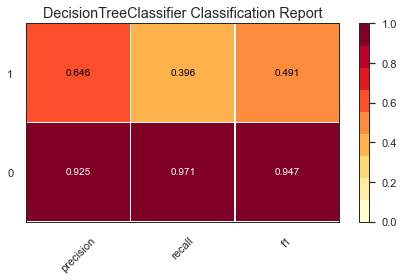

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb060b81250>,
    classes=None, encoder=None, force_model=False, is_fitted='auto',
    macro=True, micro=True, model=None, per_class=True)

0.8649731891810599

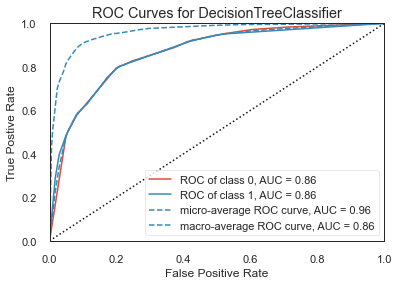

In [544]:
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Performance metrics
- Precision: Fraction of actuals per label that were correctly classified by the model
- Recall: Fraction of predictions that were correctly classified by the model
- F1-score: Weighted harmonic mean of the precision and recall. F1-score: 2 * (precision * recall) / (precision + recall)
- Support: Number of occurrences of each class in y_test
- Accuracy: Fraction of all observations that were correctly classified by the model
- Macro avg: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
- Micro/weighted avg: Calculate metrics globally by counting the total true positives, false negatives and false positives
- AUC Score: Given a random observation from the dataset that belongs to a class, and a random observation that doesn't belong to a class, the AUC is the perecentage of time that our model will classify which is which correctly

### When the tree is regularised, overfitting is reduced, but there is no increase in accuracy

In [546]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
duration       0.63
poutcome_int   0.14
previous       0.12
housing_binary 0.08
month_int      0.03
pdays          0.01
marital_int    0.00
balance        0.00
day            0.00
campaign       0.00
age_group      0.00
Job_int        0.00
education_int  0.00
default_binary 0.00
loan_binary    0.00

### From the feature importance dataframe we can infer that  duration,poutcome_int,previous,housing_binary impact the subscriptions of the term deposit

In [547]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree      0.91

## Apply the Random forest model and print the accuracy of Random forest Model

In [549]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [551]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [556]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree      0.91
0  Random Forest      0.90
0  Random Forest      0.90
0  Random Forest      0.90

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0611cb2d0>,
           classes=None,
           cmap=<matplotlib.colors.ListedColormap object at 0x7fb0654646d0>,
           encoder=None, force_model=False, is_fitted='auto', model=None,
           support=None)

0.9034224097515237

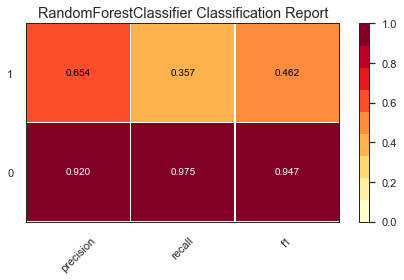

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0654523d0>,
    classes=None, encoder=None, force_model=False, is_fitted='auto',
    macro=True, micro=True, model=None, per_class=True)

0.917349558871961

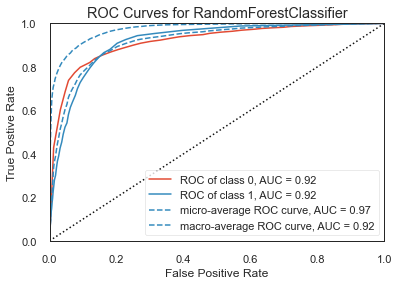

In [555]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Compared to the Random Forest , we can see that the accuracy has significantly decreased  than decision tree

## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [558]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [560]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [561]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree      0.91
0  Random Forest      0.90
0  Random Forest      0.90
0  Random Forest      0.90
0       Adaboost      0.89

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0638f1fd0>,
           classes=None,
           cmap=<matplotlib.colors.ListedColormap object at 0x7fb065aa71d0>,
           encoder=None, force_model=False, is_fitted='auto', model=None,
           support=None)

0.8916236912017502

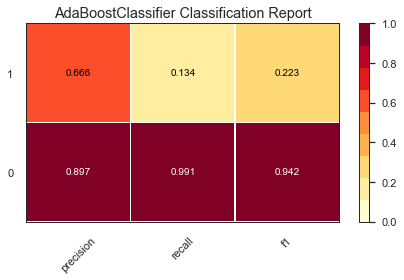

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0631f6190>,
    classes=None, encoder=None, force_model=False, is_fitted='auto',
    macro=True, micro=True, model=None, per_class=True)

0.8831591110935

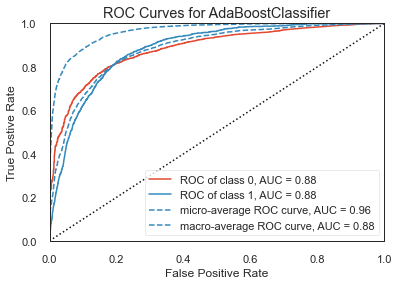

In [562]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Apply Bagging Classifier Algorithm and print the accuracy.

In [564]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [566]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [568]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree      0.91
0  Random Forest      0.90
0  Random Forest      0.90
0  Random Forest      0.90
0       Adaboost      0.89
0        Bagging      0.90
0        Bagging      0.90

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0658a3510>,
           classes=None,
           cmap=<matplotlib.colors.ListedColormap object at 0x7fb061230c10>,
           encoder=None, force_model=False, is_fitted='auto', model=None,
           support=None)

0.9041256446319738

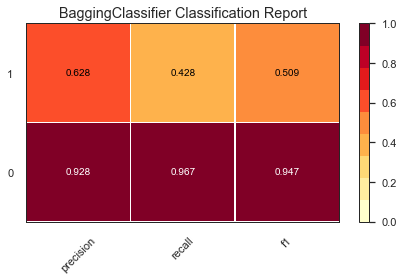

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0637031d0>,
    classes=None, encoder=None, force_model=False, is_fitted='auto',
    macro=True, micro=True, model=None, per_class=True)

0.9146687595540463

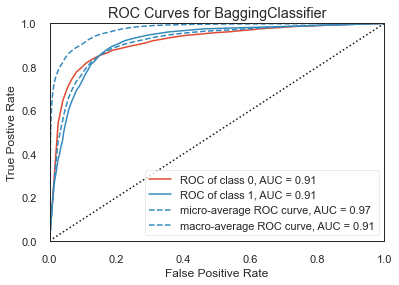

In [569]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [571]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [573]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [575]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0   Decision Tree      0.91
0   Random Forest      0.90
0   Random Forest      0.90
0   Random Forest      0.90
0        Adaboost      0.89
0         Bagging      0.90
0         Bagging      0.90
0  Gradient Boost      0.90
0  Gradient Boost      0.90

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb063b7d8d0>,
           classes=None,
           cmap=<matplotlib.colors.ListedColormap object at 0x7fb063a46b10>,
           encoder=None, force_model=False, is_fitted='auto', model=None,
           support=None)

0.9048288795124239

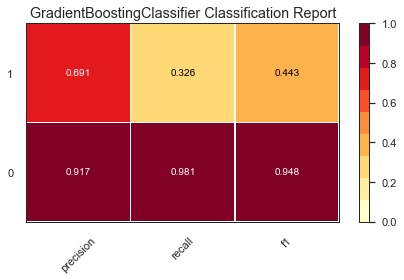

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb063a55310>,
    classes=None, encoder=None, force_model=False, is_fitted='auto',
    macro=True, micro=True, model=None, per_class=True)

0.9117619808807254

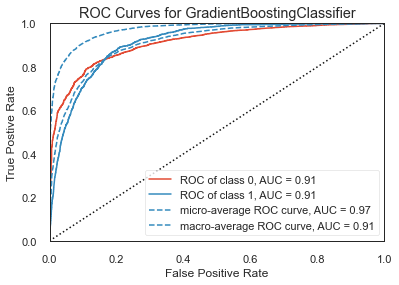

In [577]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### For this data set Random Forest gives the best results on test predictions

In [579]:
# Creating a function for visualizing classifier results
def visClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

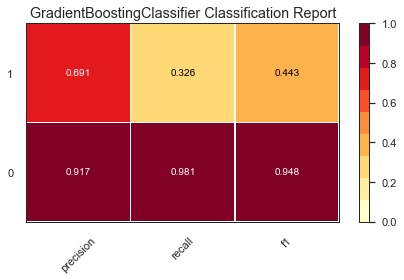

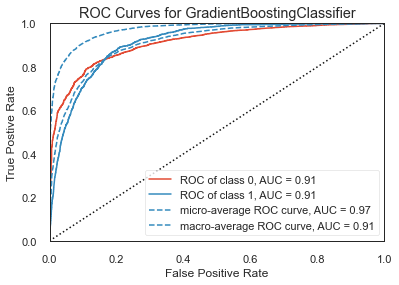

In [581]:
visClassifierResults(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

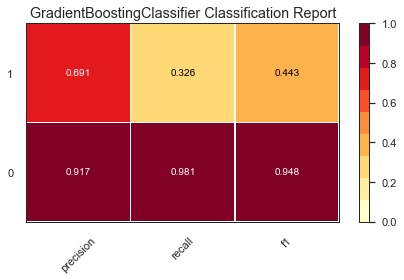

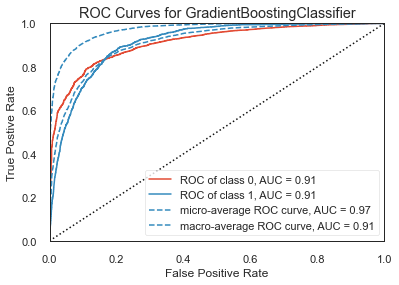

In [582]:
visClassifierResults(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))